## ***``Indian Liver Patients :: Data Analysis and Classification``***
![Liver_img1](Knowledge_Doc/Liver_Img.PNG)

#### **``Flow Diagram``**
![Flow_Diag](Knowledge_Doc/Flow_Diagram.PNG)

##### **If you want to attain more knowledge around the features of this dataset then refer to below document:**
[Features_Detailing_Doc](https://github.com/Rajesh-ML-Engg/Liver_Disease_Data_Analysis/blob/master/Detailing%20around%20Liver%20%26%20its%20components.docx)

In [1]:
## Import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

%matplotlib inline

import category_encoders as ce

from sklearn import preprocessing as prep
from sklearn.utils import resample

from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score

from yellowbrick import ROCAUC

## Ignoring the warnings by messages
import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")
warnings.filterwarnings("ignore", message='FutureWarning')

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
patients_df = pd.read_csv("Dataset/indian_liver_patient.csv")
patients_df.head(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   
5   46    Male              1.8               0.7                   208   
6   26  Female              0.9               0.2                   154   
7   29  Female              0.9               0.3                   202   
8   17    Male              0.9               0.3                   202   
9   55    Male              0.7               0.2                   290   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   
5                        19                          14             7.6   
6                        16                          12             7.0   
7                        14                          11             6.7   
8                        22                          19             7.4   
9                        53                          58             6.8   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1  
5      4.4                        1.30        1  
6      3.5                        1.00        1  
7      3.6                        1.10        1  
8      4.1                        1.20        2  
9      3.4                        1.00        1

#### **``Data Shape``**

In [3]:
patients_df.shape

(583, 11)

#### **``Variables Datatypes``**

In [4]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### **``Check for Null/NaN or Missing values``**

In [5]:
label_font_dict = {'family':'calibri','size':18,'color':'coral','style':'italic'}
title_font_dict = {'family':'calibri','size':20,'color':'Blue','style':'italic'}

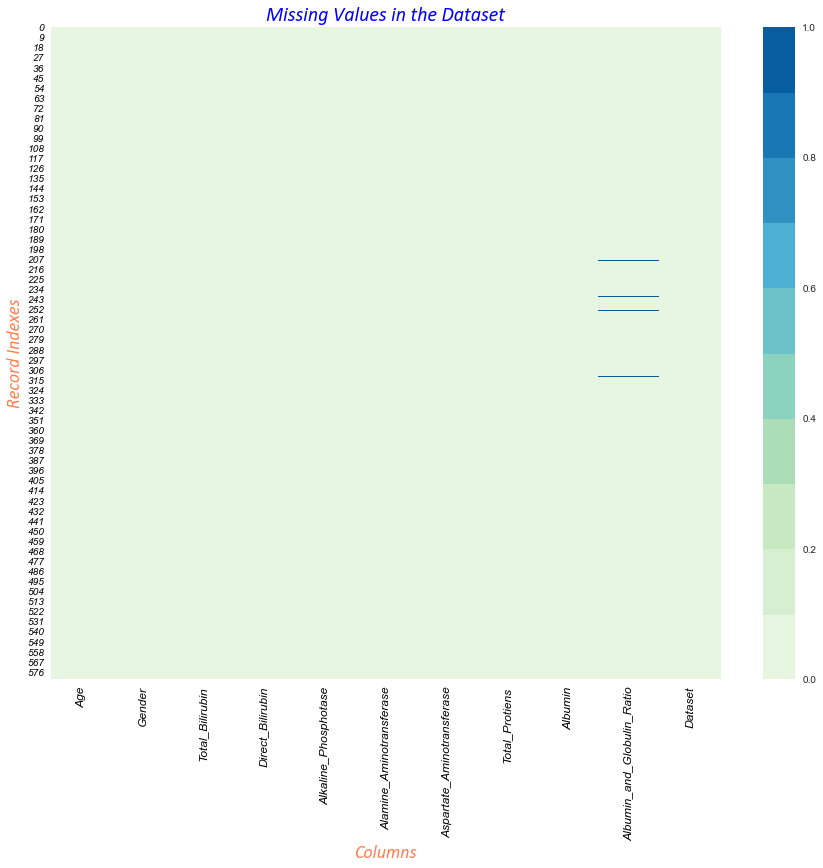

In [6]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))
    sns.heatmap(data=pd.DataFrame(patients_df.isnull()),cmap=ListedColormap(sns.color_palette('GnBu',10)))
    plt.xlabel('Columns',fontdict=label_font_dict)
    plt.ylabel('Record Indexes',fontdict=label_font_dict)
    plt.title('Missing Values in the Dataset',fontdict=title_font_dict)
    plt.xticks(color='black',size=12,style='oblique')
    plt.yticks(color='black',size=10,style='oblique')
plt.show()

##### **This shows us that there are 4 missing records in the dataset in column "Albumin_and_Globulin_Ratio".**

#### **``PLOT - 1``**
##### **``"Age and Gender Wise Patients Count"``**

In [7]:
patients_as_per_age_gender = pd.DataFrame(patients_df.groupby(by=['Age','Gender']).count()['Total_Bilirubin']).reset_index()
patients_as_per_age_gender.columns = ['Age','Gender','Record_Count']
patients_as_per_age_gender.head()

Age  Gender  Record_Count
0    4    Male             2
1    6    Male             1
2    7  Female             1
3    7    Male             1
4    8  Female             1

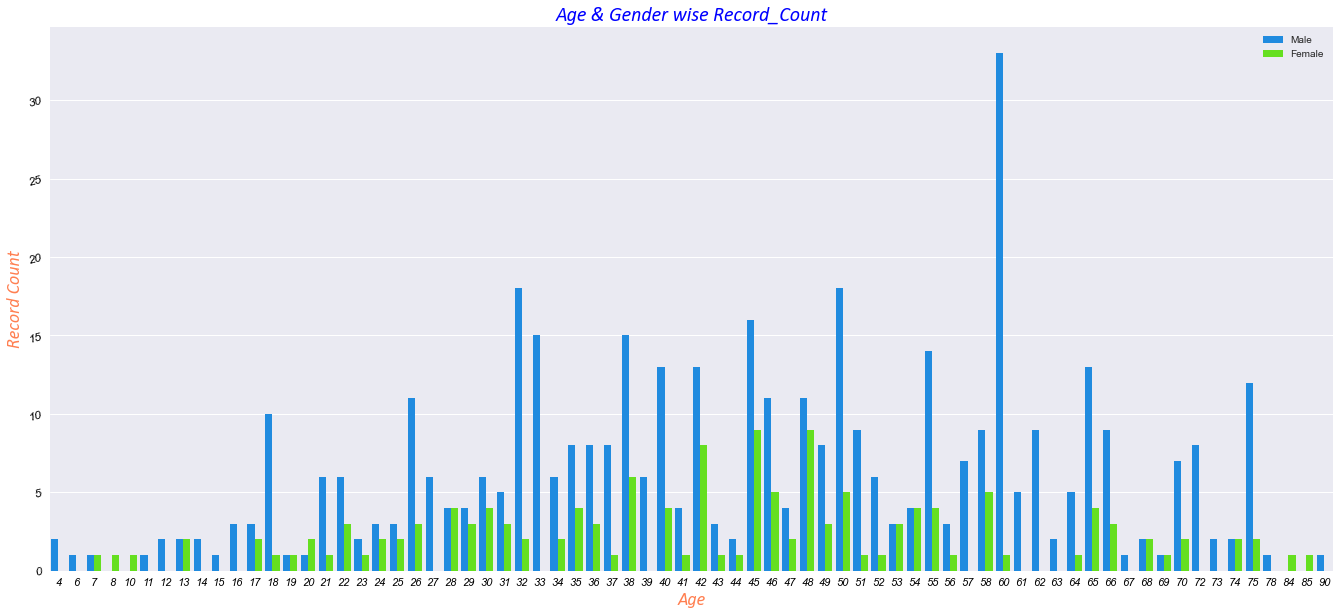

In [8]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(23,10))
    sns.barplot(x='Age',y='Record_Count',hue='Gender',data=patients_as_per_age_gender,palette=sns.color_palette('gist_rainbow_r',2))
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Record Count',fontdict=label_font_dict)
    plt.title('Age & Gender wise Record_Count',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=15,color='black',size=12,style='oblique')
    plt.legend(loc='upper right')

##### **This clearly shows us the difference in the number of female and male patients across Ages.**

#### **``PLOT - 2``**
##### **``"Positive and Negative Patients Count"``**

In [9]:
patients_df['Dataset'].unique()

array([1, 2], dtype=int64)

In [10]:
pos_neg_count = patients_df['Dataset'].value_counts().reset_index()
pos_neg_count.columns = ['Class','Patients_Count']
pos_neg_count

Class  Patients_Count
0      1             416
1      2             167

In [11]:
patients_df['Label'] = patients_df['Dataset'].apply(lambda val: val if val == 1 else 0)
patients_df.drop(['Dataset'],axis=1,inplace=True)
pos_neg_count = patients_df['Label'].value_counts().reset_index()
pos_neg_count.columns = ['Class','Patients_Count']
pos_neg_count

Class  Patients_Count
0      1             416
1      0             167

In [12]:
patients_df['Label'].unique()

array([1, 0], dtype=int64)

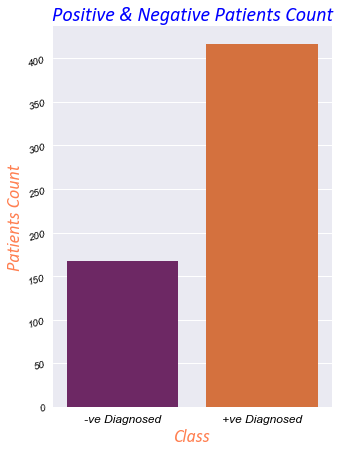

In [13]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(5,7))
    sns.barplot(x='Class',y='Patients_Count',data=pos_neg_count,palette='inferno')
    plt.xlabel('Class',fontdict=label_font_dict)
    plt.ylabel('Patients Count',fontdict=label_font_dict)
    plt.title('Positive & Negative Patients Count',fontdict=title_font_dict)
    plt.xticks(ticks=[0,1],labels=['-ve Diagnosed','+ve Diagnosed'],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
plt.show()

##### **This shows us that there is a class imbalance in this dataset. And, -ve patients are less than the 50% of the +ve ones.** 

#### **``PLOT - 3``**
##### **``"Positive and Negative Patients Count for both GENDER"``**

In [14]:
pos_neg_patients_as_per_gender = patients_df.groupby(['Gender','Label']).count()['Age'].reset_index()
pos_neg_patients_as_per_gender.columns = ['Gender','Label','Patients_Count']
pos_neg_patients_as_per_gender

Gender  Label  Patients_Count
0  Female      0              50
1  Female      1              92
2    Male      0             117
3    Male      1             324

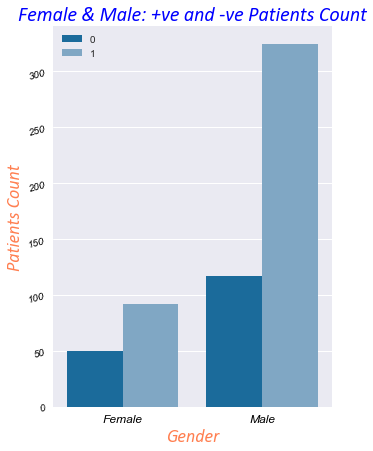

In [15]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(5,7))
    sns.barplot(x='Gender',y='Patients_Count',hue='Label',data=pos_neg_patients_as_per_gender,palette=sns.color_palette('PuBu_r',3))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Patients Count',fontdict=label_font_dict)
    plt.title('Female & Male: +ve and -ve Patients Count',fontdict=title_font_dict)
    plt.xticks(ticks=[0,1],labels=['Female','Male'],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
    plt.legend()
plt.show()

##### **This shows us that for Males there is a significant difference among +ve and -ve patients.**

#### **``PLOT - 4``**
##### **``"Positive and Negative Patients Count as per AGE and GENDER"``**

In [16]:
patients_df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Label  
0      3.3                        0.90      1  
1      3.2                        0.74      1  
2      3.3                        0.89      1  
3      3.4                        1.00      1  
4      2.4                        0.40      1

In [17]:
pos_neg_patients_as_per_age_gender = patients_df.groupby(['Age','Gender','Label']).count()['Total_Bilirubin'].reset_index()
pos_neg_patients_as_per_age_gender.columns = ['Age','Gender','Label','Patients_Count']
pos_neg_patients_as_per_age_gender.head()

Age  Gender  Label  Patients_Count
0    4    Male      0               2
1    6    Male      0               1
2    7  Female      1               1
3    7    Male      0               1
4    8  Female      1               1

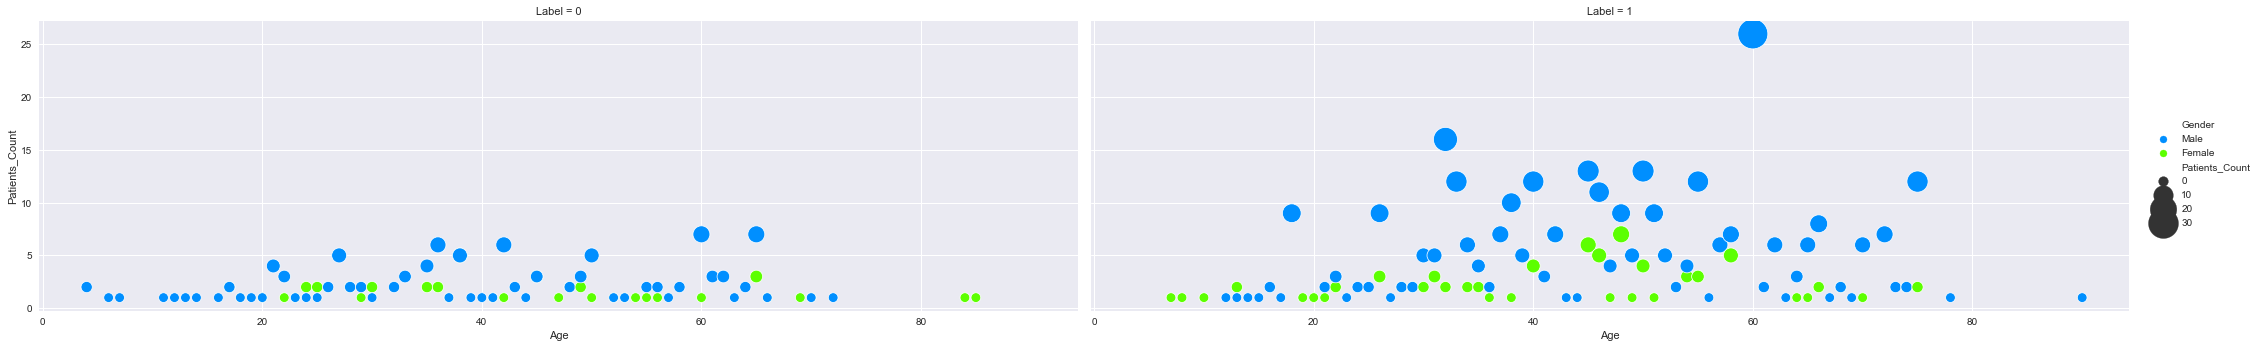

In [18]:
with plt.style.context('seaborn'):
    sns.relplot(x='Age',y='Patients_Count',hue='Gender',col='Label',data=pos_neg_patients_as_per_age_gender,size='Patients_Count',sizes=(95,900),
                palette=sns.color_palette('gist_rainbow_r',2),height=5,aspect=3)
plt.show()

##### **This shows the bifurcation of +ve and -ve patients across Age for both the Genders.**
##### **Few points to joot down here:**
- ###### **Among females the major spikes are only present in the age group of 40-50 years**
- ###### **One question that this dataset loudly raise, is that, does liver disease is not prevalent among Indian females?**
    - ###### **To gain understanding around that we really need to study the alcohol/smoking habits of females or their lifestyle in rural/urban/sub urban regions of India.**
    - ###### **Below are some links that can be checked out:**

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025160/

https://www.thenewsminute.com/article/andhra-pradesh-tops-smoking-and-alcohol-consumption-kerala-comes-second-44996

https://www.shethepeople.tv/news/indian-women-drinking-more/#:~:text=Key%20Points%3A-,Alcohol%20consumption%20in%20India%20increased%20by%2038%20percent%20between%202010,report%20by%20AIIMS%20as%20saying.

#### **``PLOT - 5``**
##### **``"Does higher value of Total Bilirubin leads to Liver Disease?"``**

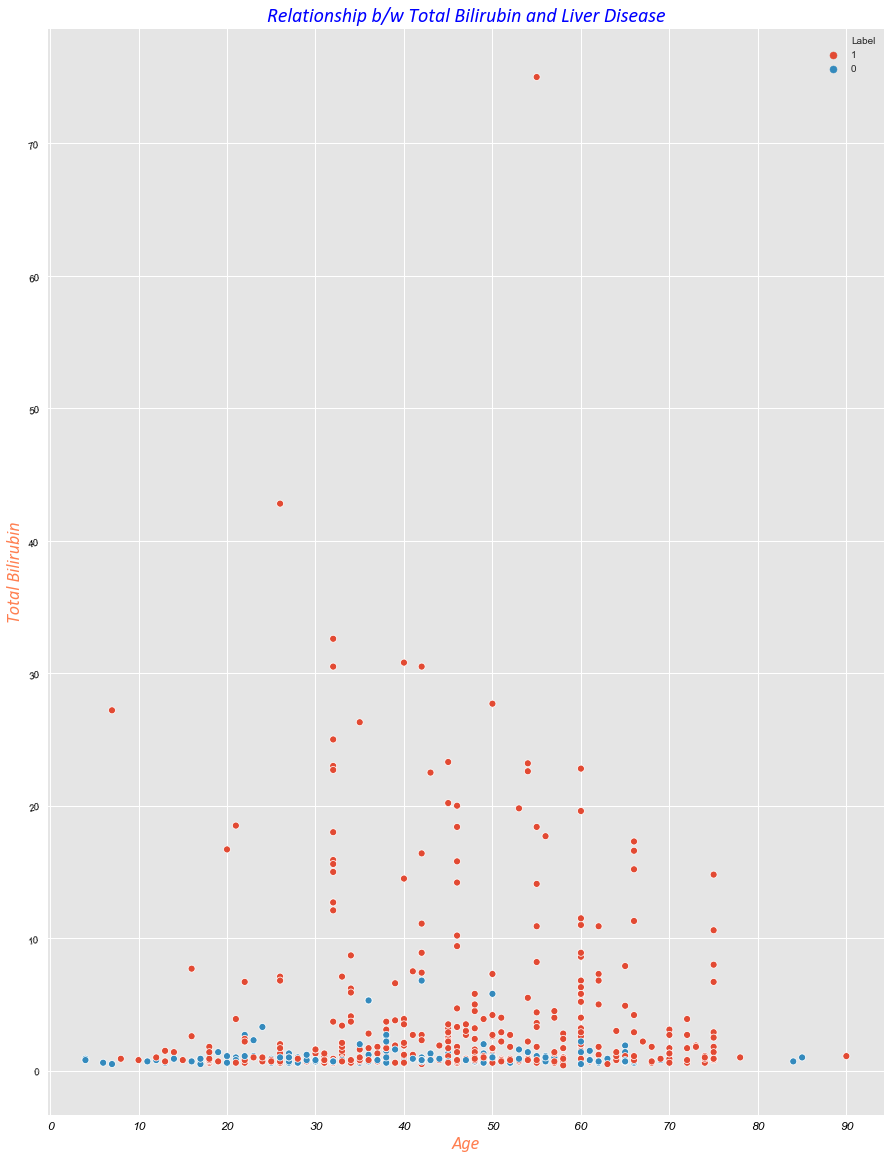

In [19]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(15,20))
    sns.scatterplot(x='Age',y='Total_Bilirubin',hue='Label',data=patients_df,hue_order=[1,0])
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Relationship b/w Total Bilirubin and Liver Disease',fontdict=title_font_dict)
    plt.xticks(ticks=[0,10,20,30,40,50,60,70,80,90],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
plt.show()

##### **This is clearly evident that higher value of Total Bilirubin does leads to Liver disease. However, there are positive cases at the lower value as well.** 
##### **Same is displayed in below chart ::**

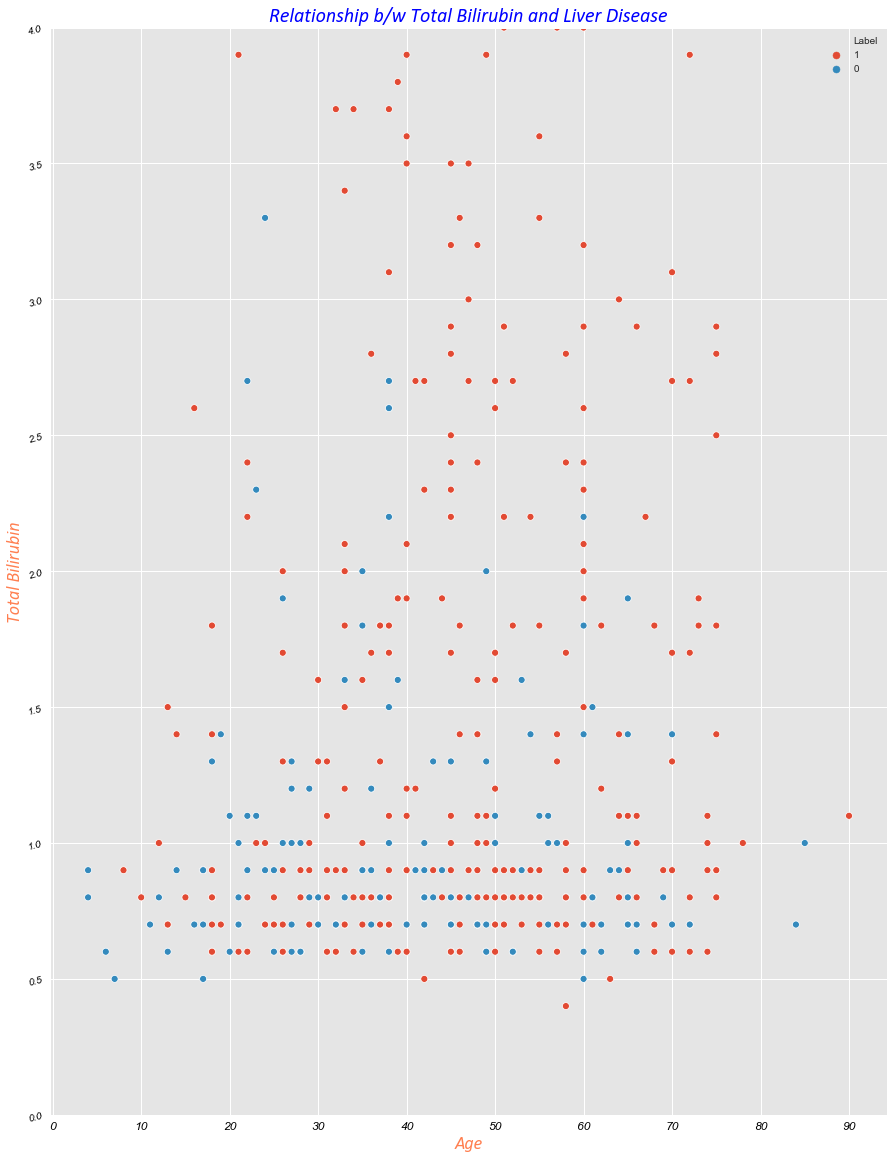

In [20]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(15,20))
    fig = sns.scatterplot(x='Age',y='Total_Bilirubin',hue='Label',data=patients_df,hue_order=[1,0])
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Relationship b/w Total Bilirubin and Liver Disease',fontdict=title_font_dict)
    plt.xticks(ticks=[0,10,20,30,40,50,60,70,80,90],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
    plt.ylim(bottom=0,top=4)
plt.show()

#### **``PLOT - 6``**
##### **``"Above plot raises a question : Does liver problems are more prominent at a higher age?"``**
###### **From first look of above Scatter Plot it doesn't seems like that. Still, let's plot a line graph..**

In [21]:
pos_neg_patients_as_per_age = patients_df.groupby(['Age','Label']).count()['Gender'].reset_index()
pos_neg_patients_as_per_age.columns = ['Age','Label','Patients_Count']
pos_neg_patients_as_per_age.head()

Age  Label  Patients_Count
0    4      0               2
1    6      0               1
2    7      0               1
3    7      1               1
4    8      1               1

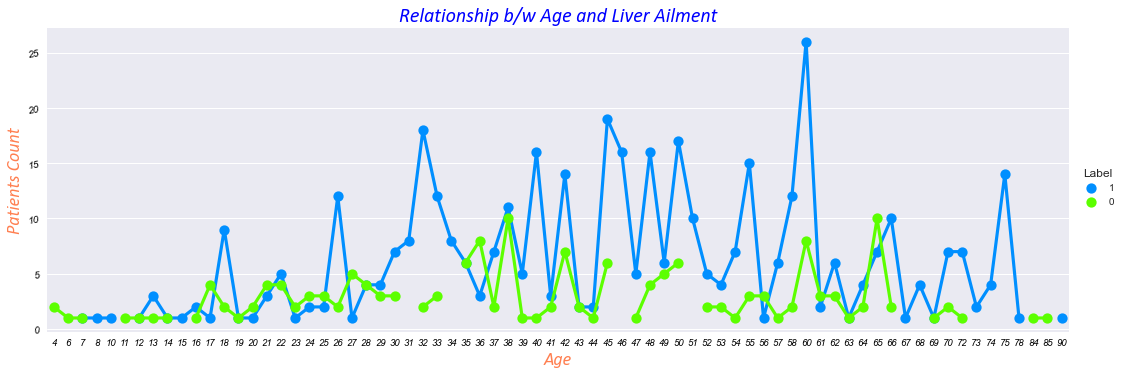

In [22]:
with plt.style.context('seaborn'):
    sns.catplot(x='Age',y='Patients_Count',hue='Label',data=pos_neg_patients_as_per_age,kind='point',
                height=5,aspect=3,hue_order=[1,0],palette=sns.color_palette('gist_rainbow_r',2))
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Patients Count',fontdict=label_font_dict)
    plt.title('Relationship b/w Age and Liver Ailment',fontdict=title_font_dict)
    plt.xticks(color='black',size=9.5,style='oblique')
    plt.yticks(rotation=10,color='black',size=10,style='oblique')
plt.show()

##### **So, the initial guess proves out to be correct as we can see the spikes across every age.** 
##### **However, there are few things which needs to be examined:**
- ###### **Some good number of patients below 35 years of age**
- ###### **Very less number of non-diseased people exist after 66 years of age**
    - ###### **And, we also witnessed a significant jump in the number of cases at 75 years of age**

#### **``PLOT - 7``**
##### **``"Does Total Bilirubin and Direct Bilirubin together leads to liver problems?"``**
###### **Going by the medical words this should be proved correct...**

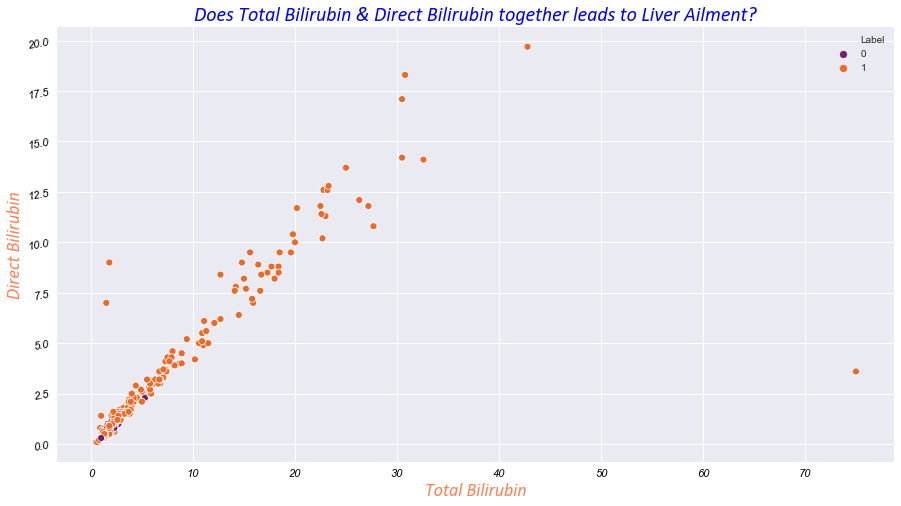

In [23]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,8))
    sns.scatterplot(x='Total_Bilirubin',y='Direct_Bilirubin',hue='Label',
                    hue_order=[0,1],data=patients_df,palette=sns.color_palette('inferno',2))
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & Direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

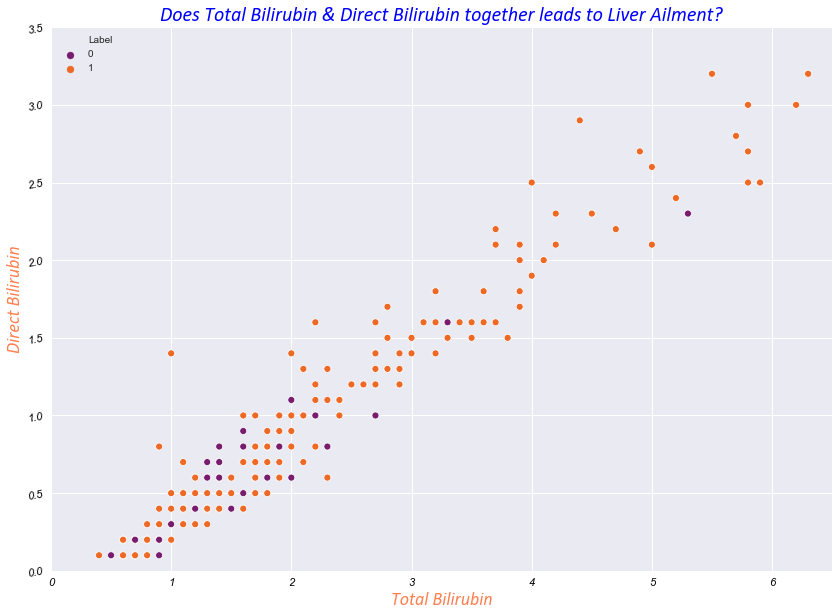

In [24]:
## Close-eye with shorter axes
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,10))
    sns.scatterplot(x='Total_Bilirubin',y='Direct_Bilirubin',hue='Label',
                    hue_order=[0,1],data=patients_df,palette=sns.color_palette('inferno',2))
    plt.ylim(0,3.5)
    plt.xlim(0,6.5)
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & Direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Here, we hit the bingo!! Statistically speaking it looks like Total Bilirubin & Direct Bilirubin both are correlated with each other and shows good sign of relationship.**

In [25]:
pearson_coeff_r = pd.DataFrame(np.corrcoef(patients_df['Total_Bilirubin'],patients_df['Direct_Bilirubin']))
pearson_coeff_r

0         1
0  1.000000  0.874618
1  0.874618  1.000000

In [26]:
pearson_coeff_r_sqr = pearson_coeff_r.applymap(lambda val: np.square(val))
pearson_coeff_r_sqr

0         1
0  1.000000  0.764957
1  0.764957  1.000000

##### **This mean approx 76% of the variations in these two variables are explainable because among them. And, they are positively correlated to each other.**

#### **``PLOT - 8``**
##### **``"Let's bring Unconjugated or Indirect Bilirubin in our dataset and examine its relationship with Total or Direct Bilirubin"``**
###### **Going by the medical words we would definitely find something good too here..**

In [27]:
patients_df['Unconjugated_bilirubin'] = patients_df['Total_Bilirubin'] - patients_df['Direct_Bilirubin']
patients_df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Label  Unconjugated_bilirubin  
0      3.3                        0.90      1                     0.6  
1      3.2                        0.74      1                     5.4  
2      3.3                        0.89      1                     3.2  
3      3.4                        1.00      1                     0.6  
4      2.4                        0.40      1                     1.9

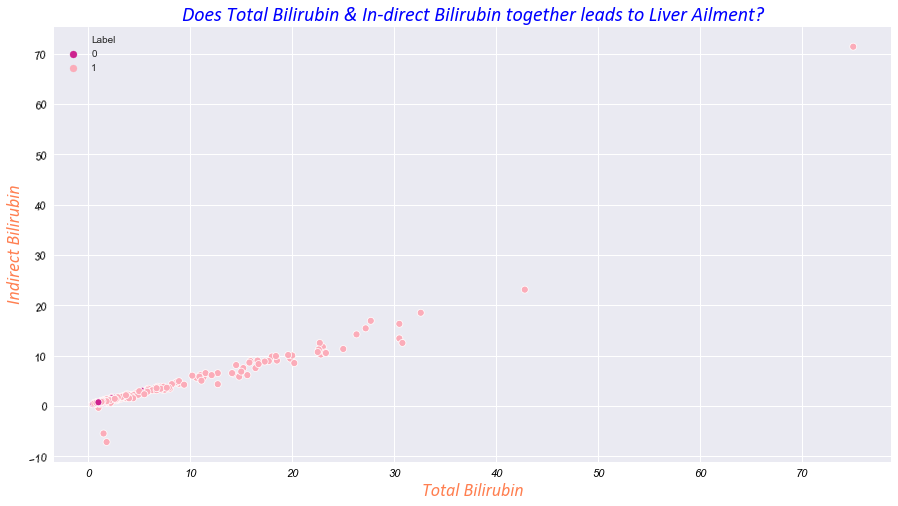

In [28]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,8))
    sns.scatterplot(x='Total_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('RdPu_r',2))
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **There is definitely a significant role of Total and Unconjugated Bilirubin towards Liver Disease.**
##### **Let's observe it closely:**

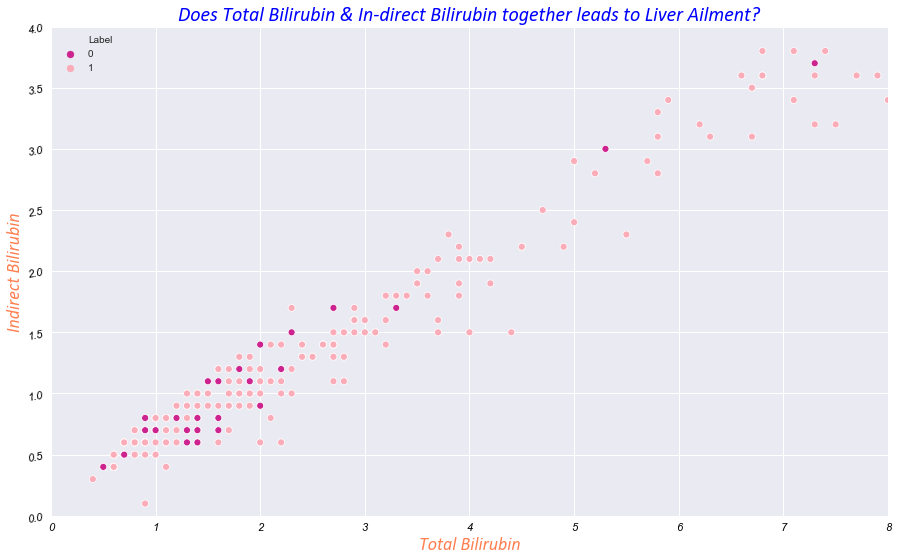

In [29]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,9))
    sns.scatterplot(x='Total_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('RdPu_r',2))
    plt.xlim(0,8)
    plt.ylim(0,4)
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This definitely shows us that if someone has higher level of both Indirect and Total Bilirubin then there are severe chances of liver ailment.**
##### **Let's check their correlation value:**

In [30]:
np.corrcoef(patients_df['Total_Bilirubin'],patients_df['Unconjugated_bilirubin'])

array([[1.        , 0.94004973],
       [0.94004973, 1.        ]])

##### **As the scatter plot depicted both Total and Unconjugated Bilirubin are highly correlated with each other.**

In [31]:
pd.DataFrame(np.corrcoef(patients_df['Total_Bilirubin'],patients_df['Unconjugated_bilirubin'])).applymap(lambda val: np.square(val))

0         1
0  1.000000  0.883694
1  0.883694  1.000000

##### **This mean approx 88% of the variations in these two variables are explainable among them. And, they are positively correlated to each other.**

#### **``PLOT - 9``**
##### **``"Let's visualize the distribution of Total, Direct and Indirect Bilirubin in males and females"``**

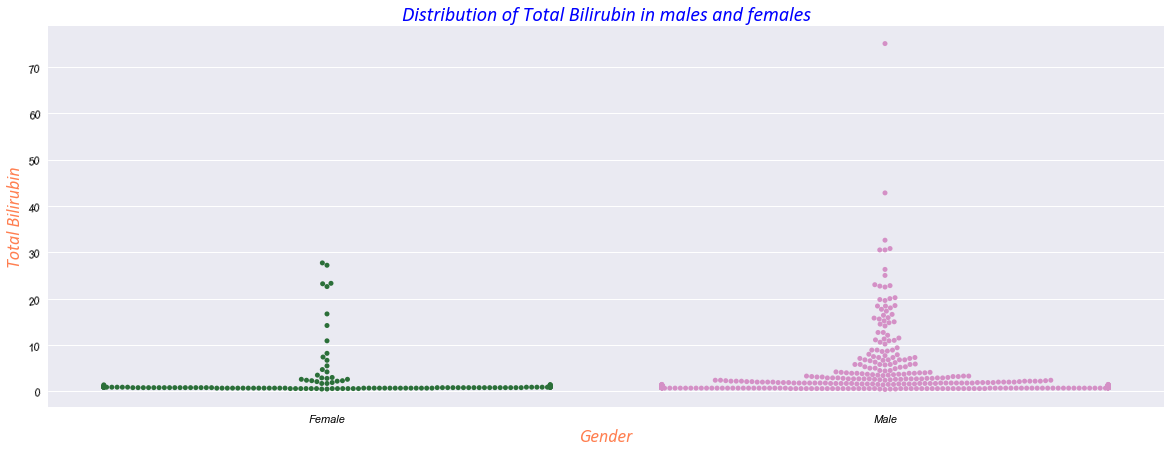

In [32]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Total_Bilirubin',data=patients_df,palette=sns.color_palette('cubehelix',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Total Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Close-look**

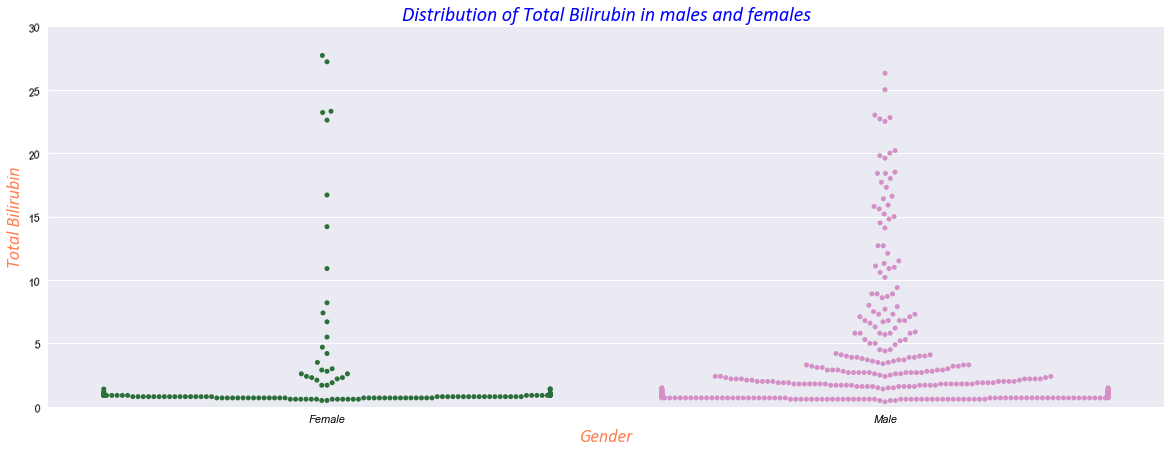

In [33]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Total_Bilirubin',data=patients_df,palette=sns.color_palette('cubehelix',2))
    plt.ylim(0,30)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Total Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

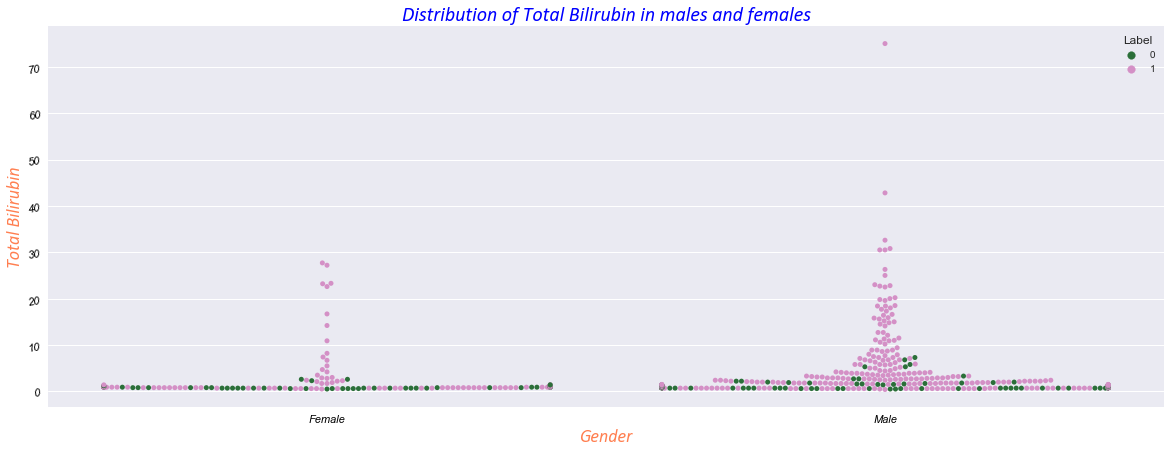

In [34]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Total_Bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('cubehelix',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Total Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **``Direct Bilirubin``**

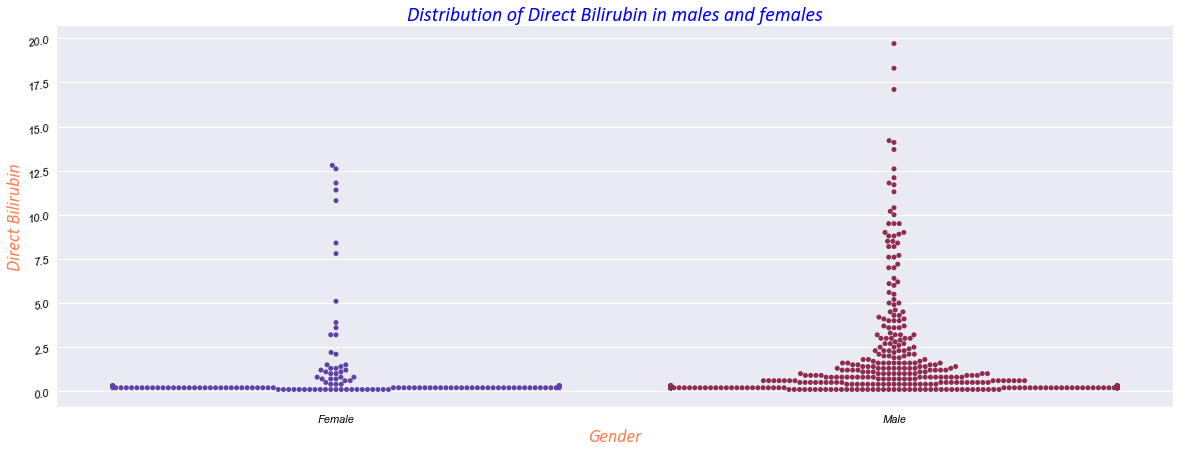

In [35]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Direct_Bilirubin',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

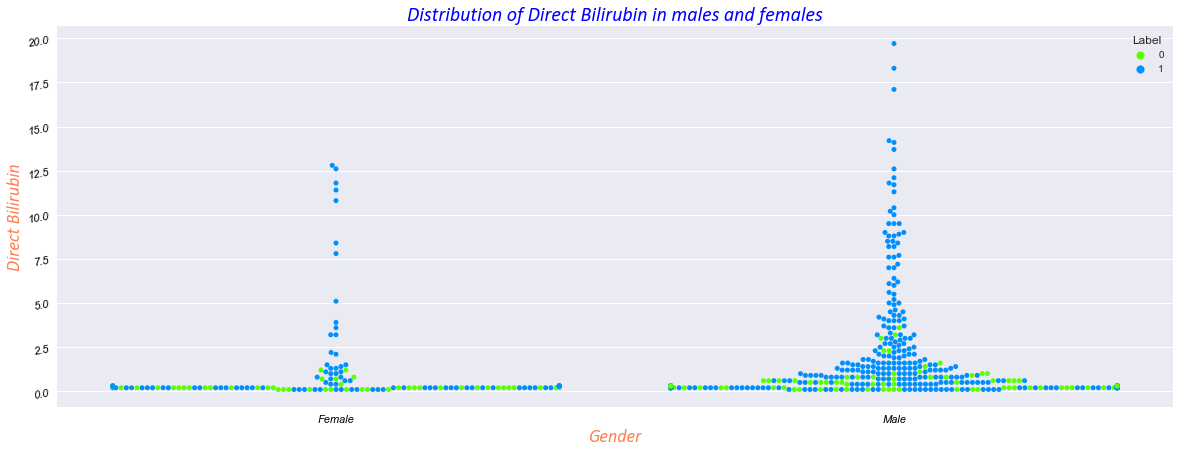

In [36]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Direct_Bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **``Unconjugated Bilirubin``**

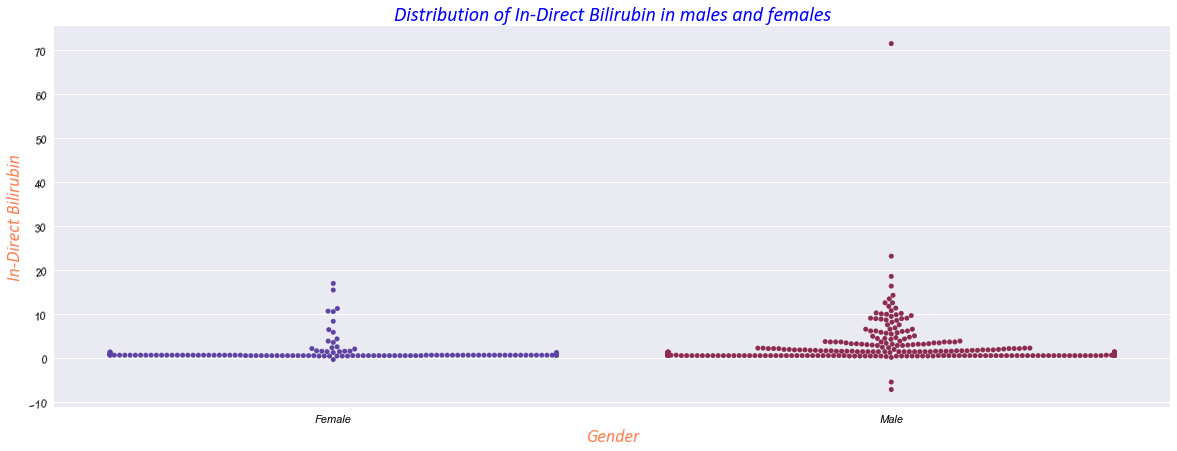

In [37]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Unconjugated_bilirubin',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('In-Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of In-Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Close Look**

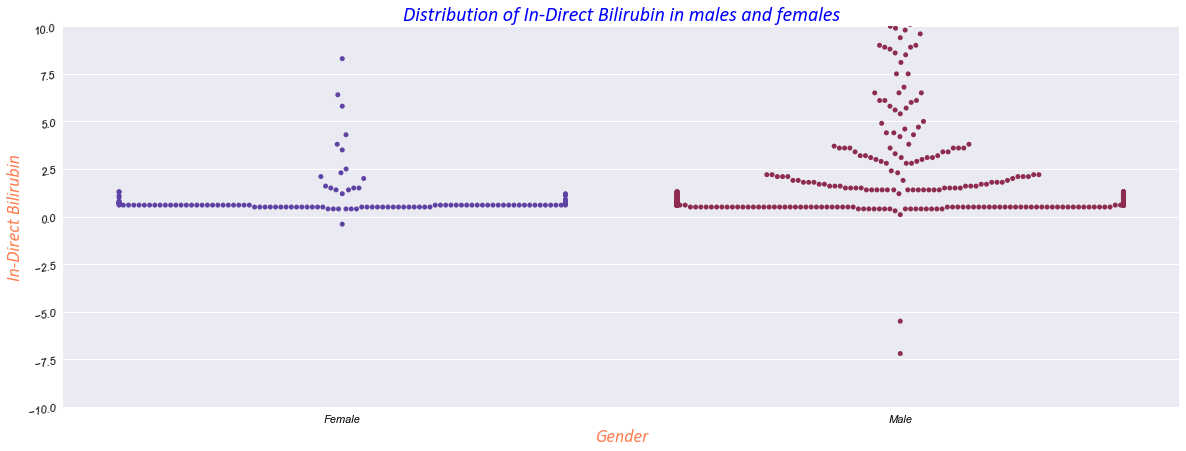

In [38]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Unconjugated_bilirubin',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.ylim(-10,10)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('In-Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of In-Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

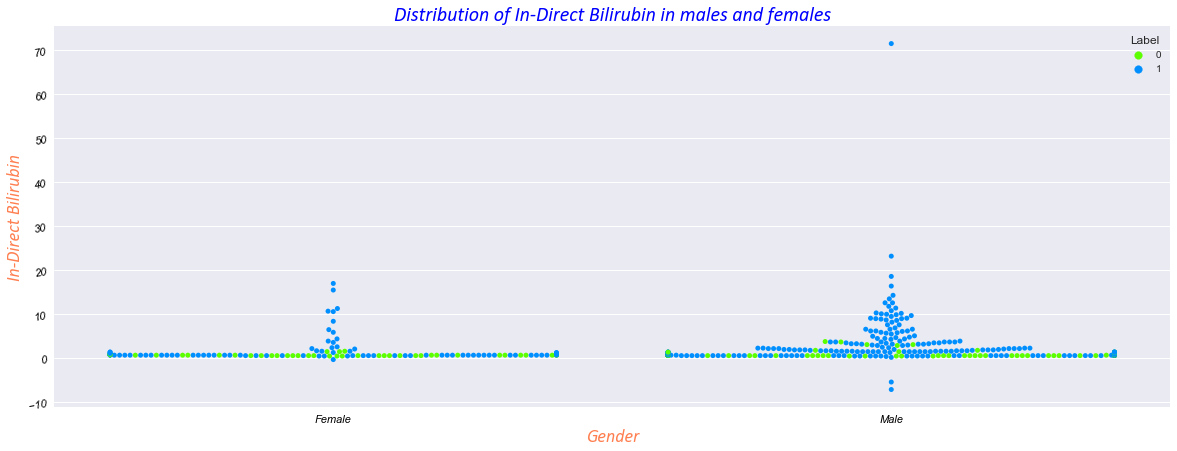

In [39]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('In-Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of In-Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 10``**
##### **``"Let's examine the relationship of Direct and In-direct Bilirubin"``**

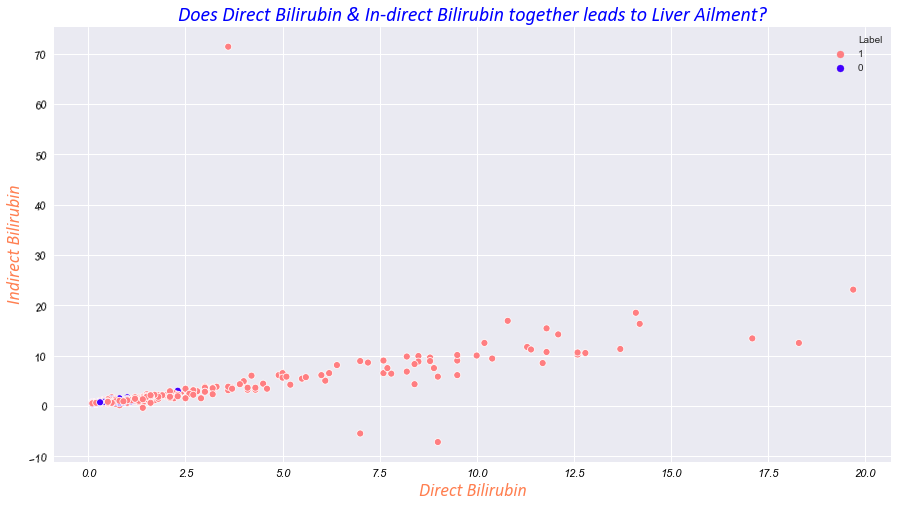

In [40]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,8))    
    sns.scatterplot(x='Direct_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,
                    hue_order=[1,0],palette=sns.color_palette('gnuplot2_r',2))
    plt.xlabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Direct Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **One point to note here is that data points are not tightly packed after a certian value of Direct Bilirubin which shows there might be a influence of other variable.**
##### **Let's observe it closely:**

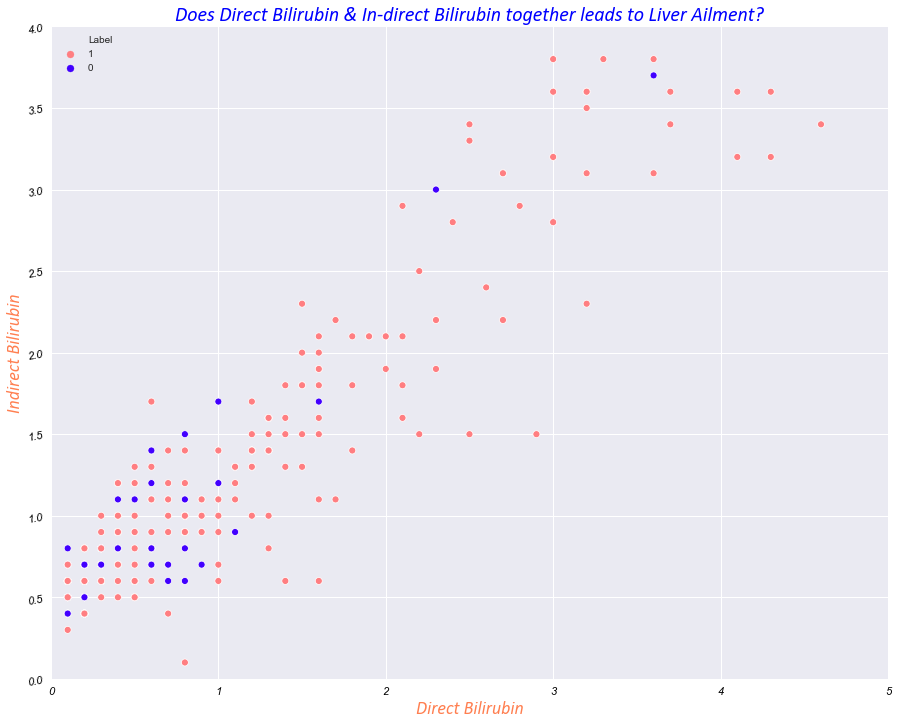

In [41]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))    
    sns.scatterplot(x='Direct_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,
                    hue_order=[1,0],palette=sns.color_palette('gnuplot2_r',2))
    plt.xlim(0,5)
    plt.ylim(0,4)
    plt.xlabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Direct Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
    plt.legend(loc='upper left')
plt.show()

##### **Let's check their correlation value:**

In [42]:
np.corrcoef(patients_df['Direct_Bilirubin'],patients_df['Unconjugated_bilirubin'])

array([[1.        , 0.65684506],
       [0.65684506, 1.        ]])

In [43]:
pd.DataFrame(np.corrcoef(patients_df['Direct_Bilirubin'],patients_df['Unconjugated_bilirubin'])).applymap(lambda val: np.square(val))

0         1
0  1.000000  0.431445
1  0.431445  1.000000

##### **This mean approx 43% of the variations in these two variables are explainable among them. And, they are positively correlated to each other.**

#### **``PLOT - 11``**
##### **``"Let's see the trend In-direct Bilirubin across all ages"``**

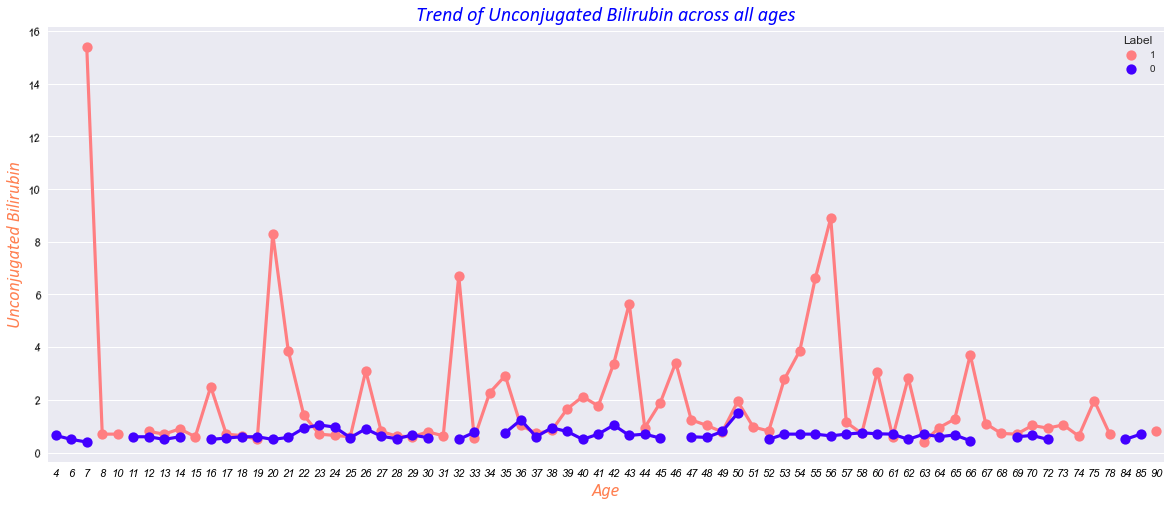

In [44]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,8))
    sns.pointplot(x='Age',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('gnuplot2_r',2),hue_order=[1,0],ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Unconjugated Bilirubin',fontdict=label_font_dict)
    plt.title('Trend of Unconjugated Bilirubin across all ages',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Well, the higher level of Unconjugated Bilirubin dictates the existence of Liver ailment. However, the lower level of it doesn't really rule out the possibility of disease.** 

#### **``PLOT - 12``**
##### **``"Above Point-plot gives rise to a question is that, does the level of In-direct Bilirubin varies significantly across gender?"``**

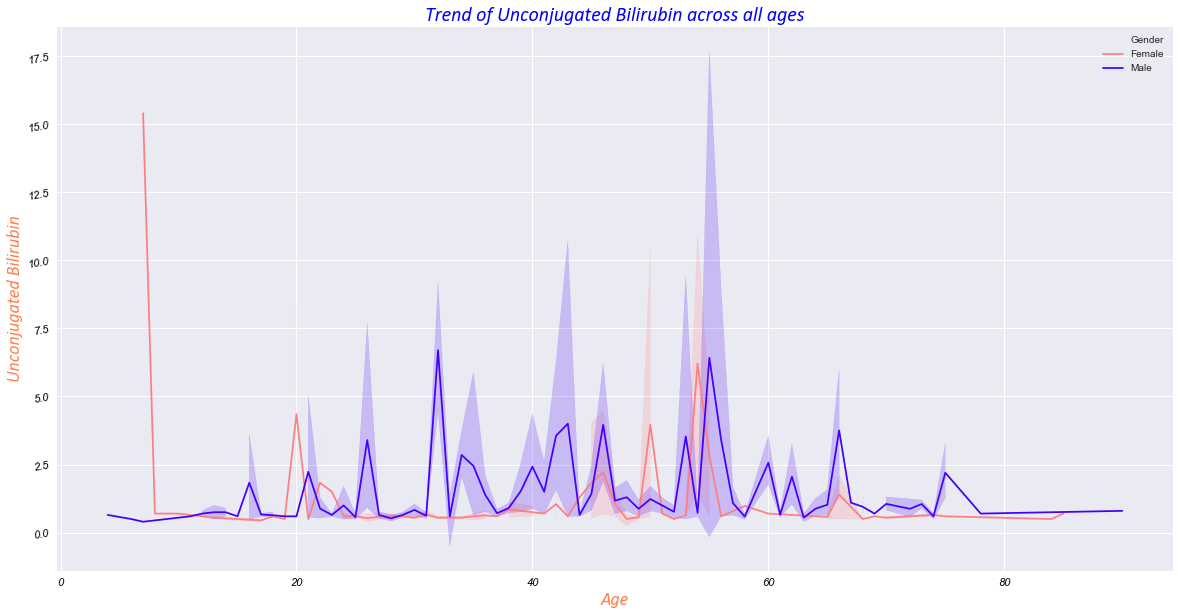

In [45]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,10))
    sns.lineplot(x='Age',y='Unconjugated_bilirubin',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot2_r',2),ci=95)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Unconjugated Bilirubin',fontdict=label_font_dict)
    plt.title('Trend of Unconjugated Bilirubin across all ages',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.legend(loc='upper right')
plt.show()

##### **This graph certainly caught my attention on below points:**
- ###### **The spike for females is higher than males at the age of 50 and both gender are at the same level of Unconjugated bilirubin at the age of 55** 
- ###### **The spike at the age of 20 in females is higher than males**
##### **``There can be multiple reasons for these spikes, So, before identifying their cause lets first check whether these spikes leads to liver disease.``** 

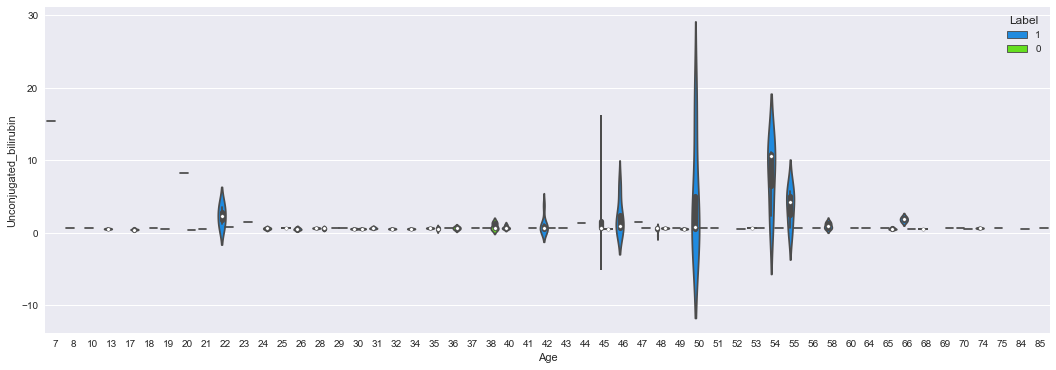

In [46]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6))
    sns.violinplot(x='Age',y='Unconjugated_bilirubin',hue='Label',hue_order=[1,0],
                data=patients_df[patients_df['Gender'] == 'Female'],palette=sns.color_palette('gist_rainbow_r',2))
plt.show()

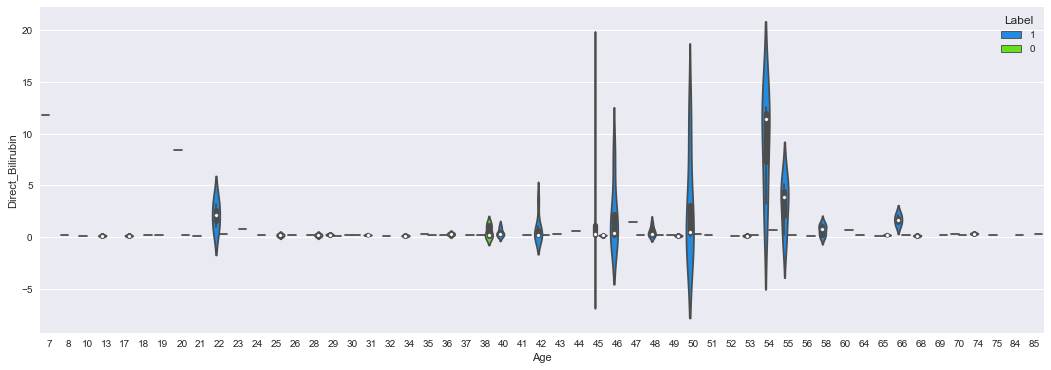

In [47]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6))
    sns.violinplot(x='Age',y='Direct_Bilirubin',hue='Label',hue_order=[1,0],
                data=patients_df[patients_df['Gender'] == 'Female'],palette=sns.color_palette('gist_rainbow_r',2),ci=False)
plt.show()

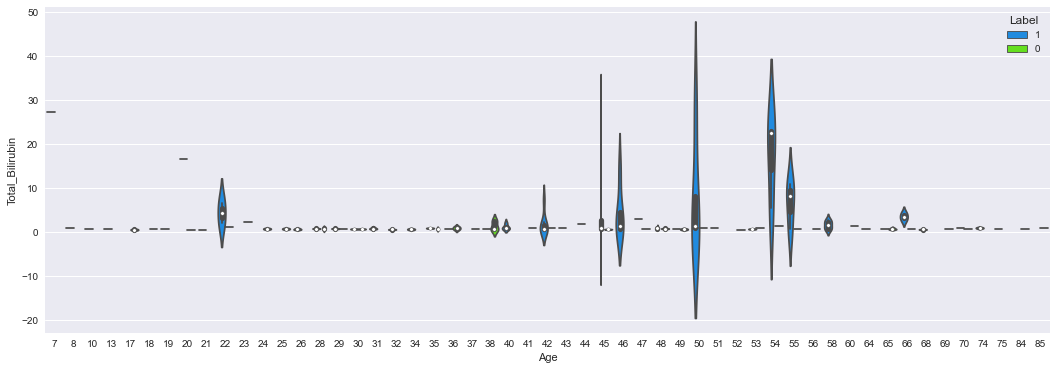

In [48]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6))
    sns.violinplot(x='Age',y='Total_Bilirubin',hue='Label',hue_order=[1,0],
                data=patients_df[patients_df['Gender'] == 'Female'],palette=sns.color_palette('gist_rainbow_r',2),ci=False)
plt.show()

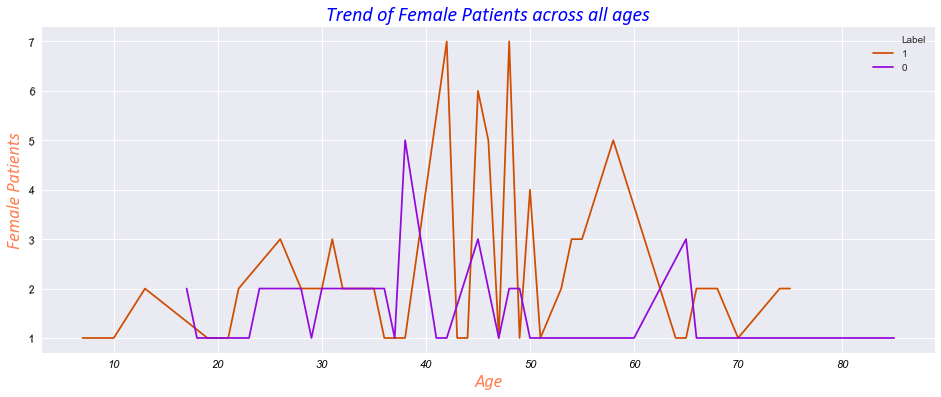

In [49]:
female_pos_neg = patients_df[patients_df['Gender'] == 'Female'].groupby(['Age','Label']).count()['Gender'].reset_index()
female_pos_neg.columns = ['Age','Label','Patients_Count']

with plt.style.context('seaborn'):
    plt.figure(figsize=(16,6))
    sns.lineplot(x='Age',y='Patients_Count',hue='Label',data=female_pos_neg,palette=sns.color_palette('gnuplot_r',2),hue_order=[1,0])
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Female Patients',fontdict=label_font_dict)
    plt.title('Trend of Female Patients across all ages',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Now, here the spikes which we discussed in previous plot showing the presence of multiple positively diagnosed cases. ``This definitely raises the eyebrow and can we say that postmenopausal(age >= 50) women are more prone to liver disease?``**
##### **``Check out below links and some papers do suggest that postmenopausal hormonal imbalance makes women vulnerable towards liver disease:``**

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4491951/

https://www.hindawi.com/journals/bmri/2015/131528/

https://www.rush.edu/health-wellness/discover-health/hormones-you-age#:~:text=For%20women%3A%20menopause,follicle%20stimulating%20hormone%20(FSH).

##### **``Check out below paper suggesting that postmenopausal the level of total and direct bilirubin increased significantly:``**
https://www.researchgate.net/publication/43084619_Altered_Liver_Function_and_the_Status_of_Calcium_in_Postmenopausal_Women_in_and_Around_Mangalore#:~:text=The%20level%20of%20total%20bilirubin,women's%20(p%3C0.0001).

##### **With respect to the spike at 20 years of age in females there can be multiple reasons for that, however, alcohol consumption and bad lifestyle can be the leading factors. Check out the below paper discussing the ``Problem alcohol drinking in rural women of Telangana region, Andhra Pradesh``.**
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025160/

https://timesofindia.indiatimes.com/life-style/health-fitness/health-news/is-liver-disease-the-next-major-lifestyle-disease-of-india-after-diabetes-and-bp/articleshow/58122706.cms

https://thepapergown.zocdoc.com/why-are-more-young-women-getting-cirrhosis/#:~:text=For%20alcohol%2Drelated%20cirrhosis%20to,at%20the%20University%20of%20Michigan

#### **``PLOT - 13``**
##### **``"ALP trend in males and females across all ages"``**

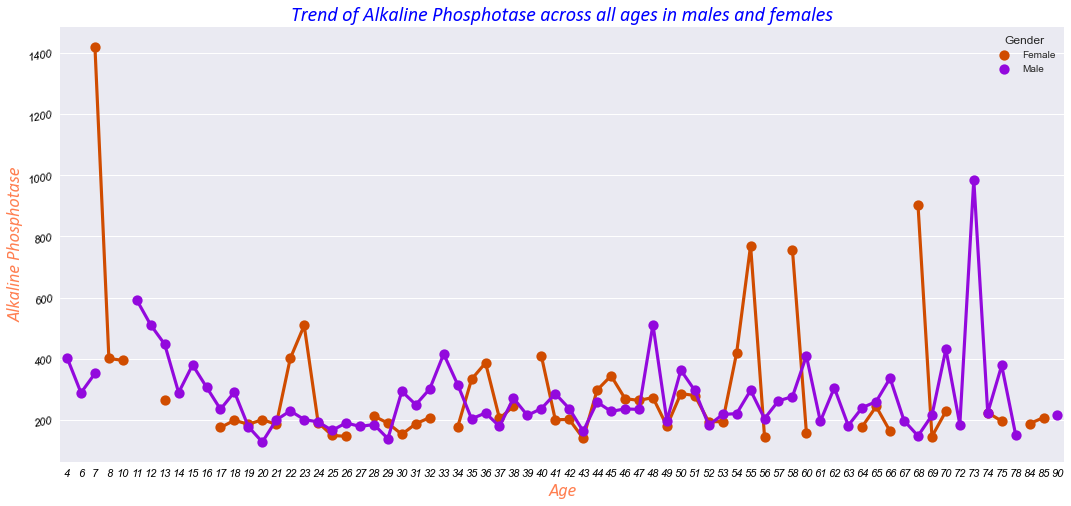

In [50]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,8))
    sns.pointplot(x='Age',y='Alkaline_Phosphotase',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot_r',2),ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Trend of Alkaline Phosphotase across all ages in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **For females there is a moderate jump in the level of ASP after the age of 50. However, in males it tends to follow the consistent path with one paramount jump at the end.**

##### **Let's visualize the distirbution for +ve and -ve cases.**

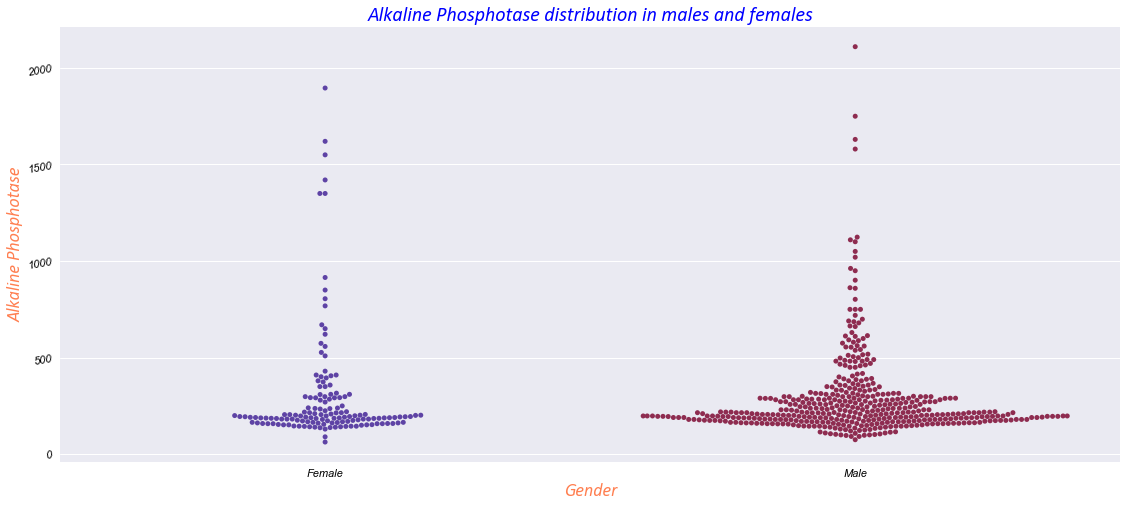

In [51]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alkaline_Phosphotase',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Alkaline Phosphotase distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

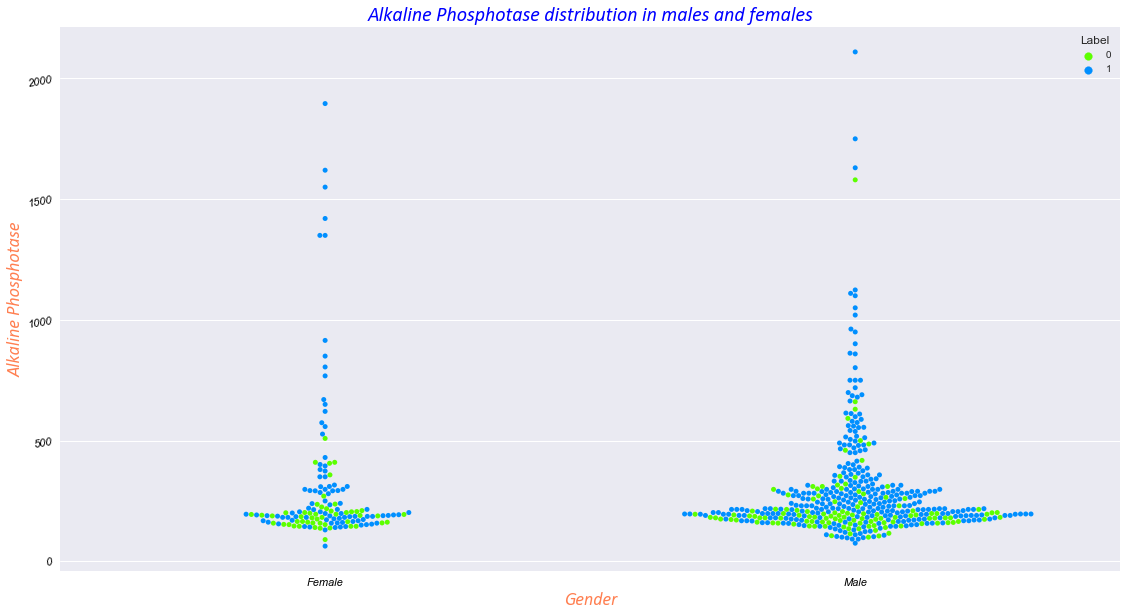

In [52]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,10))
    sns.swarmplot(x='Gender',y='Alkaline_Phosphotase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2),hue_order=[0,1])
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Alkaline Phosphotase distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Close Look**

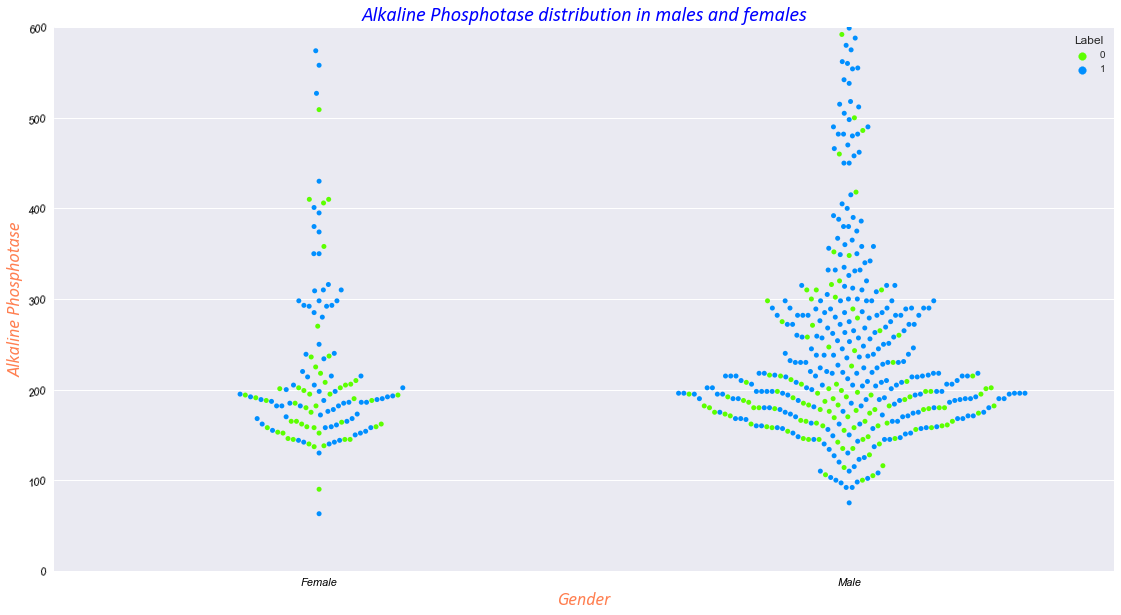

In [53]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,10))
    sns.swarmplot(x='Gender',y='Alkaline_Phosphotase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2),hue_order=[0,1])
    plt.ylim(0,600)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Alkaline Phosphotase distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 14``**
##### **``"ALT trend in males and females across all ages"``**

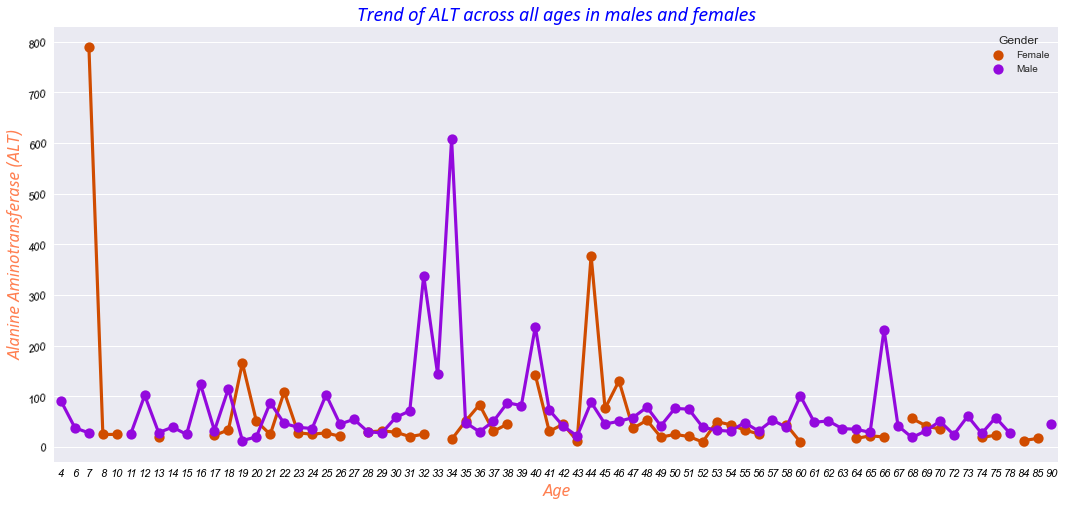

In [54]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,8))
    sns.pointplot(x='Age',y='Alamine_Aminotransferase',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot_r',2),ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Alanine Aminotransferase (ALT)',fontdict=label_font_dict)
    plt.title('Trend of ALT across all ages in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **For females the majority of the trend is flat with major spike at age of 44. Similar tend is visible in males with few peaks around the age of 35, 40 and 65.**

##### **Let's visualize the distirbution for +ve and -ve cases.**

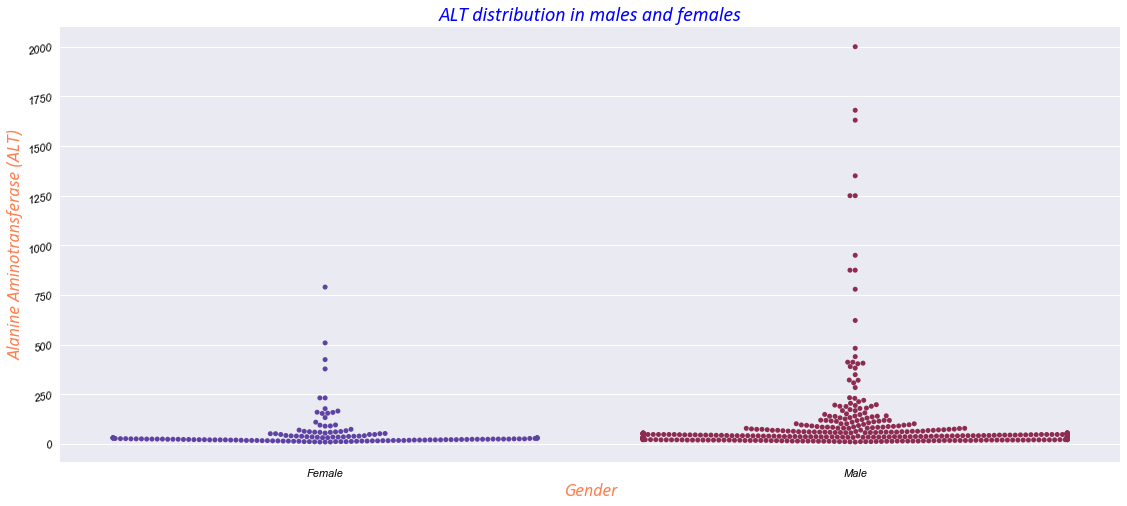

In [55]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alamine_Aminotransferase',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alanine Aminotransferase (ALT)',fontdict=label_font_dict)
    plt.title('ALT distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

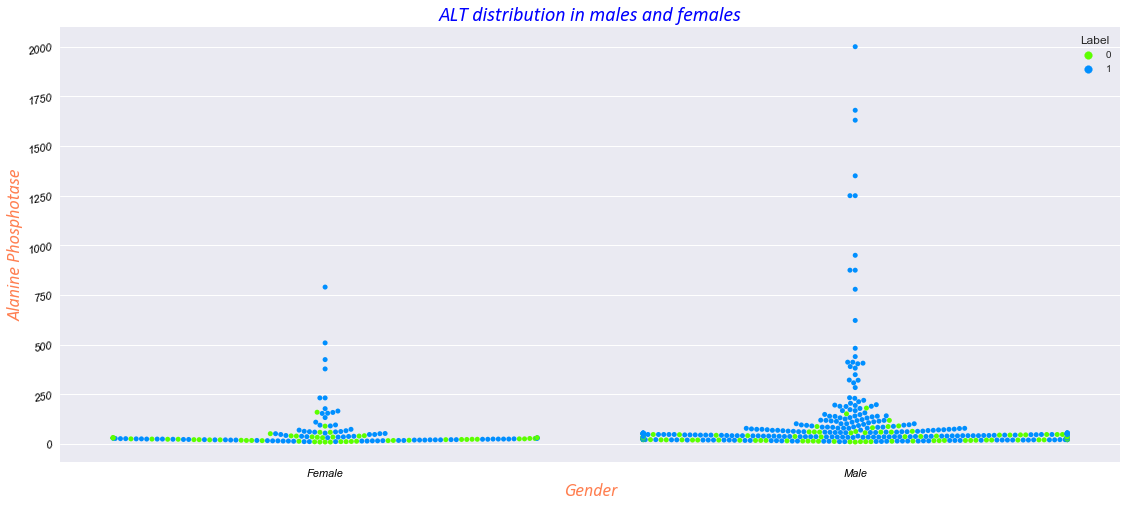

In [56]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alamine_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alanine Phosphotase',fontdict=label_font_dict)
    plt.title('ALT distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

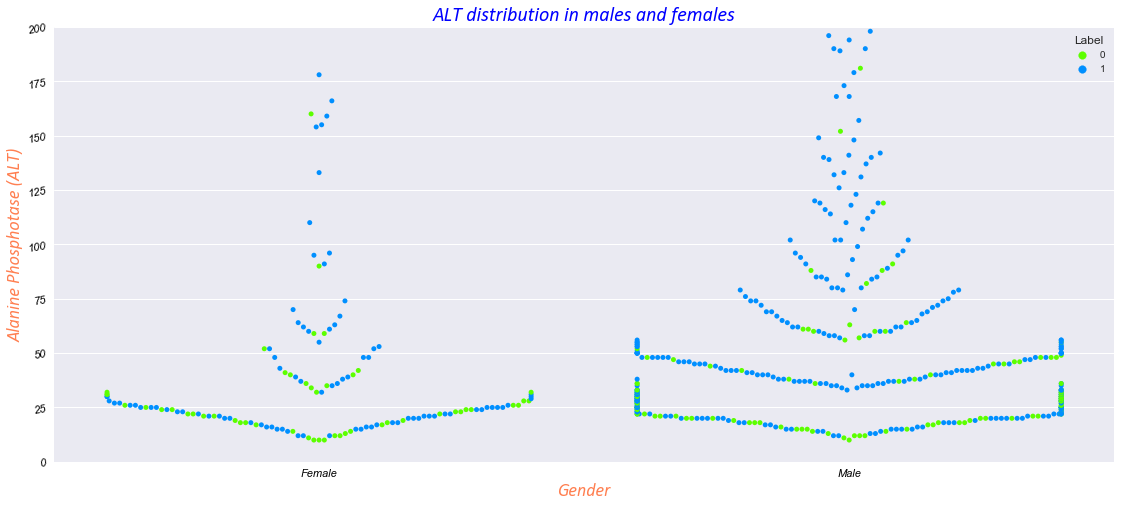

In [57]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alamine_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.ylim(0,200)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alanine Phosphotase (ALT)',fontdict=label_font_dict)
    plt.title('ALT distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 15``**
##### **``"AST trend in males and females across all ages"``**

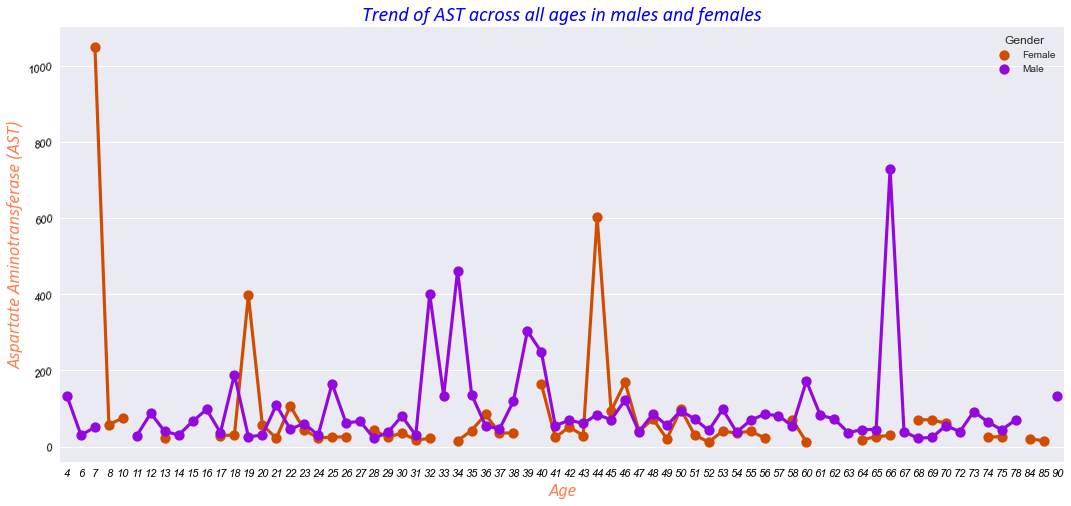

In [58]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,8))
    sns.pointplot(x='Age',y='Aspartate_Aminotransferase',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot_r',2),ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('Trend of AST across all ages in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **The first look made me feel like I have plotted the chart for ALT, but it is of AST. Looks similar to ALT and needs to be examined closely.**

##### **Let's visualize the distirbution for +ve and -ve cases.**

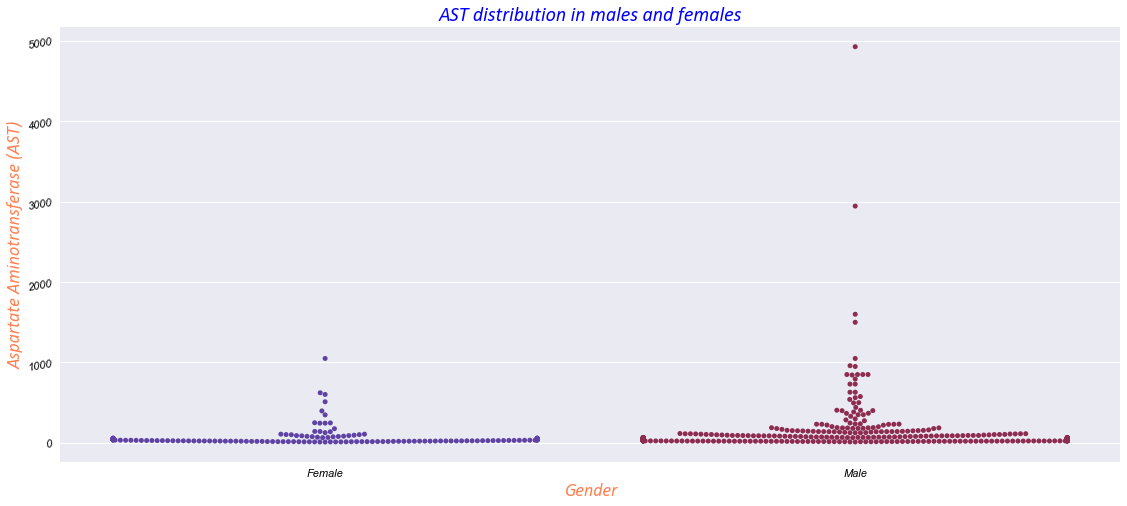

In [59]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

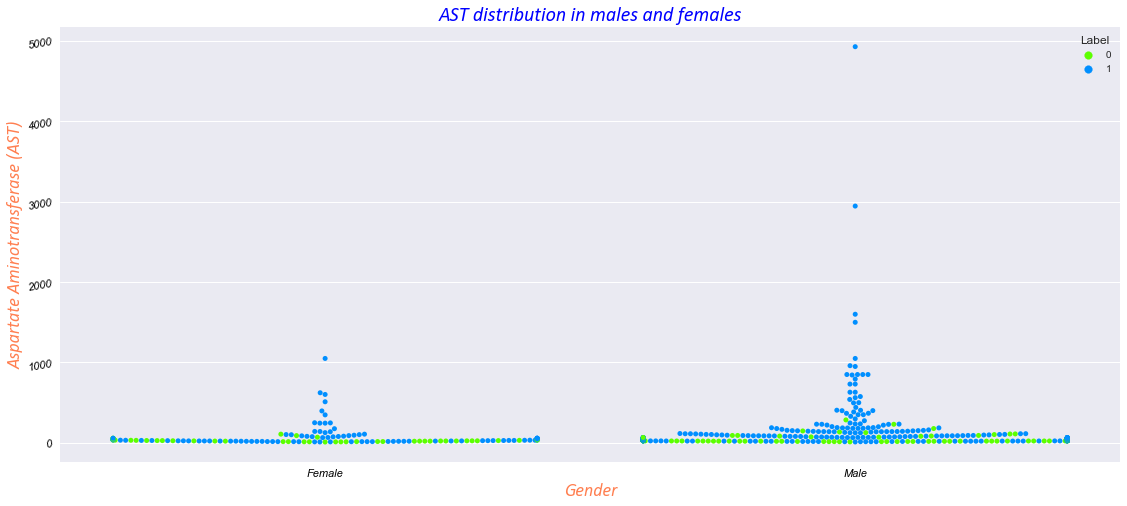

In [60]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

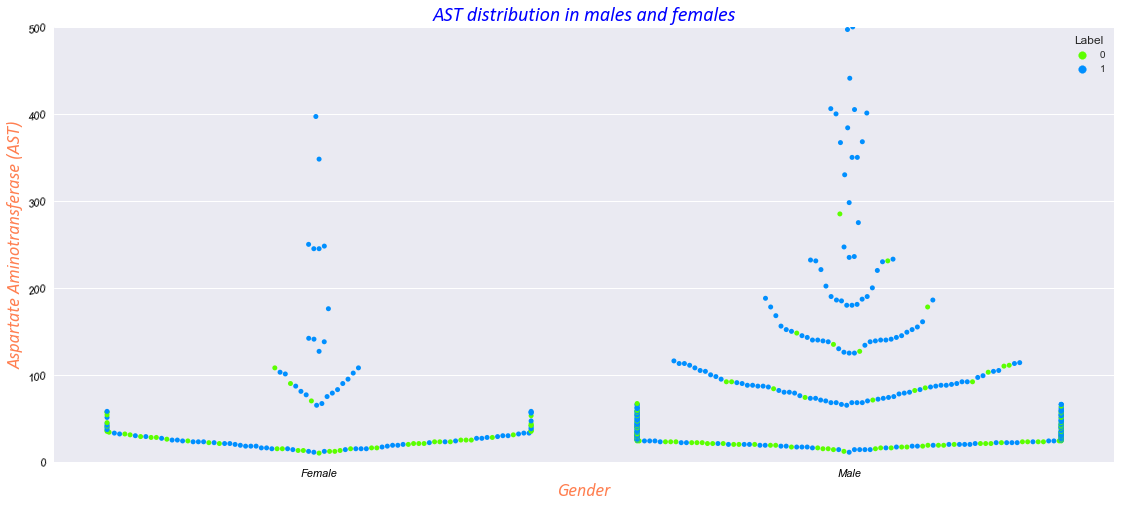

In [61]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.ylim(0,500)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

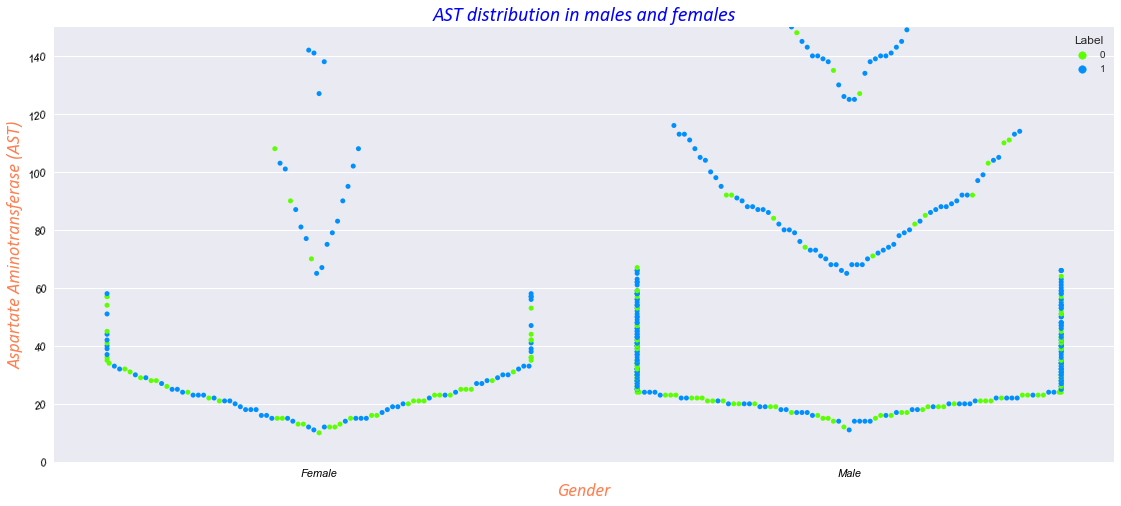

In [62]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.ylim(0,150)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Majority of the data is less than level of 100 IU/L and values are tightly packed which suggests that AST alone is not influencing the presence of liver disease.**

#### **``PLOT - 16``**
##### **``"Relationship b/w ALT and AST for both type of cases"``**

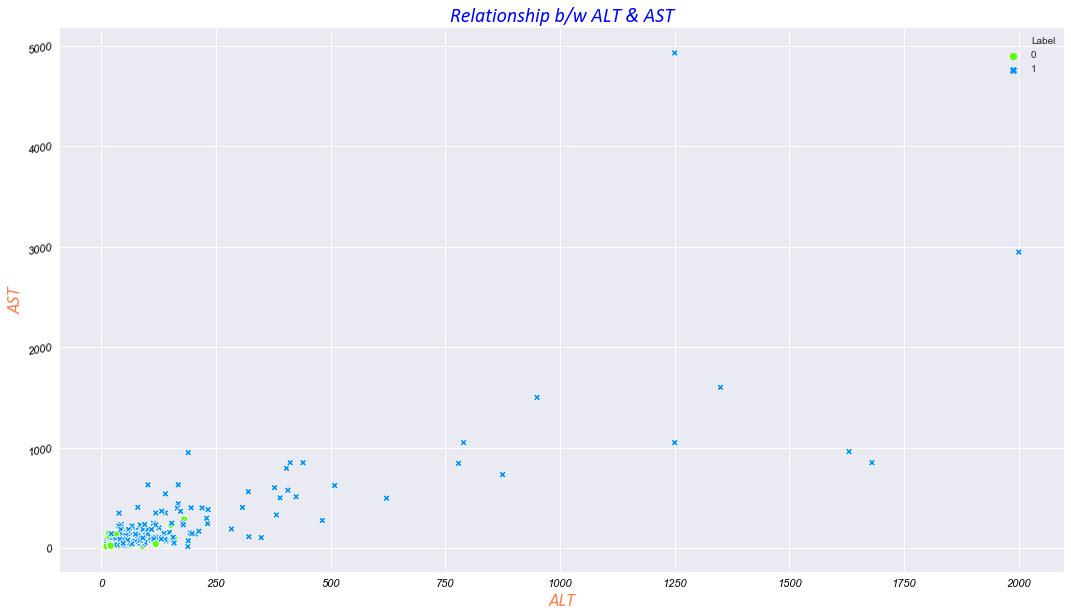

In [63]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.scatterplot(x='Alamine_Aminotransferase',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,
                    palette=sns.color_palette('gist_rainbow',2),style='Label')
    plt.xlabel('ALT',fontdict=label_font_dict)
    plt.ylabel('AST',fontdict=label_font_dict)
    plt.title('Relationship b/w ALT & AST',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

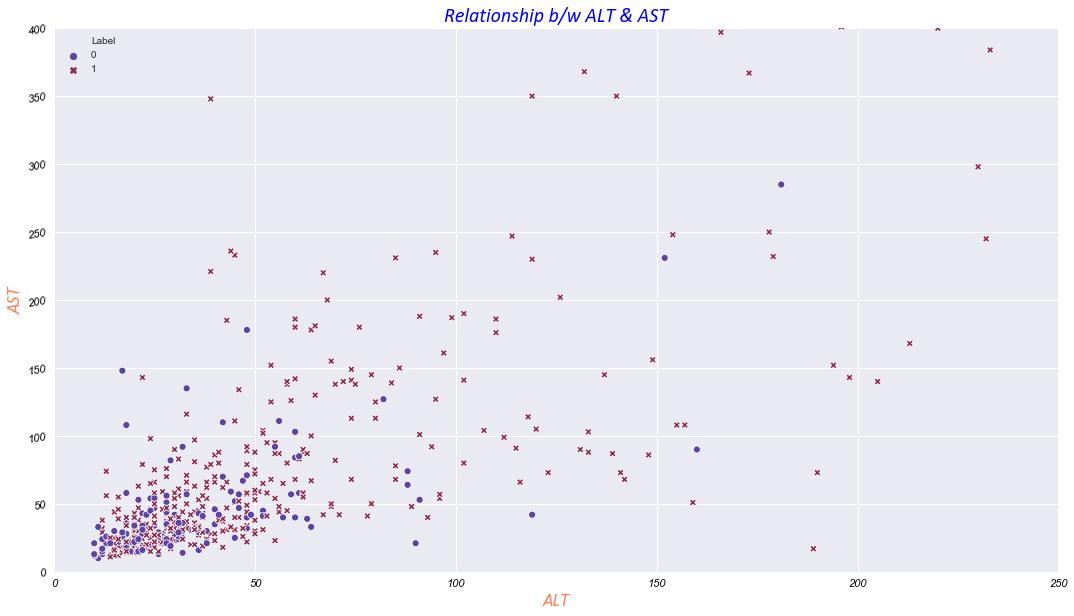

In [64]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.scatterplot(x='Alamine_Aminotransferase',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,
                   palette=sns.color_palette('twilight',2),style='Label')
    plt.xlim(0,250)
    plt.ylim(0,400)
    plt.xlabel('ALT',fontdict=label_font_dict)
    plt.ylabel('AST',fontdict=label_font_dict)
    plt.title('Relationship b/w ALT & AST',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
    plt.legend(loc='upper left')

In [65]:
np.corrcoef(x=patients_df['Alamine_Aminotransferase'],y=patients_df['Aspartate_Aminotransferase'])

array([[1.        , 0.79196568],
       [0.79196568, 1.        ]])

In [66]:
pd.DataFrame(np.corrcoef(x=patients_df['Alamine_Aminotransferase'],y=patients_df['Aspartate_Aminotransferase'])).applymap(lambda val:np.square(val))

0        1
0  1.00000  0.62721
1  0.62721  1.00000

#### **``PLOT - 17``**
##### **``"Quantiles values of ALP for males and females"``**

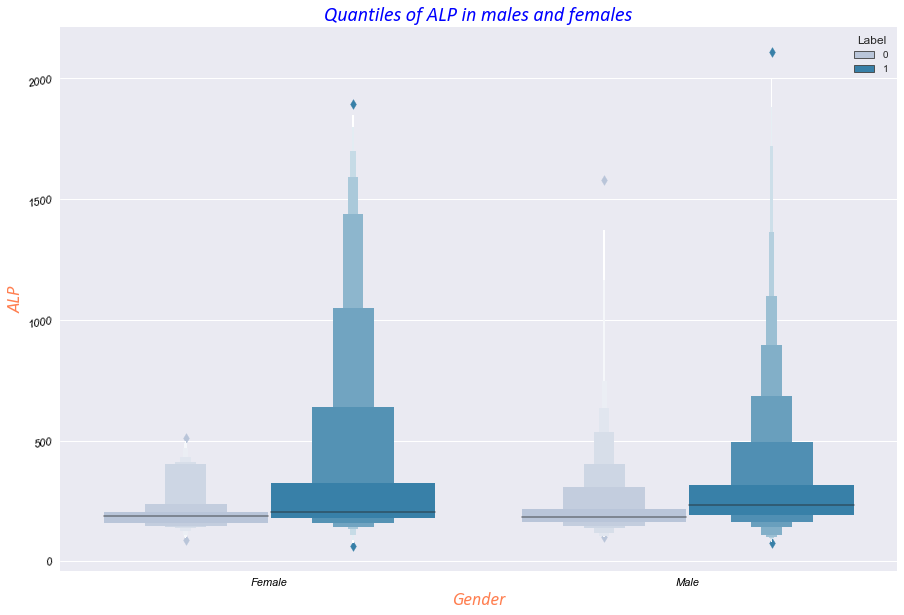

In [67]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.boxenplot(x='Gender',y='Alkaline_Phosphotase',hue='Label',data=patients_df,palette=sns.color_palette('PuBu',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('ALP',fontdict=label_font_dict)
    plt.title('Quantiles of ALP in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This does tells us that the value of ALP in +ve cases is substanially high.**

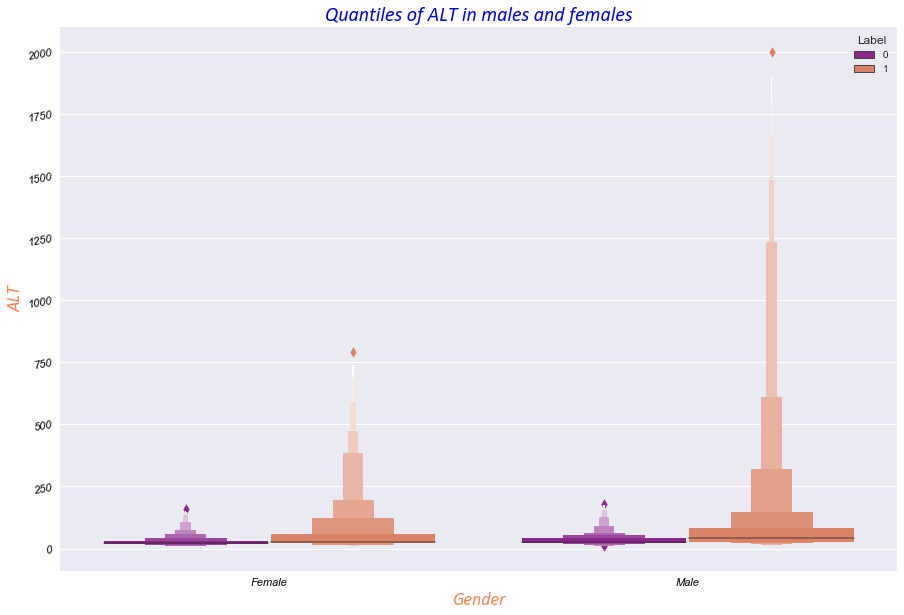

In [68]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.boxenplot(x='Gender',y='Alamine_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('plasma',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('ALT',fontdict=label_font_dict)
    plt.title('Quantiles of ALT in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This does tells us that the value of ALT in +ve cases is substanially high.**

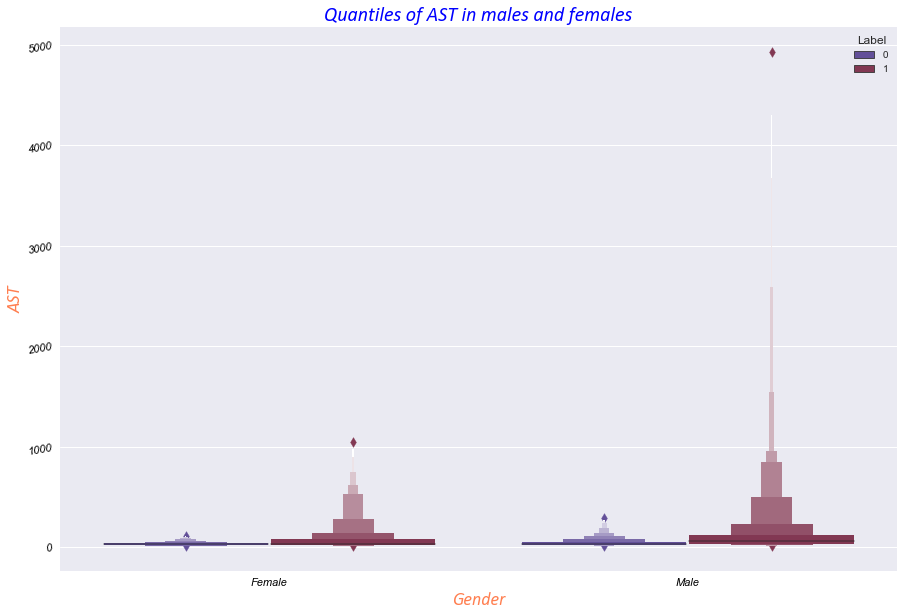

In [69]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.boxenplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('AST',fontdict=label_font_dict)
    plt.title('Quantiles of AST in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This does tells us that the value of AST in +ve cases is substanially high.**

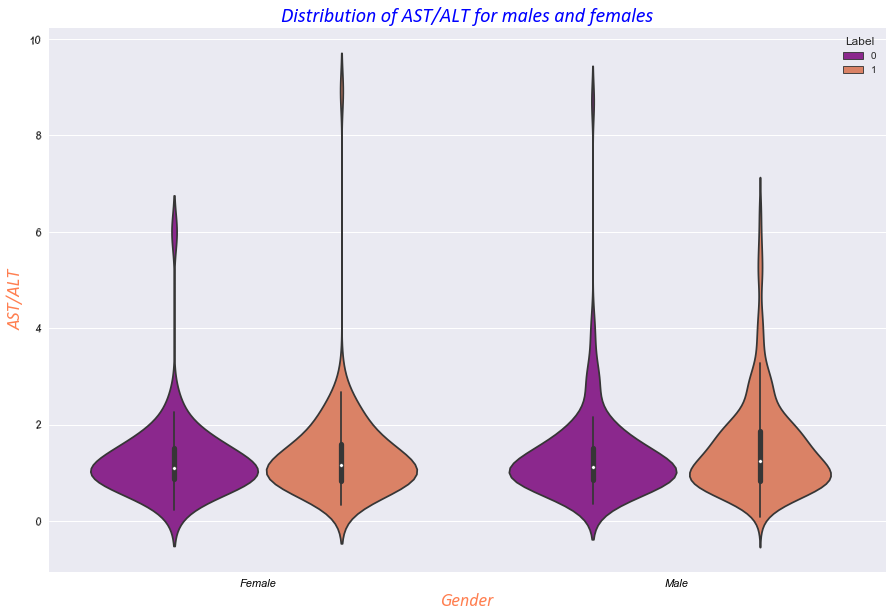

In [70]:
patients_df['AST_ALT_Ratio'] = np.divide(patients_df['Aspartate_Aminotransferase'],patients_df['Alamine_Aminotransferase'])

with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.violinplot(x='Gender',y='AST_ALT_Ratio',hue='Label',data=patients_df,palette=sns.color_palette('plasma',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('AST/ALT',fontdict=label_font_dict)
    plt.title('Distribution of AST/ALT for males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

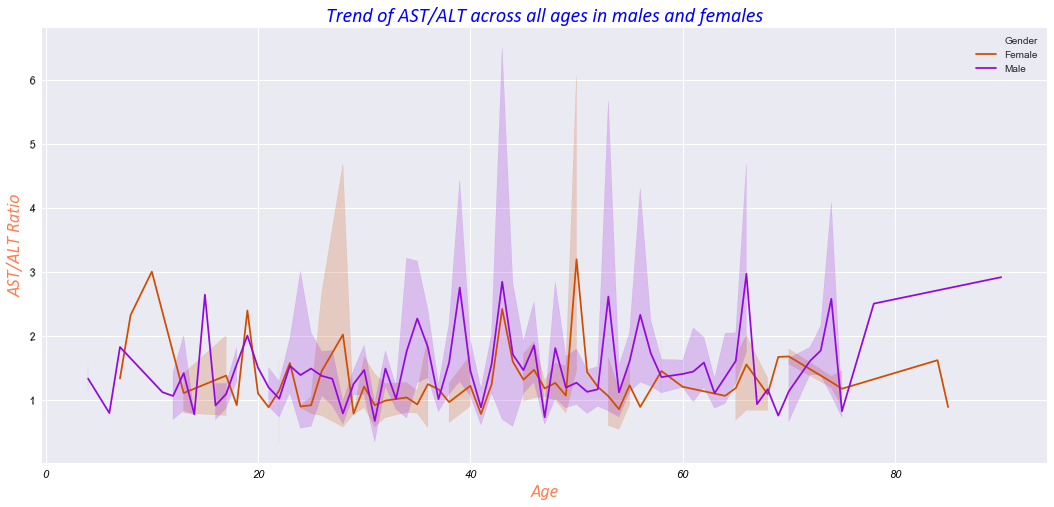

In [154]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,8))
    sns.lineplot(x='Age',y='AST_ALT_Ratio',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot_r',2),ci=95)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('AST/ALT Ratio',fontdict=label_font_dict)
    plt.title('Trend of AST/ALT across all ages in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 18``**
##### **``"Let's try to find some relationship among several variables"``**

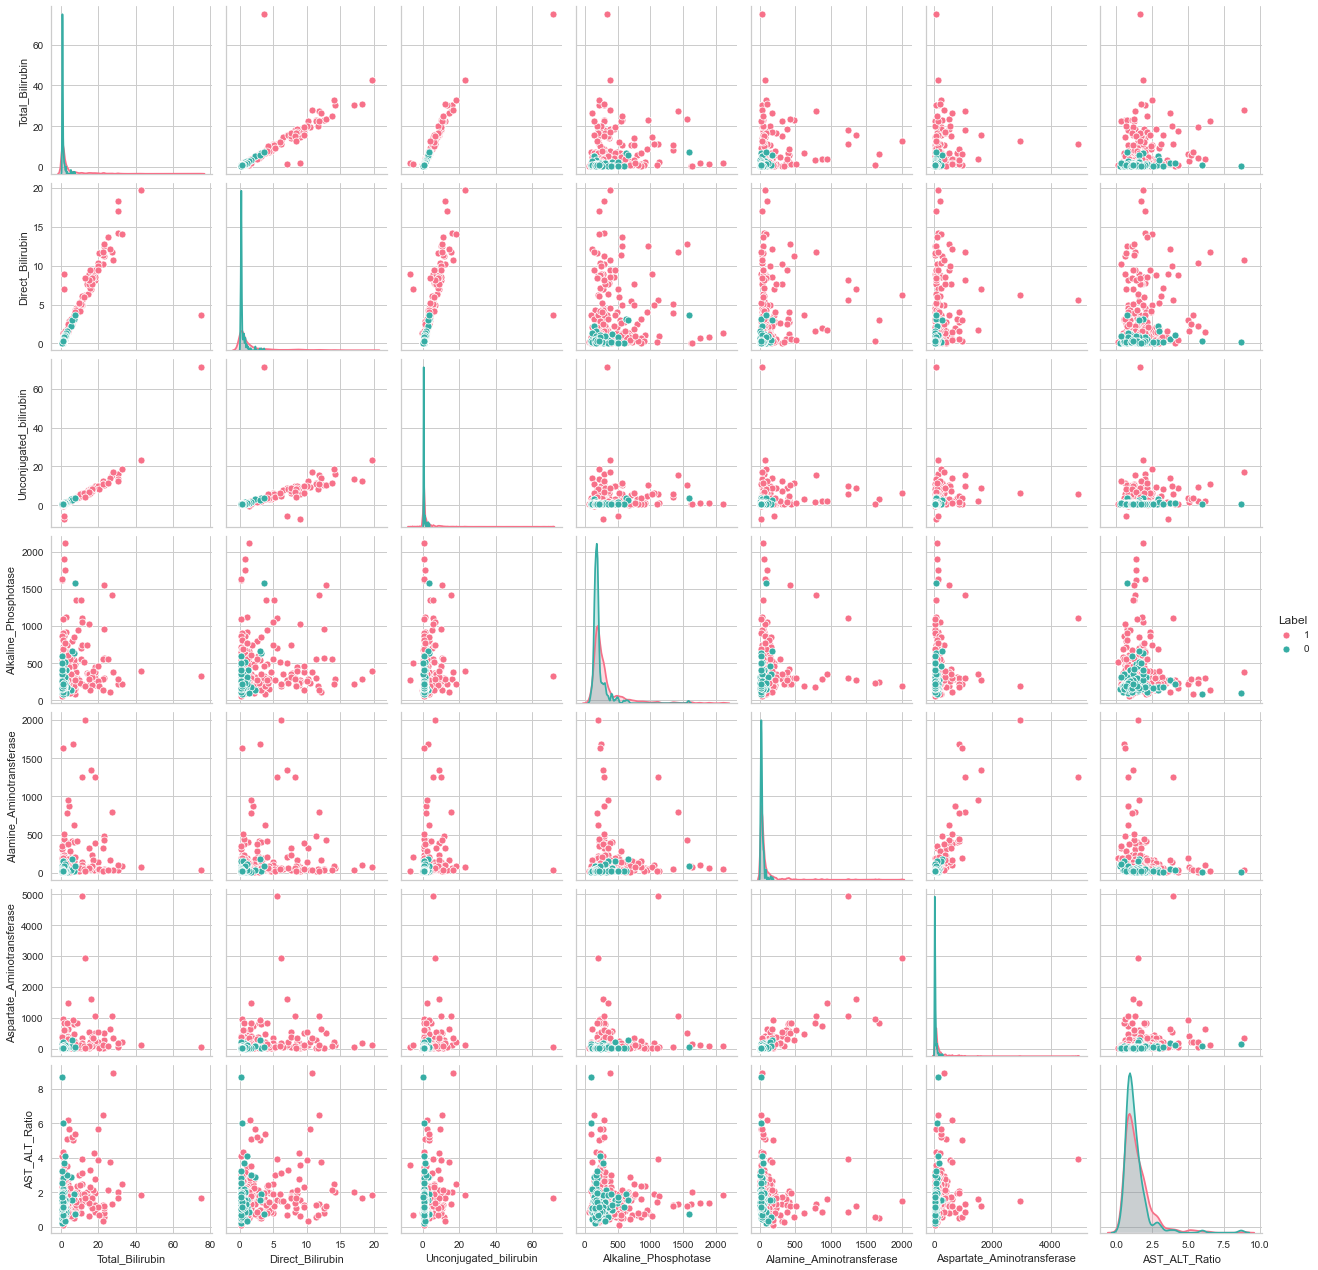

In [71]:
sns.pairplot(data=patients_df[['Total_Bilirubin','Direct_Bilirubin','Unconjugated_bilirubin',
                                           'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                                           'AST_ALT_Ratio','Label']],hue='Label',palette='husl',hue_order=[1,0])
plt.xticks(color='black',size=11,style='oblique')
plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

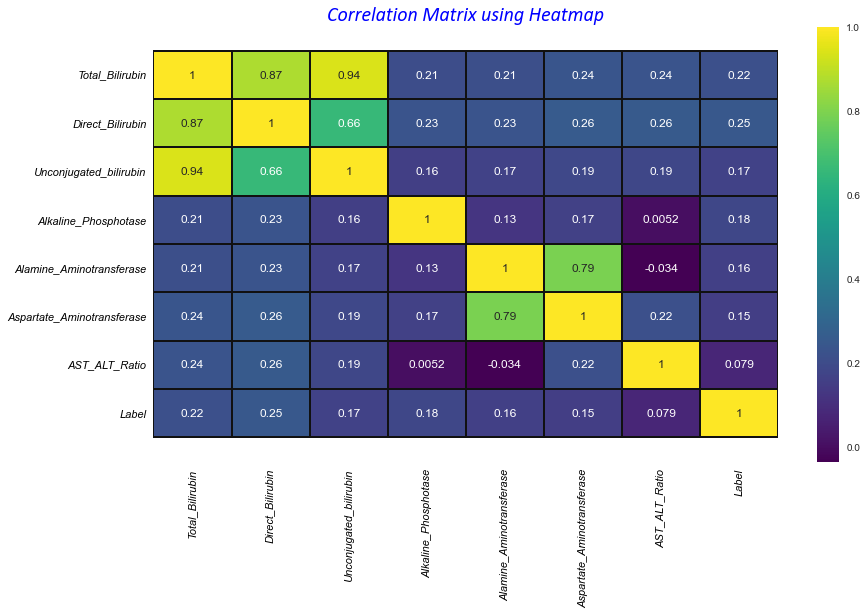

In [72]:
plt.figure(figsize=(14,8))
fig = sns.heatmap(patients_df[['Total_Bilirubin','Direct_Bilirubin','Unconjugated_bilirubin',
                                           'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                                           'AST_ALT_Ratio','Label']].corr(),annot=True,cmap='viridis',linecolor='k',linewidths=1)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix using Heatmap',fontdict=title_font_dict)
plt.xticks(color='black',size=11,style='oblique')
plt.yticks(rotation=0,color='black',size=11,style='oblique')
plt.show()

In [73]:
min_var_vals = patients_df.groupby(['Gender', 'Label']).agg(
    min_Tot_Bilirubin = ('Total_Bilirubin', min),
    min_Dir_Bilirubin = ('Direct_Bilirubin', min),
    min_InDir_Bilirubin = ('Unconjugated_bilirubin', min),
    min_ALP = ('Alkaline_Phosphotase', min),
    min_ALT = ('Alamine_Aminotransferase', min),
    min_AST = ('Aspartate_Aminotransferase', min),
    min_AST_ALT_Ratio = ('AST_ALT_Ratio',min))

min_var_vals

min_Tot_Bilirubin  min_Dir_Bilirubin  min_InDir_Bilirubin  \
Gender Label                                                              
Female 0                    0.5                0.1                  0.4   
       1                    0.5                0.1                 -0.4   
Male   0                    0.5                0.1                  0.4   
       1                    0.4                0.1                 -7.2   

              min_ALP  min_ALT  min_AST  min_AST_ALT_Ratio  
Gender Label                                                
Female 0           90       10       10           0.233333  
       1           63       12       11           0.320755  
Male   0          100       10       12           0.352941  
       1           75       12       11           0.089947

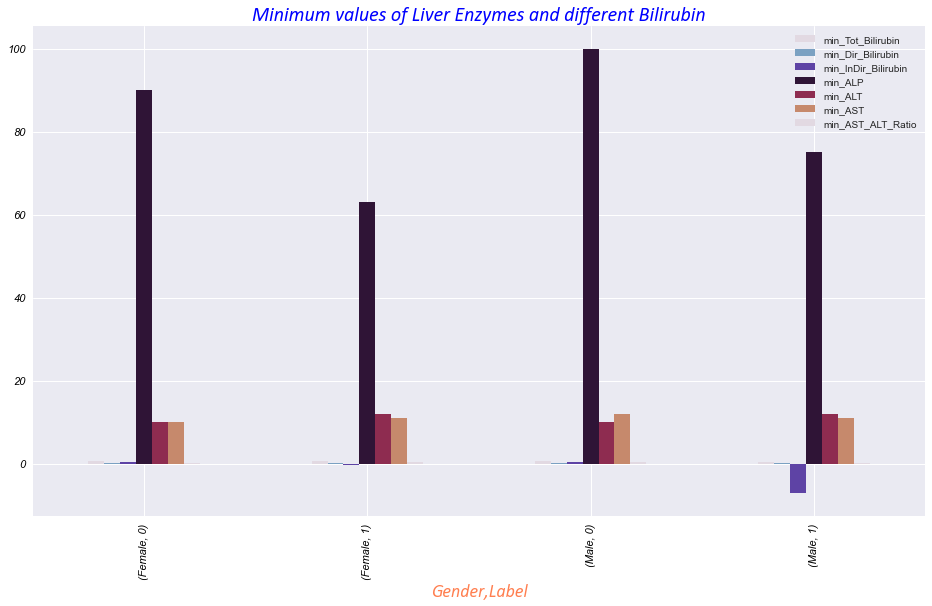

In [74]:
with plt.style.context('seaborn'):
    min_var_vals.plot(kind='bar',colormap='twilight',figsize=(16,9))
    plt.xlabel('Gender,Label',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Minimum values of Liver Enzymes and different Bilirubin',fontdict=title_font_dict)
plt.legend()
plt.show()

In [75]:
max_var_vals = patients_df.groupby(['Gender', 'Label']).agg(
    max_Tot_Bilirubin = ('Total_Bilirubin', max),
    max_Dir_Bilirubin = ('Direct_Bilirubin', max),
    max_InDir_Bilirubin = ('Unconjugated_bilirubin', max),
    max_ALP = ('Alkaline_Phosphotase', max),
    max_ALT = ('Alamine_Aminotransferase', max),
    max_AST = ('Aspartate_Aminotransferase', max),
    max_AST_ALT_Ratio = ('AST_ALT_Ratio',max))

max_var_vals

max_Tot_Bilirubin  max_Dir_Bilirubin  max_InDir_Bilirubin  \
Gender Label                                                              
Female 0                    2.6                1.2                  1.5   
       1                   27.7               12.8                 16.9   
Male   0                    7.3                3.6                  3.7   
       1                   75.0               19.7                 71.4   

              max_ALP  max_ALT  max_AST  max_AST_ALT_Ratio  
Gender Label                                                
Female 0          509      160      108           6.000000  
       1         1896      790     1050           8.923077  
Male   0         1580      181      285           8.705882  
       1         2110     2000     4929           6.500000

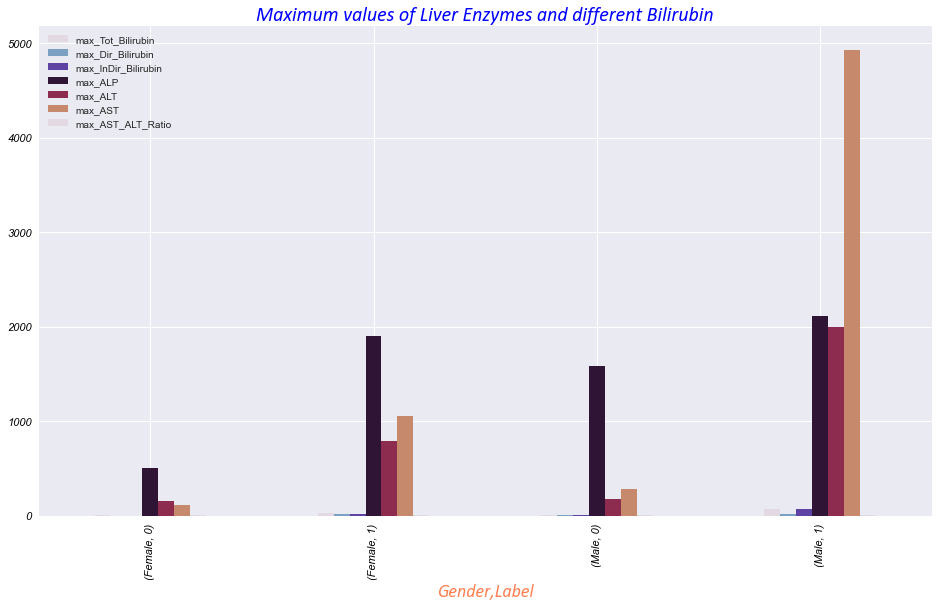

In [76]:
with plt.style.context('seaborn'):
    max_var_vals.plot(kind='bar',colormap='twilight',figsize=(16,9))
    plt.xlabel('Gender,Label',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Maximum values of Liver Enzymes and different Bilirubin',fontdict=title_font_dict)
plt.legend()
plt.show()

#### **``PLOT - 19``**
##### **``"Let's try to find some relationship among Total Protiens, Albumin and Albumin/Globulin(ratio)"``**

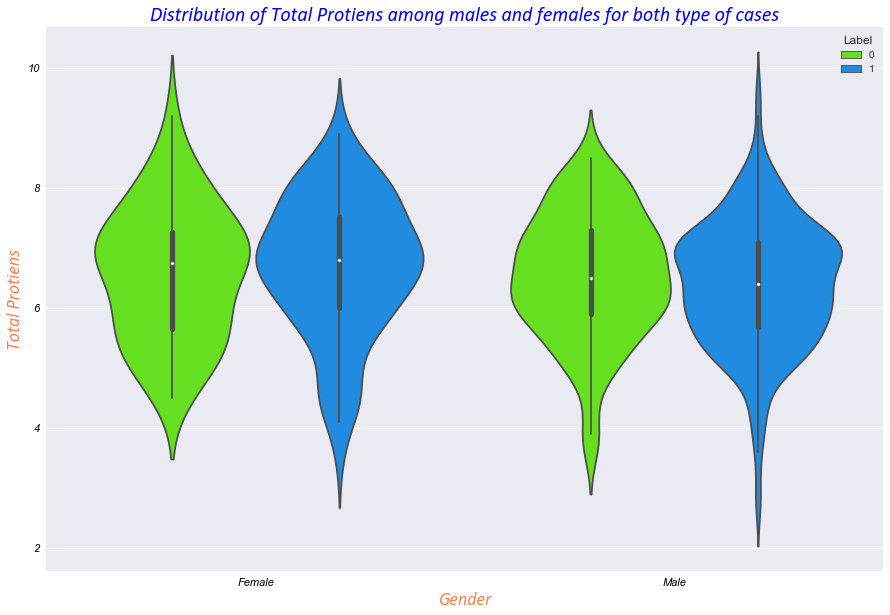

In [77]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.violinplot(x='Gender',hue='Label',y='Total_Protiens',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Protiens',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Distribution of Total Protiens among males and females for both type of cases',fontdict=title_font_dict)
plt.show()

##### **``Does Total Protiens decreases over the period of age??``**

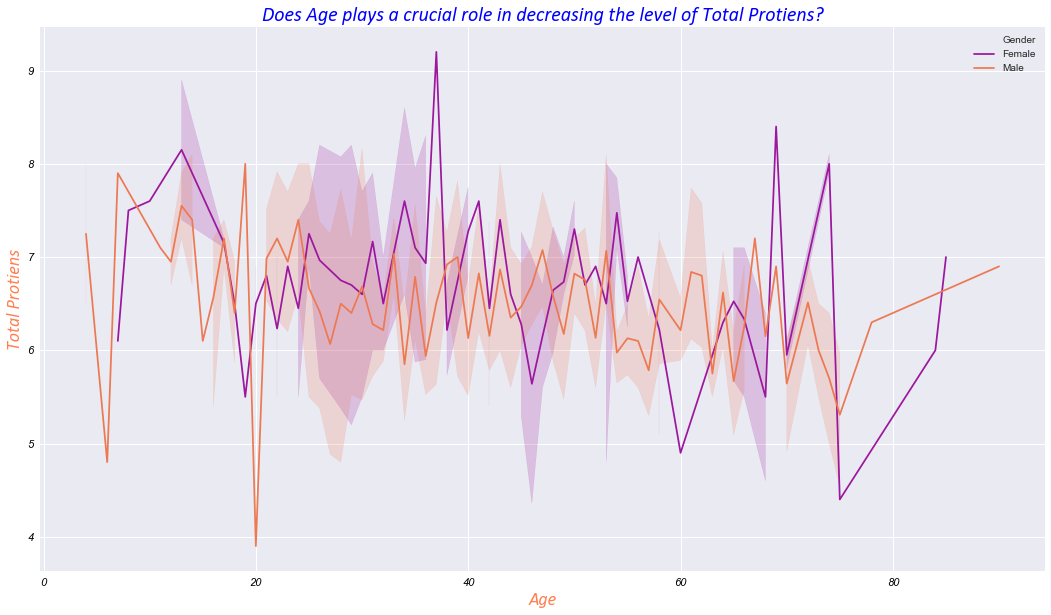

In [78]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.lineplot(x='Age',y='Total_Protiens',hue='Gender',data=patients_df,palette=sns.color_palette('plasma',2),ci=95)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Total Protiens',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Does Age plays a crucial role in decreasing the level of Total Protiens?',fontdict=title_font_dict)
plt.legend()
plt.show()

##### **Certainly, the answer is No.**
##### **``Let's check the effect of Albumin towards liver ailment``**

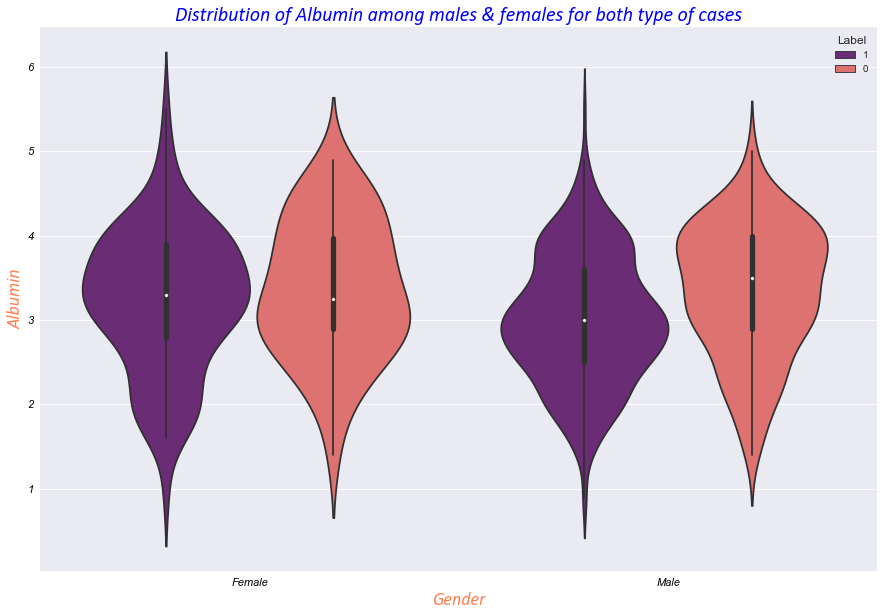

In [79]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.violinplot(x='Gender',hue='Label',y='Albumin',data=patients_df,palette=sns.color_palette('magma',2),hue_order=[1,0])
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Albumin',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Distribution of Albumin among males & females for both type of cases',fontdict=title_font_dict)
plt.show()

##### **``Does Albumin decreases over the period of age??``**

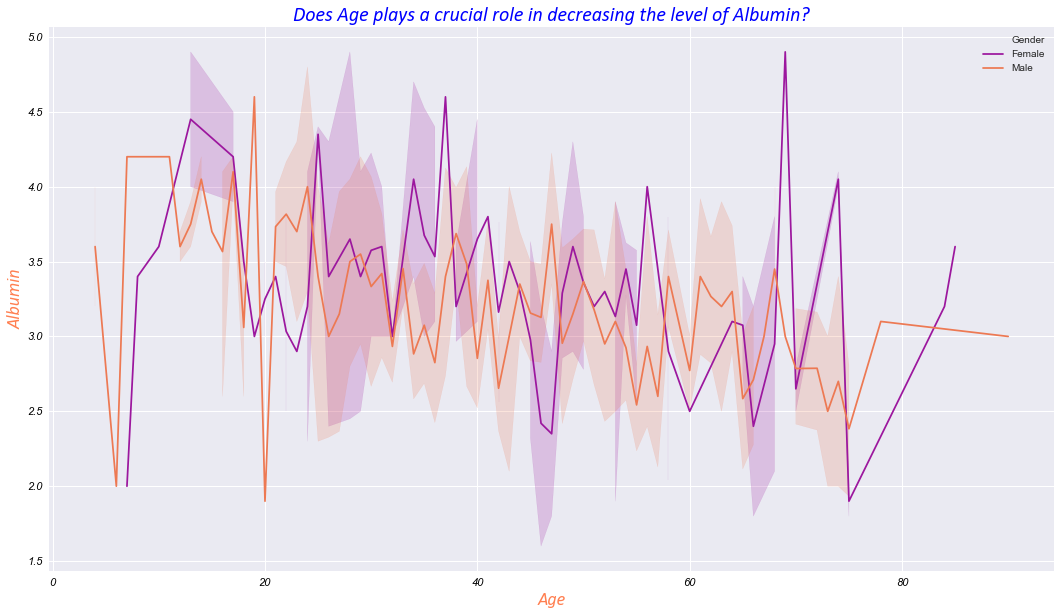

In [80]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.lineplot(x='Age',y='Albumin',hue='Gender',data=patients_df,palette=sns.color_palette('plasma',2),ci=95)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Albumin',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Does Age plays a crucial role in decreasing the level of Albumin?',fontdict=title_font_dict)
plt.legend()
plt.show()

##### **There is a slight downfall we can see in the Albumin levels as the age increases.**
##### **``Let's check the effect of A/G Ratio towards liver ailment``**

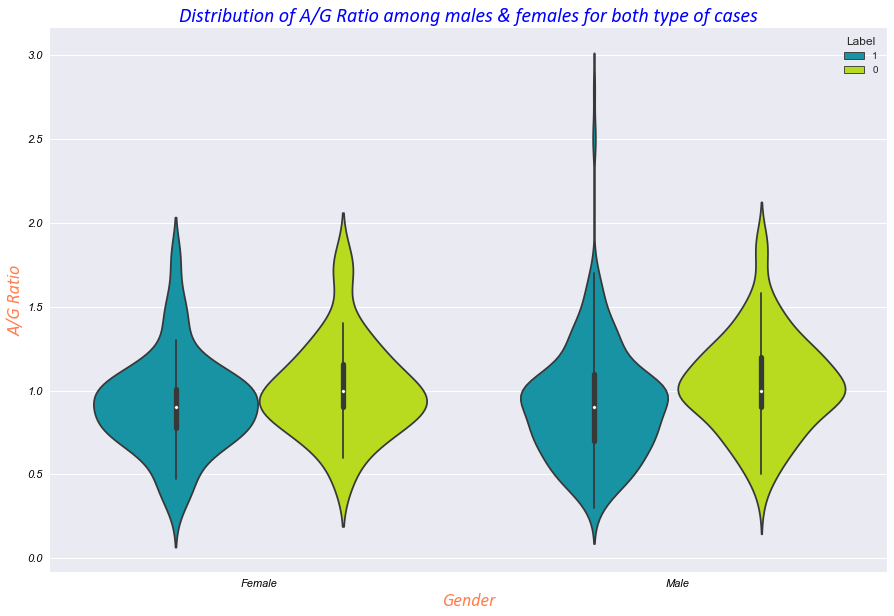

In [81]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.violinplot(x='Gender',hue='Label',y='Albumin_and_Globulin_Ratio',data=patients_df,palette=sns.color_palette('nipy_spectral',2),hue_order=[1,0])
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('A/G Ratio',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Distribution of A/G Ratio among males & females for both type of cases',fontdict=title_font_dict)
plt.show()

##### **``Let's check the effect of A/G Ratio towards liver ailment``**

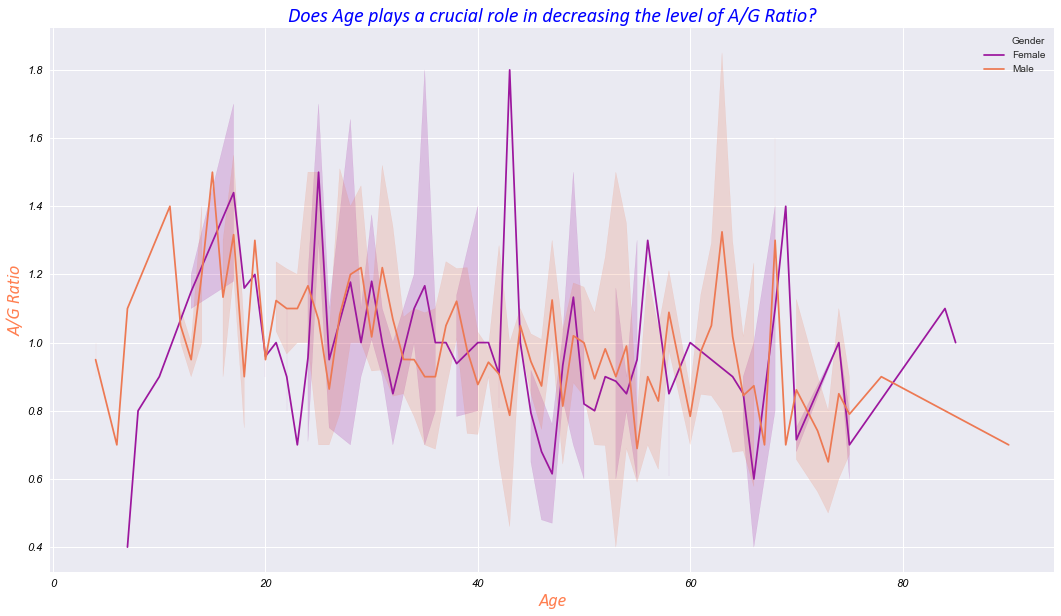

In [82]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.lineplot(x='Age',y='Albumin_and_Globulin_Ratio',hue='Gender',data=patients_df,palette=sns.color_palette('plasma',2),ci=95)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('A/G Ratio',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Does Age plays a crucial role in decreasing the level of A/G Ratio?',fontdict=title_font_dict)
plt.legend()
plt.show()

##### **Overall, we can say that there is downwards movement in the levels of A/G Ratio as the age increases. This can be due the decreasing value Albumin which brings the overall value of the ratio down.**

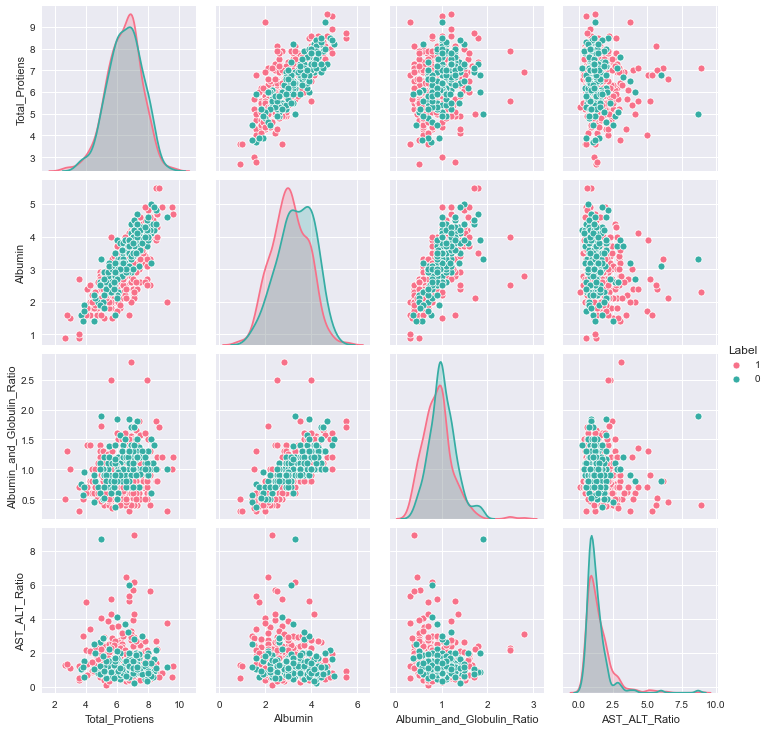

In [83]:
with plt.style.context('seaborn'):
    sns.pairplot(data=patients_df[['Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','AST_ALT_Ratio','Label']],hue='Label',palette='husl',hue_order=[1,0])
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **As, the previous violin plots have indicated we really cannot separate the +ve and -ve cases only by going with these 3 columns. Now, lets try to see their correlation values...**

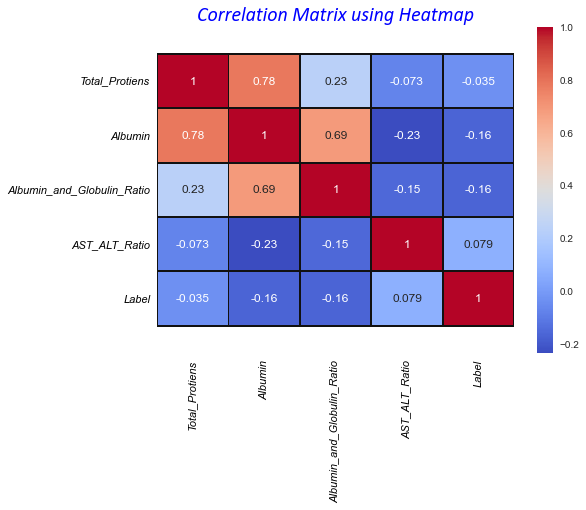

In [84]:
plt.figure(figsize=(8,6))
fig = sns.heatmap(patients_df[['Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','AST_ALT_Ratio','Label']].corr(),
                  annot=True,cmap='coolwarm',linecolor='k',linewidths=0.9)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix using Heatmap',fontdict=title_font_dict)
plt.xticks(rotation=90,color='black',size=11,style='oblique')
plt.yticks(rotation=0,color='black',size=11,style='oblique')
plt.show()

##### **Let's see the all features pair plot..**

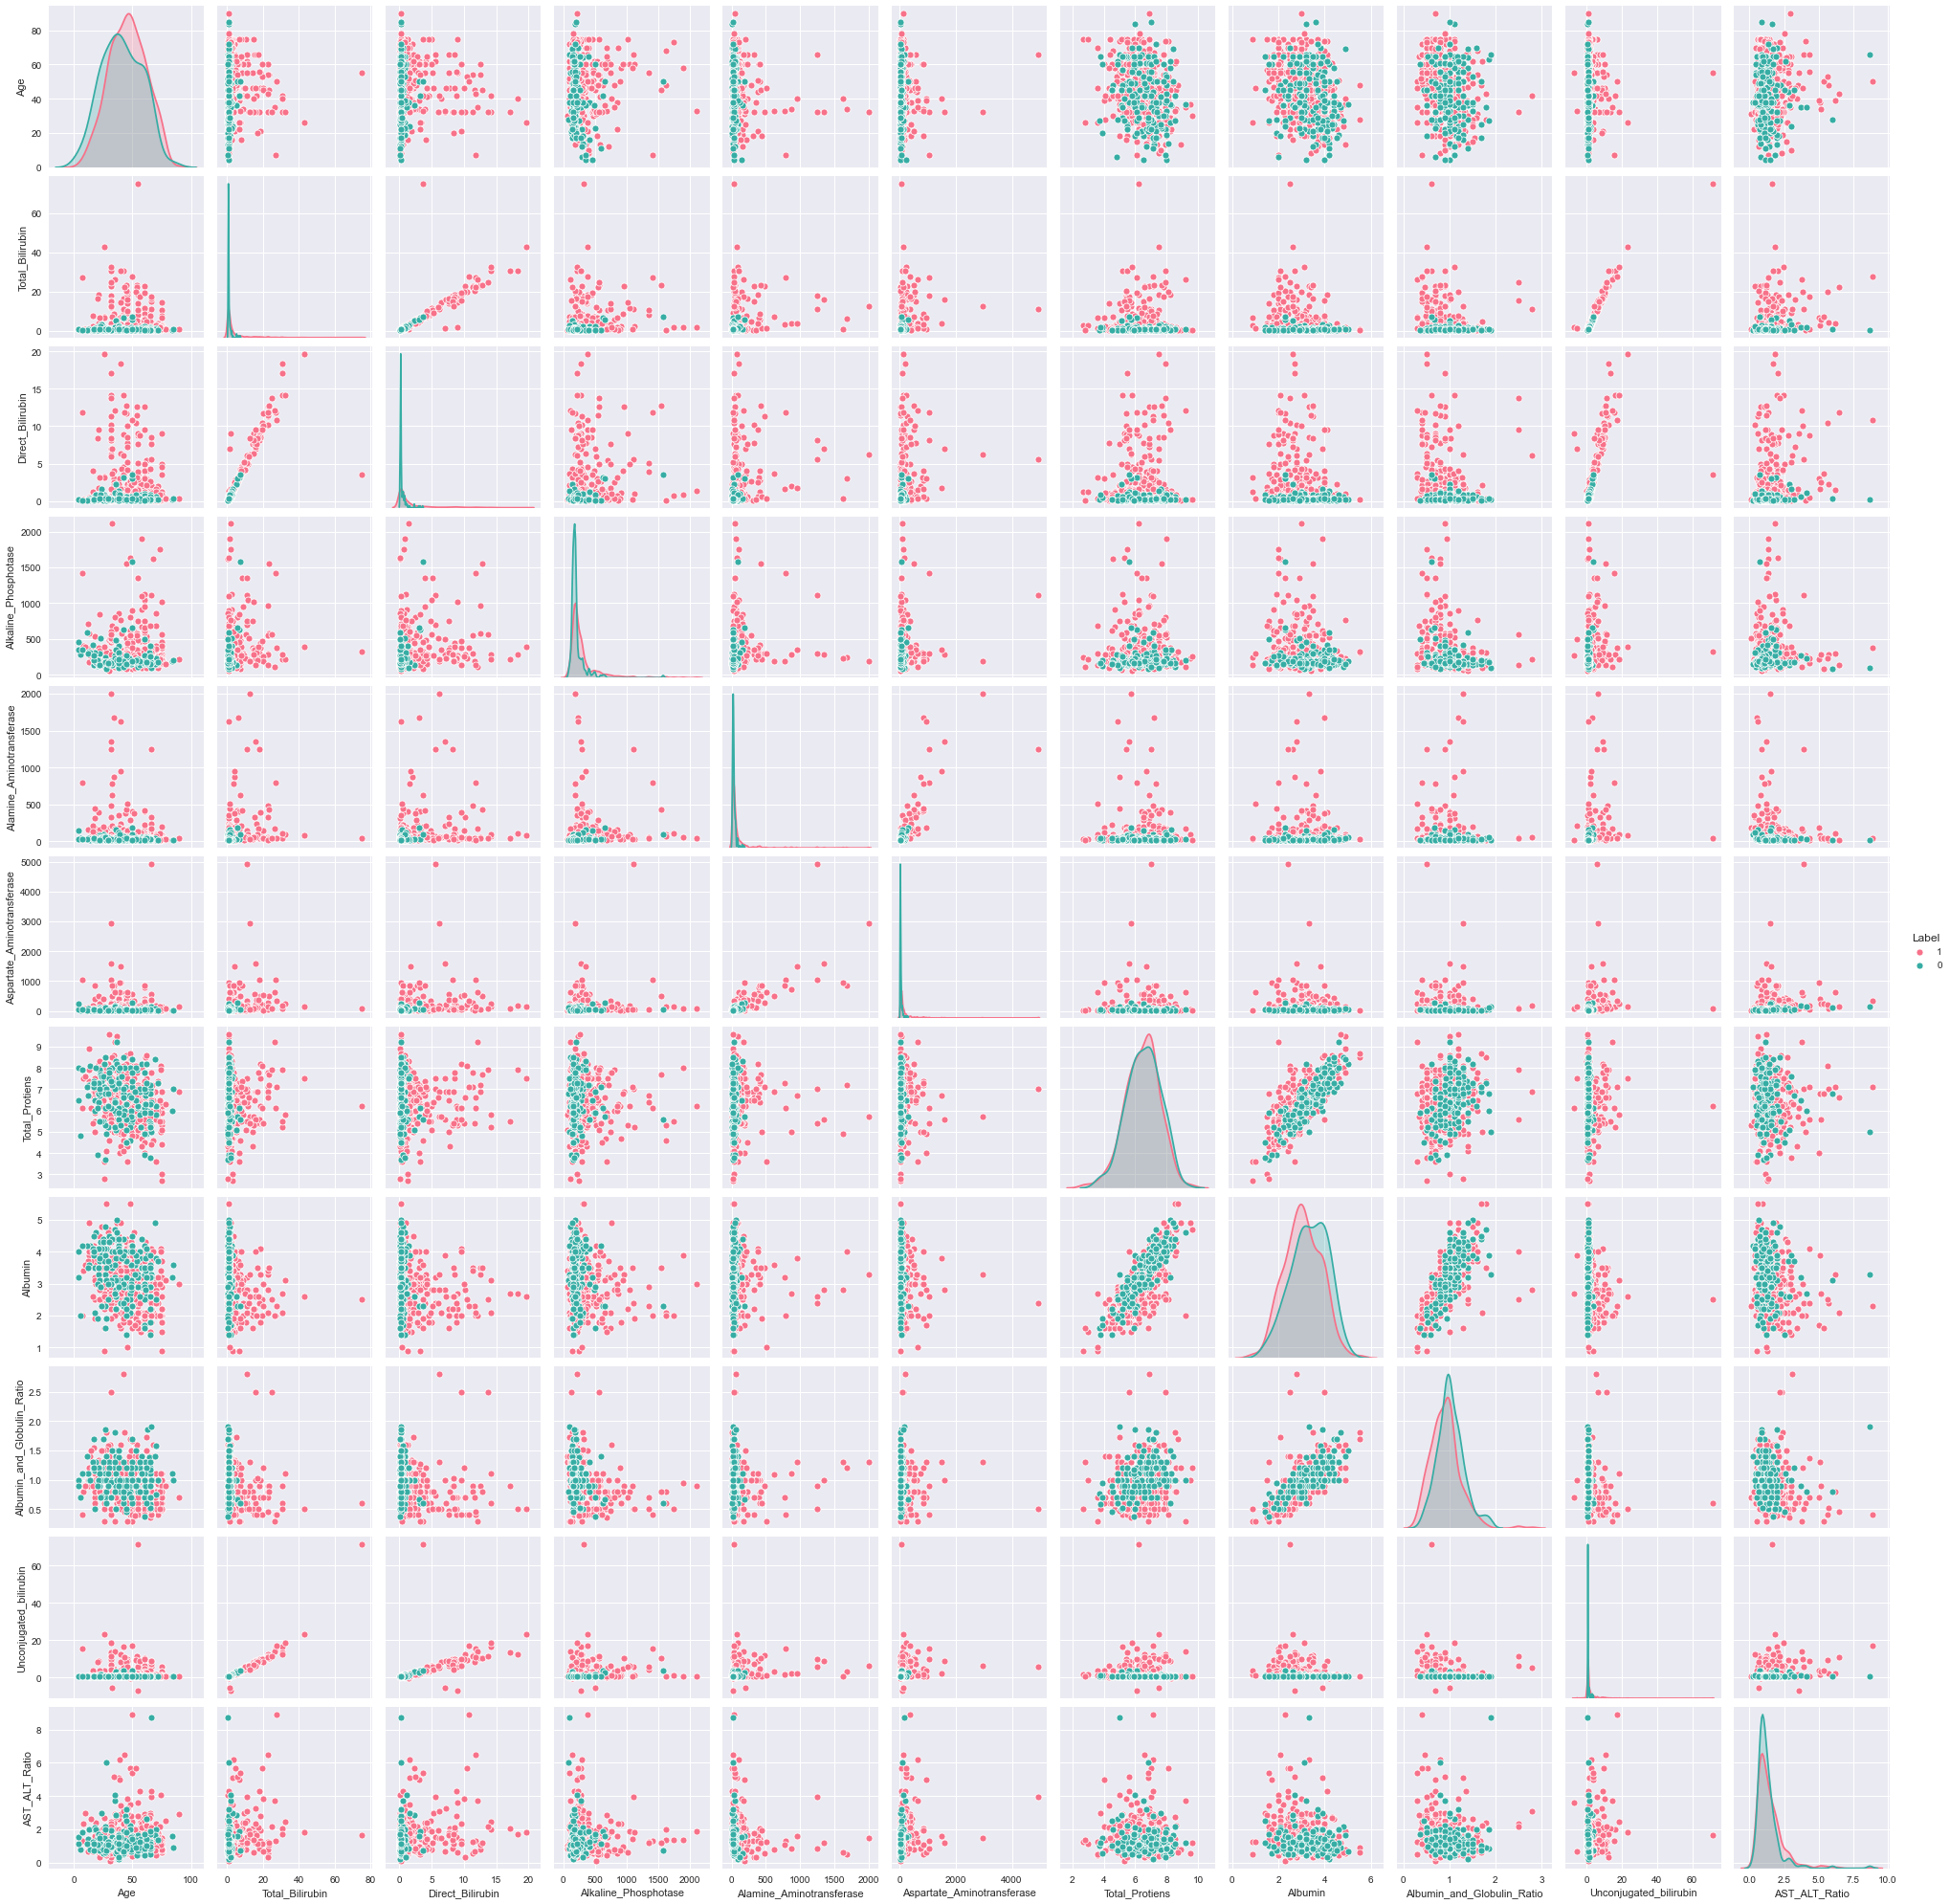

In [85]:
with plt.style.context('seaborn'):
    sns.pairplot(data=patients_df,hue='Label',palette='husl',hue_order=[1,0])
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **So, we really cannnot separate the +ve and -ve cases by forming a relationship among two features as most of the data points totally overlap each other. However, in some of the features as we found earlier linear progression exists.**

##### **Let's see the all features correlation matrix**

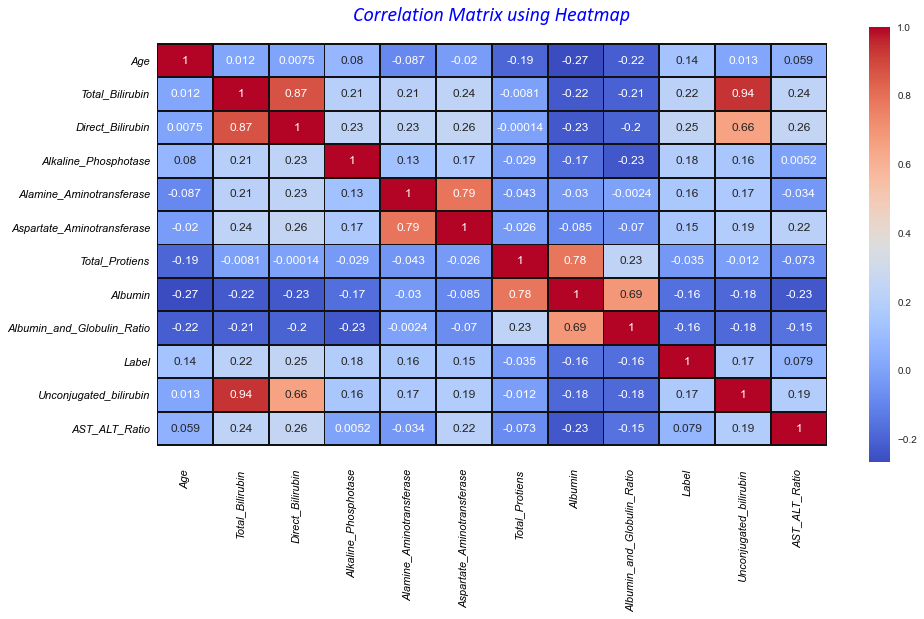

In [86]:
plt.figure(figsize=(15,8))
fig = sns.heatmap(patients_df.corr(),
                  annot=True,cmap='coolwarm',linecolor='k',linewidths=0.9)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix using Heatmap',fontdict=title_font_dict)
plt.xticks(rotation=90,color='black',size=11,style='oblique')
plt.yticks(rotation=0,color='black',size=11,style='oblique')
plt.show()

##### **Few things to point out here:**
 - ##### **Unconjugated or In-direct Bilirubin is highly correlated with Total and Direct Bilirubin. I just created this column to see whether it really influences the result and it is after all the substraction of Direct Bilirubin from Total. So, will drop this feature.**
 - ##### **Direct and Total Bilirubin are also highly correlated with each other. During EDA, we have also found that both are behaving in same manner at majority of the places. So, will see the evaluation metrics with both and w/o one of them.**
 - ##### **ALT and AST are also correlated with each other. During EDA, we have also found that both are behaving in same manner at majority of the places. And, I have already created a AST/ALT(ratio) feature. Hence, will remove these columns.**
 - ##### **Total Protiens and Albumin are correlated to each other, it is because 60% of total protiens occupied by albumin rest by Globulin. As we have the A/G Ratio feature so will go ahead and remove the Albumin column.**

#### **``Filling missing values in A/G Ratio``**

In [87]:
patients_df[patients_df['Albumin_and_Globulin_Ratio'].isna()]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Label  Unconjugated_bilirubin  \
209      3.9                         NaN      1                     0.6   
241      3.1                         NaN      1                     0.6   
253      2.7                         NaN      0                     0.4   
312      4.8                         NaN      0                     0.7   

     AST_ALT_Ratio  
209       1.434783  
241       1.916667  
253       1.250000  
312       2.160000

##### **Now, by multiple ways you can fill the missing values here, however, as I mentioned above:**

\begin{align}
\\ Total \ Protiens &= 0.60 \ (Albumin) + 0.40 \ (Globulin)
\end{align}

##### **Hence, calulate the values of A/G Ratio for these 4 records by using the Total_Protiens and Albumin features.**

In [88]:
patients_df['Albumin_and_Globulin_Ratio'] = pd.DataFrame(patients_df.apply(lambda val: val['Albumin_and_Globulin_Ratio'] if str(val['Albumin_and_Globulin_Ratio']).upper() != 'NAN' 
                                                                           else val['Albumin']/(val['Total_Protiens'] - val['Albumin']),axis=1))

patients_df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Label  Unconjugated_bilirubin  \
0      3.3                        0.90      1                     0.6   
1      3.2                        0.74      1                     5.4   
2      3.3                        0.89      1                     3.2   
3      3.4                        1.00      1                     0.6   
4      2.4                        0.40      1                     1.9   

   AST_ALT_Ratio  
0       1.125000  
1       1.562500  
2       1.133333  
3       1.428571  
4       2.185185

#### **``Upsampling of Minority Class``**

In [89]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

In [90]:
patients_df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Label  Unconjugated_bilirubin  \
0      3.3                        0.90      1                     0.6   
1      3.2                        0.74      1                     5.4   
2      3.3                        0.89      1                     3.2   
3      3.4                        1.00      1                     0.6   
4      2.4                        0.40      1                     1.9   

   AST_ALT_Ratio  
0       1.125000  
1       1.562500  
2       1.133333  
3       1.428571  
4       2.185185

In [91]:
patients_df['Label'].value_counts()

1    416
0    167
Name: Label, dtype: int64

In [92]:
patients_df_upsample = pd.concat([patients_df[patients_df['Label']==1],resample(patients_df[patients_df['Label'] == 0], n_samples=230, replace=True, random_state=44)],axis=0)
patients_df_upsample.reset_index(drop=True,inplace=True)
patients_df_upsample.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Label  Unconjugated_bilirubin  \
0      3.3                        0.90      1                     0.6   
1      3.2                        0.74      1                     5.4   
2      3.3                        0.89      1                     3.2   
3      3.4                        1.00      1                     0.6   
4      2.4                        0.40      1                     1.9   

   AST_ALT_Ratio  
0       1.125000  
1       1.562500  
2       1.133333  
3       1.428571  
4       2.185185

#### **``Inspecting some features one by one``**
##### **``Removing Outliers``**

In [160]:
def inspect_feature(df_obj,feature_name):
    """
    This function is created for plotting the histograms and box-plots.

    Parameters
    ----------
    df_obj : DataFrame
        Containing feature that needs to be inspected.
    feature_name : str
        Feature that you want to inspect
    scaler : str, optional
        DESCRIPTION. The default is 'ss'.

    Returns
    -------
    None.
    """
    with plt.style.context('seaborn'):
        df_obj[feature_name].plot(kind='hist')
        plt.title('Raw Data')
        plt.show()
        df_obj[feature_name].plot(kind='box')
        plt.title('Raw Data')
        plt.show()
        np.log1p(df_obj[feature_name]).plot(kind='hist')
        plt.title('Log1p Data')
        plt.show()
        np.log1p(df_obj[feature_name]).plot(kind='box')
        plt.title('Log1p Data')
        plt.show()
        pd.DataFrame(fix_outliers(df_obj,feature_name)).plot(kind='hist')
        plt.title('Outliers fixed')
        plt.show()
        pd.DataFrame(fix_outliers(df_obj,feature_name)).plot(kind='box')
        plt.title('Outliers fixed')
        plt.show()
        
def val_iqr_limits(df_name,col_name,w_width=None):
    """
    Description: This function is created for calculating the upper and lower limits using Tuky's IQR method.
    
    Input parameters: It accepts below two input parameters:
        1. df_name: DataFrame
        2. col_name: Feature name
        3. w_width: Whisker width provided by user and by default 1.5 
        
    Return: It returns the median, upper and lower limits of the feature based on Tuky's IQR method.
    """
    if w_width == None:
        w_width = 1.5
    else:
        w_width = w_width
        
    val_median = df_name[col_name].median()
    q1 = df_name[col_name].quantile(0.25)
    q3 = df_name[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (w_width*iqr)
    upper_limit = q3 + (w_width*iqr)
#     print(val_median,q1,q3,iqr,lower_limit,upper_limit)     ## Uncomment if you want to see the values of median, q1, q2, iqr, lower and upper limit 
    return val_median, upper_limit, lower_limit

def fix_outliers(df_name,col_name,whis_width=None):
    """
    Description: This function is created for applyng the Tuky's IQR method on variable.
    
    Input parameters: It accepts the below two parameters:
        1. df_name: DataFrame
        2. col_name: Feature name
        3. whis_width: Whisker width provided by user and by default 1.5 
    
    Return: It returns the modified feature with the removed outliers.
    """
    print("######## Applied Tuky IQR Method-I ########")
    v_median, upr_limit , low_limit = val_iqr_limits(df_name,col_name,whis_width)
#     df_name[col_name] = df_name[col_name].apply(lambda val: low_limit + (val-upr_limit) if val > upr_limit else upr_limit - (low_limit-val) if val < low_limit else val)
    df_name[col_name] = df_name[col_name].apply(lambda val: np.log1p(upr_limit) if val > upr_limit else np.sqrt(np.square(low_limit)) if val < low_limit else val)

    print("######## Applied Tuky IQR Method-II ########\n")
    v1_median, upr_limit1, low_limit1 = val_iqr_limits(df_name,col_name,whis_width)
    
#     df_name[col_name] = df_name[col_name].apply(lambda val: upr_limit1 if val > upr_limit1 else low_limit1 if val < low_limit1 else val)
#     df_name[col_name] = df_name[col_name].apply(lambda val: low_limit1 + (val-upr_limit1) if val > upr_limit1 else upr_limit1 - (low_limit1-val) if val < low_limit1 else val)
    df_name[col_name] = df_name[col_name].apply(lambda val: np.log1p(upr_limit1) if val > upr_limit1 else np.sqrt(np.square(low_limit1)) if val < low_limit1 else val)
    return df_name[col_name]

def plot_data(df_name):
    """
    This function is plotting the box plot of the dataframe.

    Parameters
    ----------
    df_name : DataFrame
        Plots the box plot and heatmap plots.

    Returns
    -------
    None.

    """
    with plt.style.context('seaborn'):
        plt.figure(figsize=(18,8))
        sns.boxplot(data=df_name.iloc[:,:])
        plt.title("Box-Plot Post Outliers Removal",fontdict={'size':12,'color':'blue','style':'oblique','family':'calibri'})
        plt.xticks(size=12,rotation=90,style='oblique',color='coral')
    plt.show()
    
    with plt.style.context('seaborn'):
        plt.figure(figsize=(16,8))
        sns.heatmap(df_name.corr(),cmap='coolwarm',annot=True,cbar=True,linecolor='k',linewidths=0.9)
        plt.title("Heatmap Post Outliers Removal",fontdict={'size':12,'color':'blue','style':'oblique','family':'calibri'})
        plt.xticks(size=12,rotation=90,style='oblique',color='coral')
    plt.show()

##### **``1. Age``**

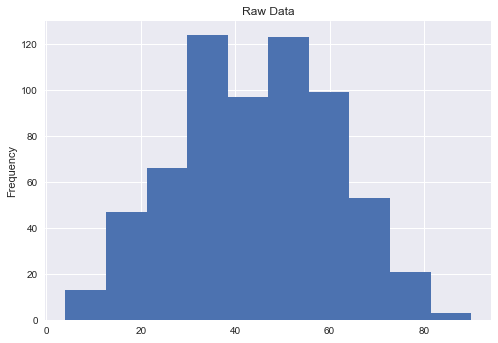

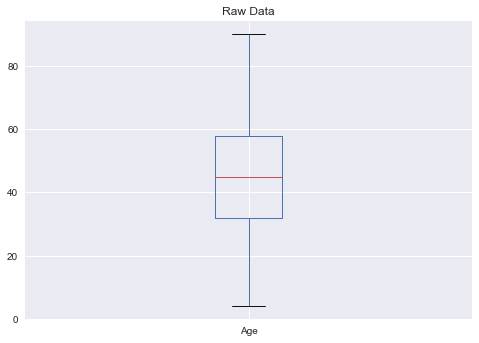

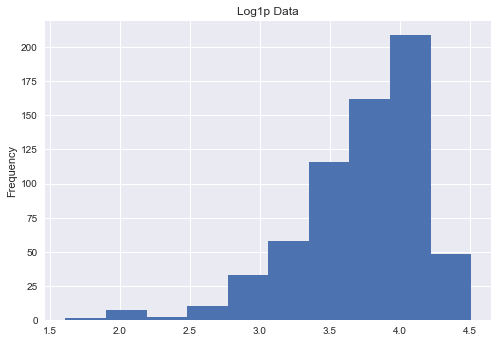

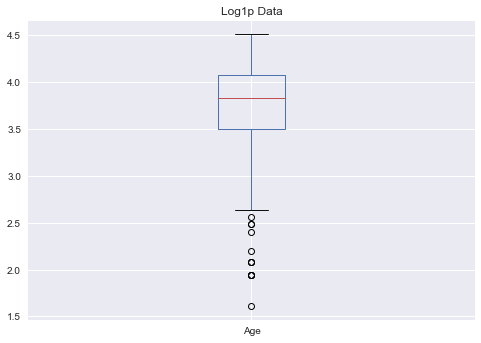

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



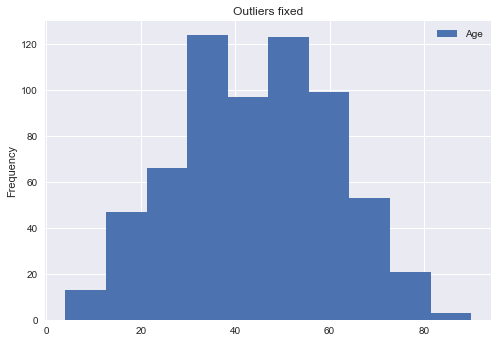

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



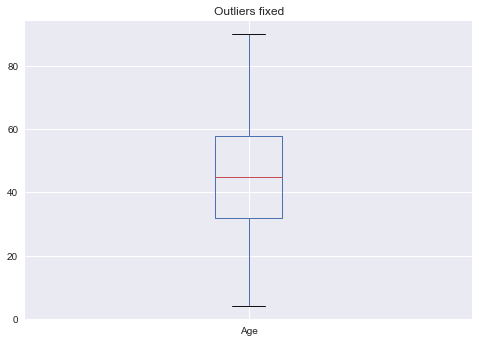

In [94]:
inspect_feature(patients_df_upsample,'Age')

##### **Age is normally distributed no need of any other transformation.**

##### **``2. Total_Bilirubin``**

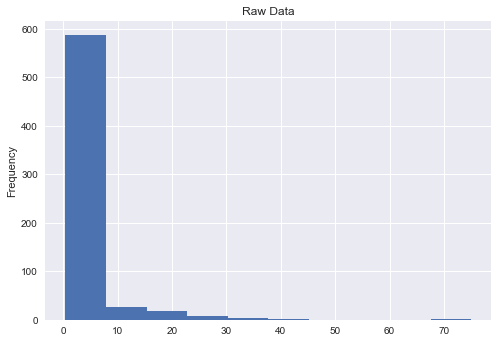

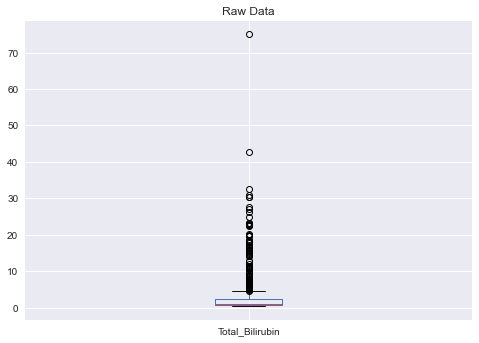

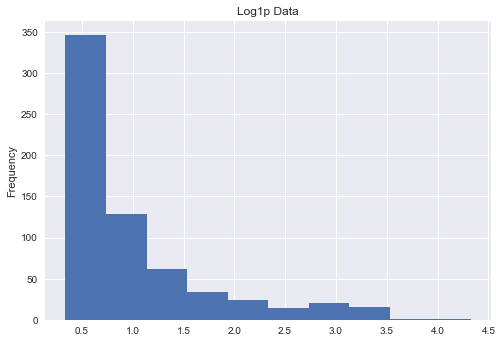

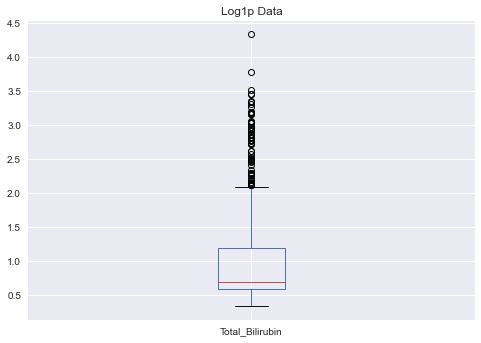

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



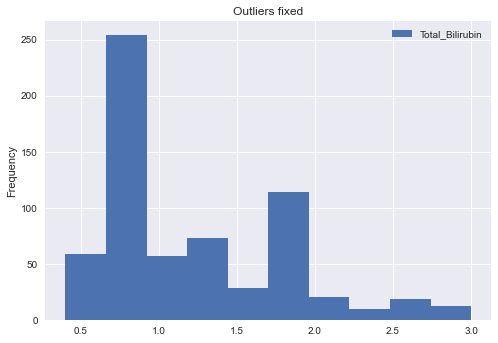

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



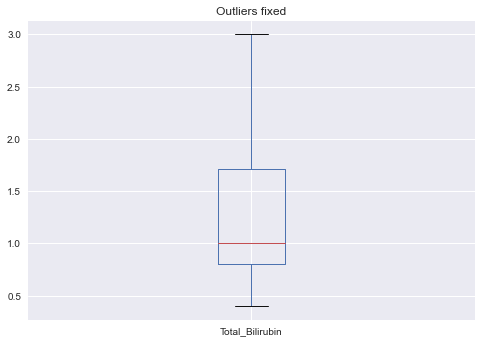

In [95]:
inspect_feature(patients_df_upsample,'Total_Bilirubin')

##### **Outliers are removed only left with Scaling.**

##### **``3. Direct Bilirubin``**

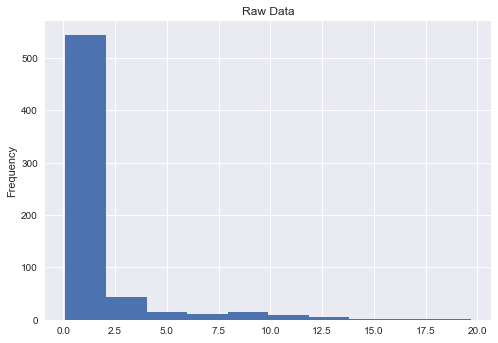

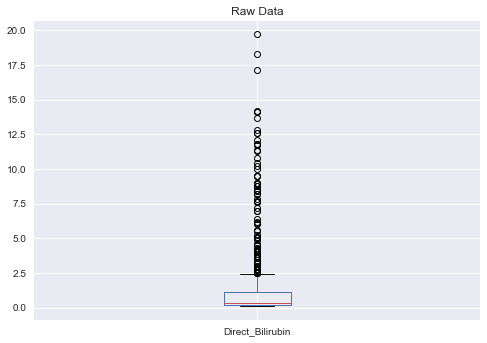

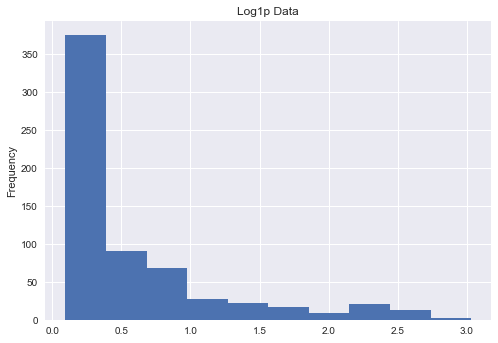

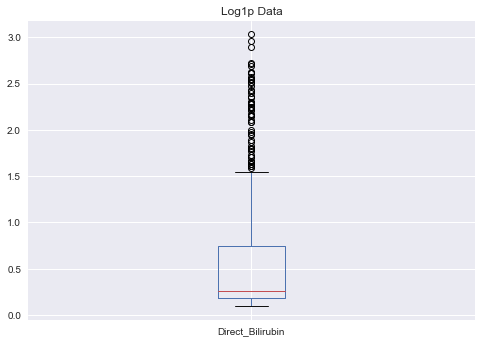

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



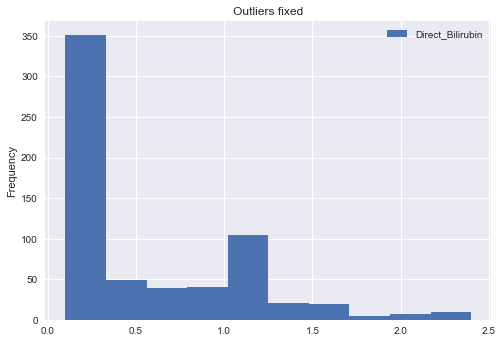

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



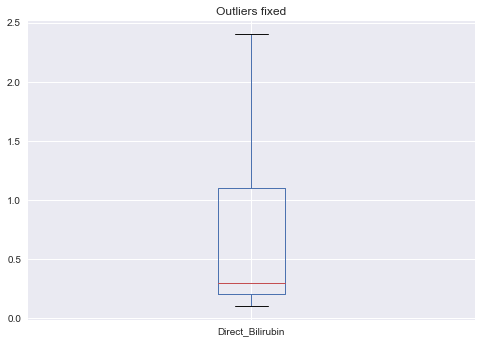

In [96]:
inspect_feature(patients_df_upsample,'Direct_Bilirubin')

##### **Outliers are removed only left with Scaling.**

##### **``4. Unconjugated Bilirubin``**

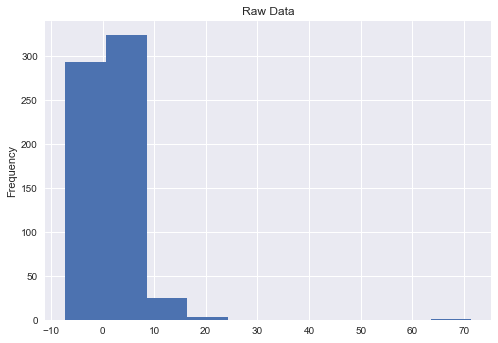

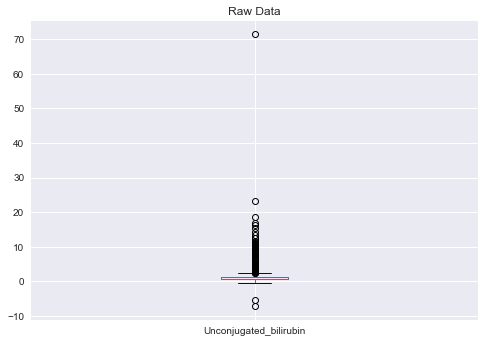

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


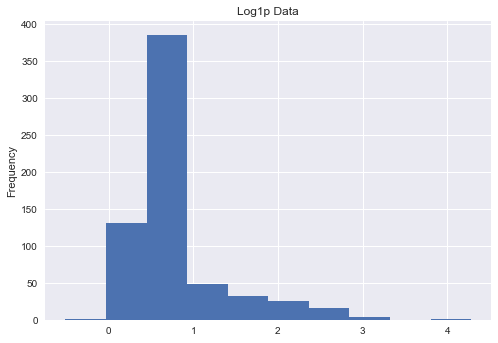

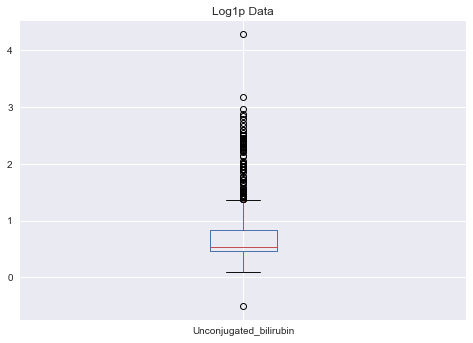

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



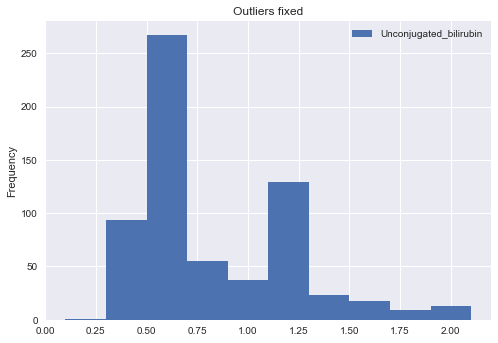

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



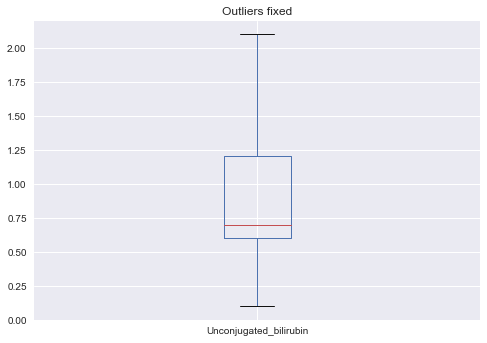

In [97]:
inspect_feature(patients_df_upsample,'Unconjugated_bilirubin')

##### **Outliers are removed only left with Scaling.**

##### **``5. Alamine_Aminotransferase(ALT)``**

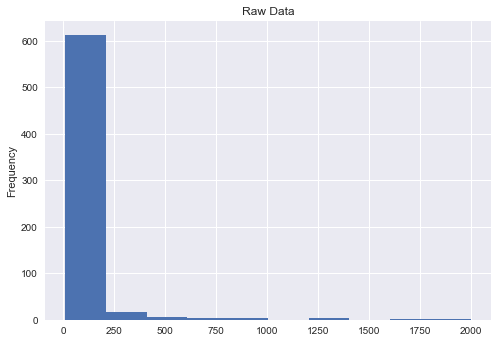

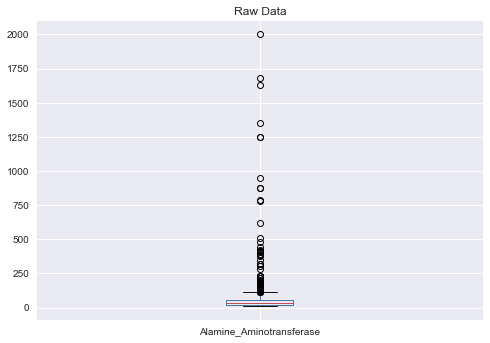

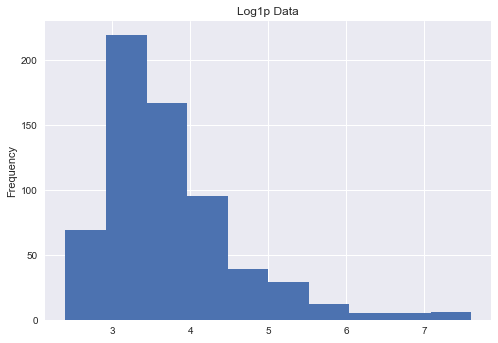

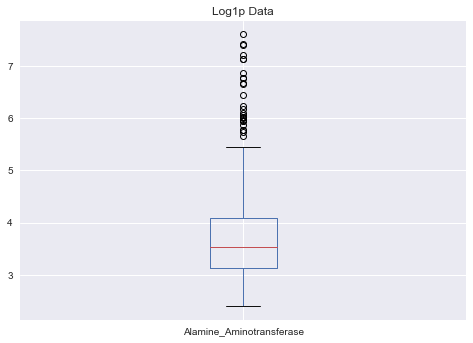

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



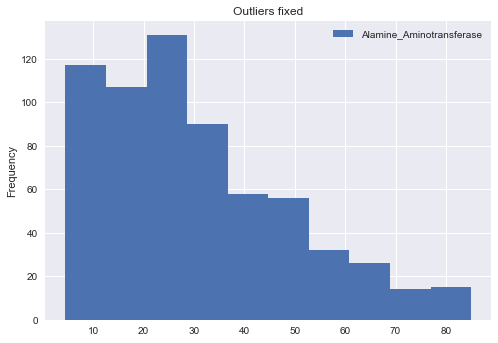

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



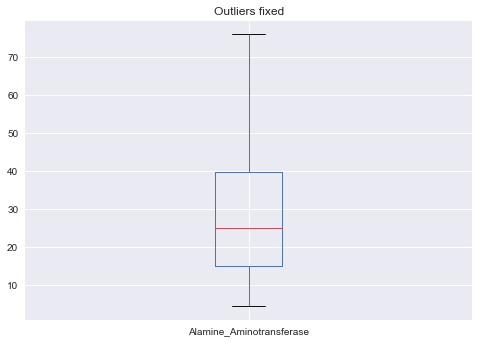

In [98]:
inspect_feature(patients_df_upsample,'Alamine_Aminotransferase')

##### **Outliers are removed only left with Scaling.**

##### **``6. Aspartate_Aminotransferase(AST)``**

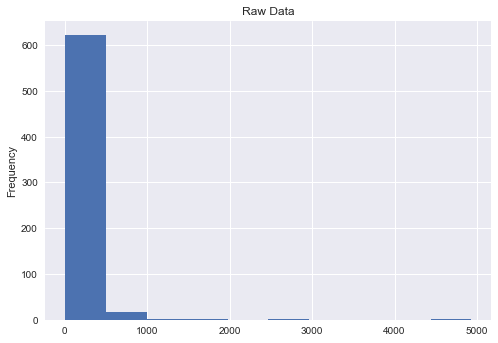

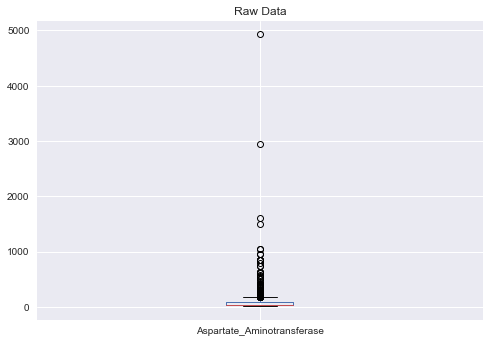

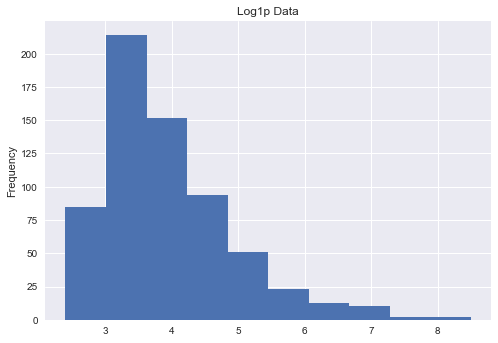

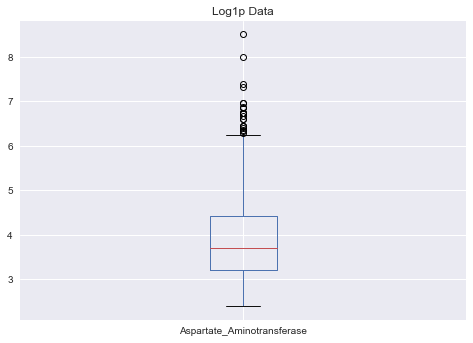

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



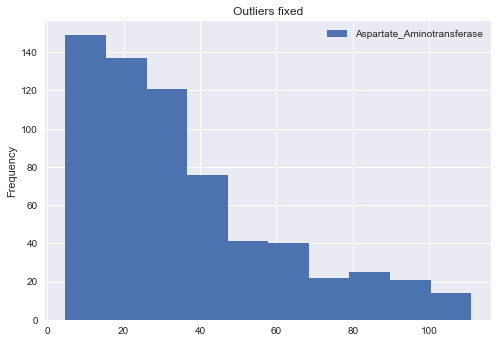

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



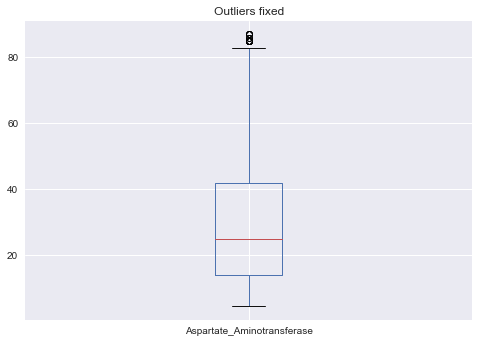

In [99]:
inspect_feature(patients_df_upsample,'Aspartate_Aminotransferase')

##### **Majority of the Outliers are removed only left with Scaling.**

##### **``7. AST_ALT_Ratio``**

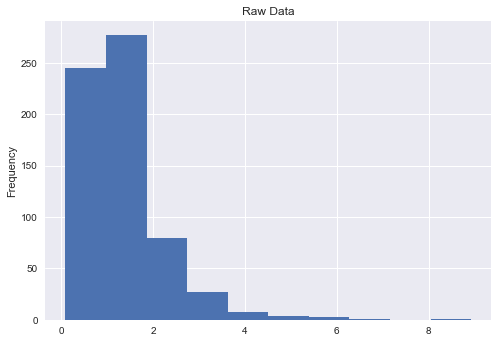

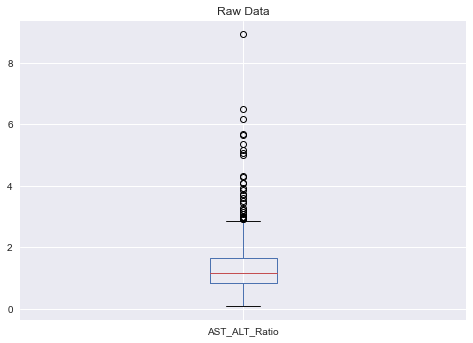

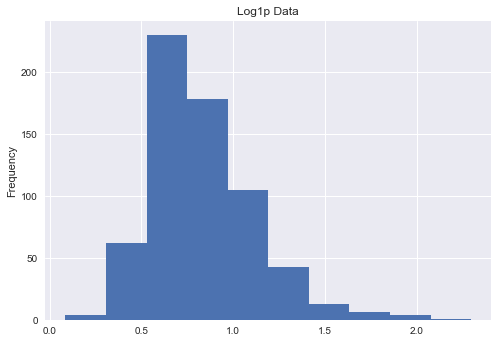

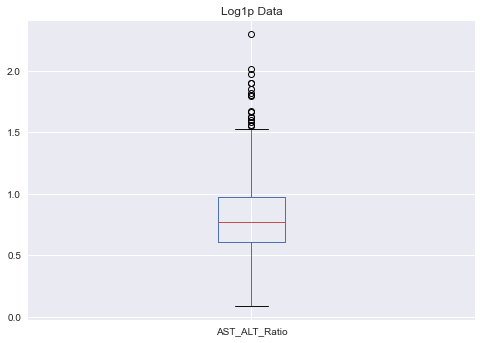

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



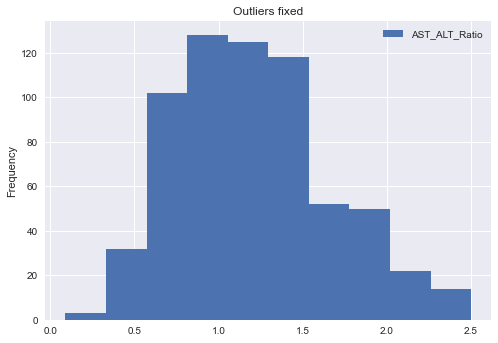

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



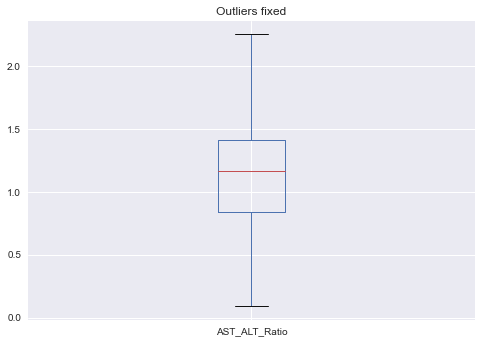

In [100]:
inspect_feature(patients_df_upsample,'AST_ALT_Ratio')

##### **Outliers are removed only left with Scaling.**

##### **``8. Alkaline_Phosphotase(ALP)``**

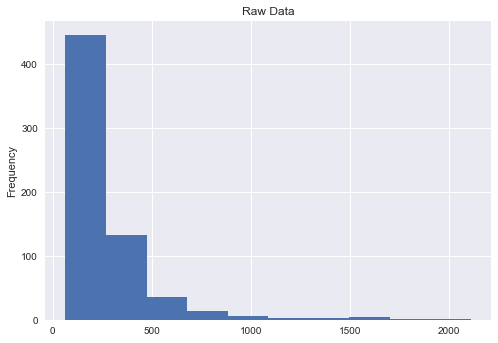

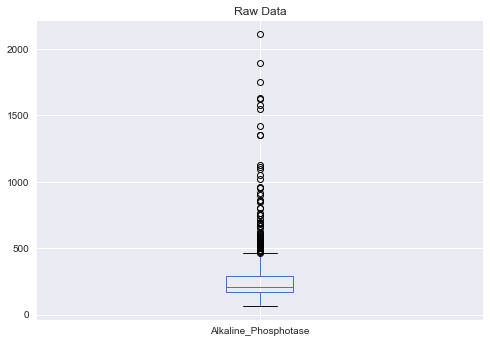

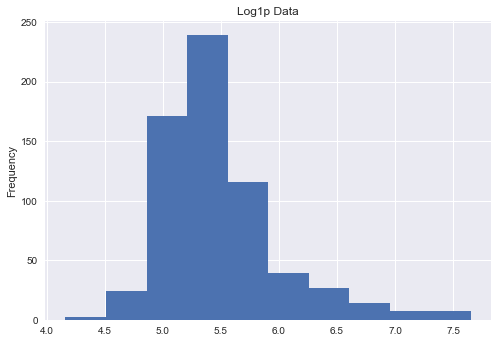

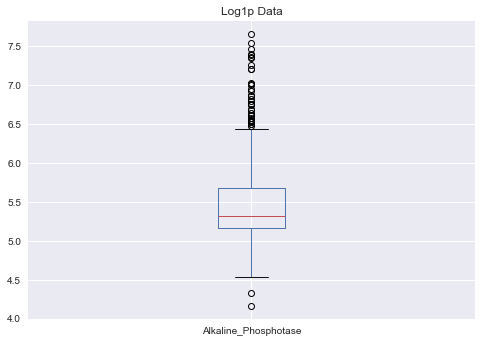

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



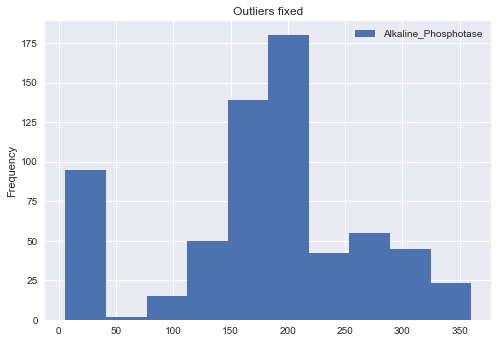

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



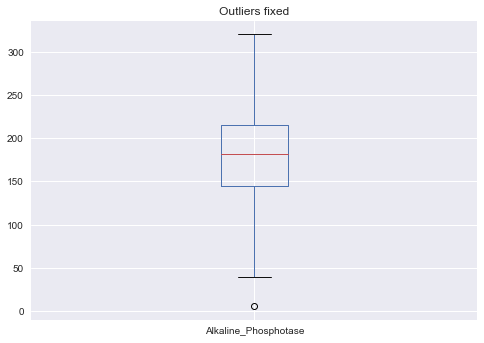

In [101]:
inspect_feature(patients_df_upsample,'Alkaline_Phosphotase')

##### **Majority of the Outliers are removed only left with Scaling.**

##### **``9. Total_Protiens``**

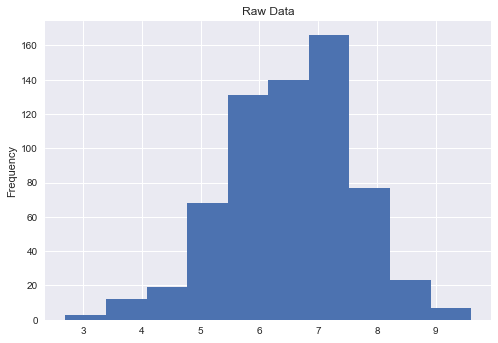

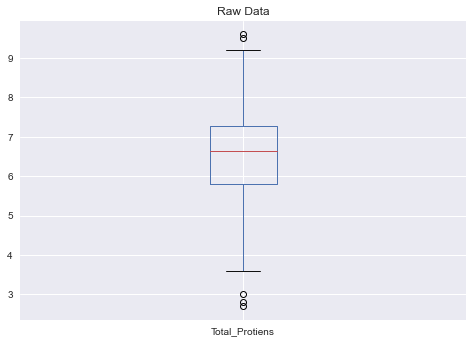

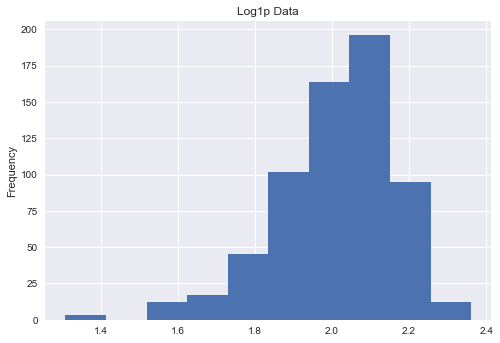

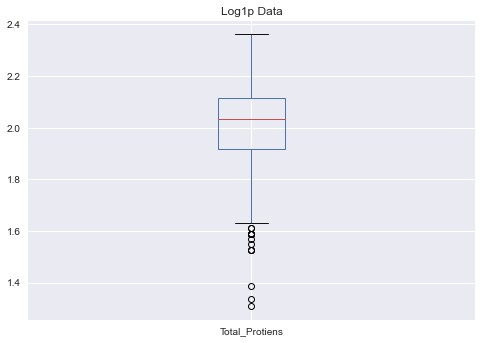

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



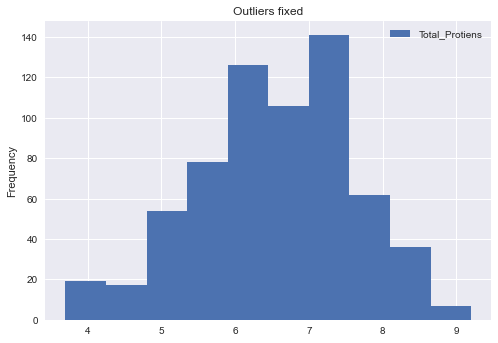

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



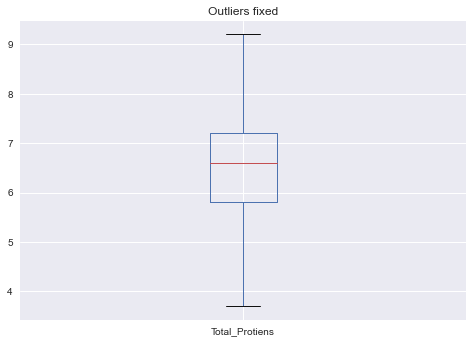

In [102]:
inspect_feature(patients_df_upsample,'Total_Protiens')

##### **Outliers are removed only left with Scaling.**

##### **``10. Albumin``**

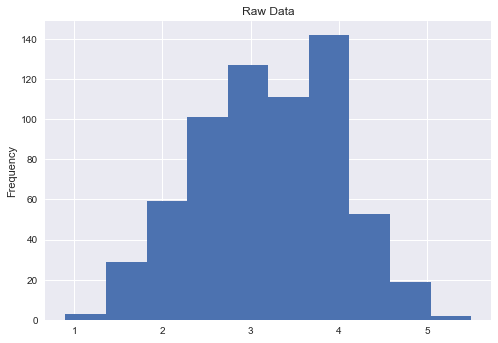

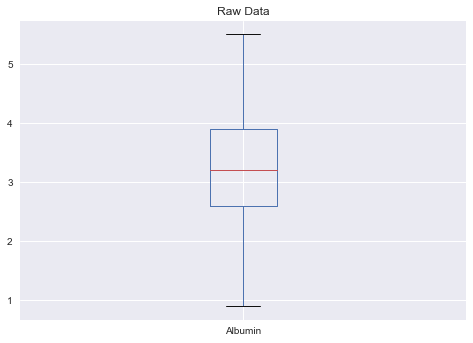

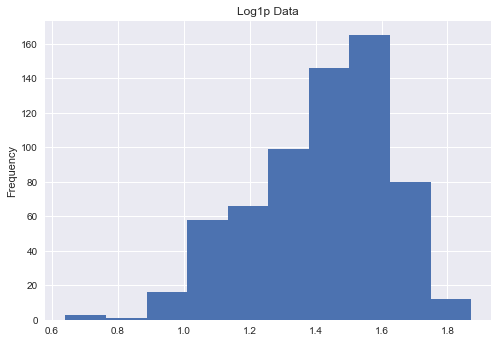

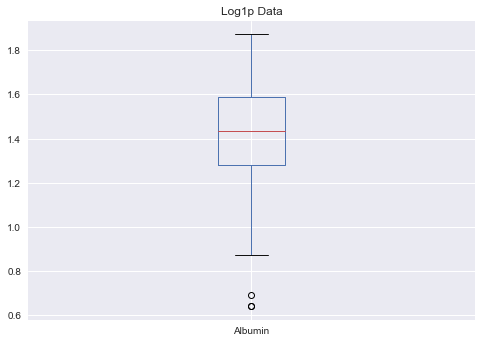

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



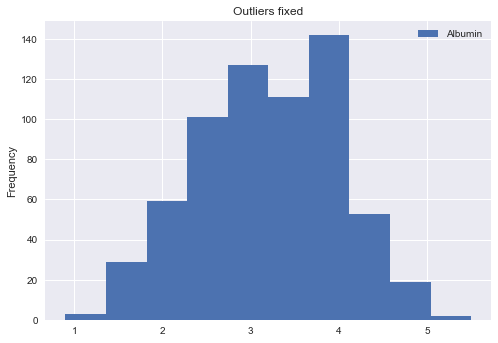

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



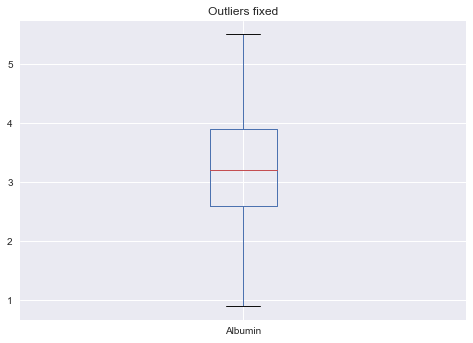

In [103]:
inspect_feature(patients_df_upsample,'Albumin')

##### **Will use only MinMax Scaler.**

##### **``11. Albumin_and_Globulin_Ratio``**

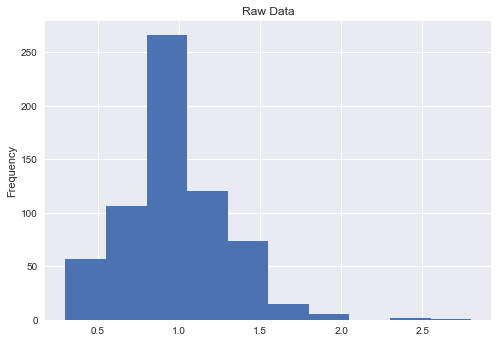

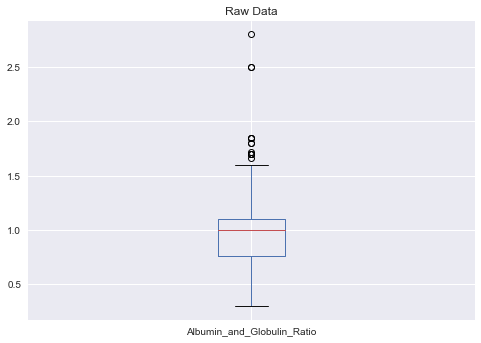

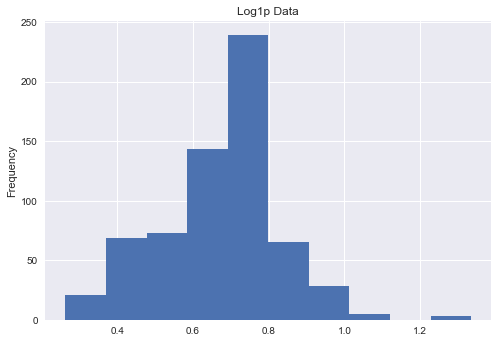

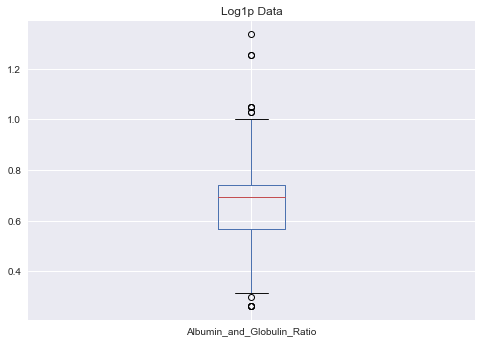

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



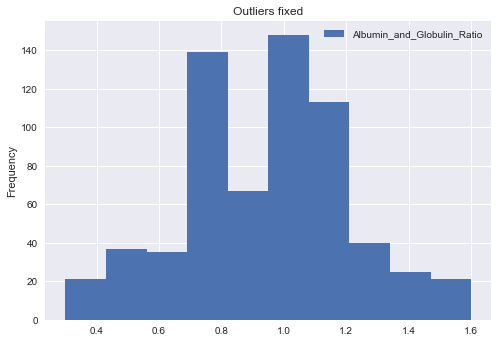

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



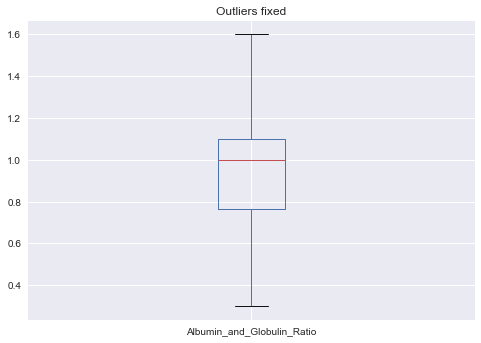

In [104]:
inspect_feature(patients_df_upsample,'Albumin_and_Globulin_Ratio')

##### **Outliers are removed only left with Scaling.**

##### **``Encoding Gender Feature``**

In [105]:
gender = {'Female':0,'Male':1}
patients_df_upsample['Gender'] = patients_df_upsample['Gender'].apply(lambda val: gender[val])

In [106]:
patients_df_upsample = patients_df_upsample[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Unconjugated_bilirubin',
                                             'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','AST_ALT_Ratio',
                                             'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Label']]
patients_df_upsample.head(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Unconjugated_bilirubin  \
0   65       0         0.700000          0.100000                 0.60000   
1   62       1         1.713798          1.238374                 1.20896   
2   62       1         1.713798          1.238374                 1.20896   
3   58       1         1.000000          0.400000                 0.60000   
4   72       1         1.407198          2.000000                 1.90000   
5   46       1         1.800000          0.700000                 1.10000   
6   26       0         0.900000          0.200000                 0.70000   
7   29       0         0.900000          0.300000                 0.60000   
8   55       1         0.700000          0.200000                 0.50000   
9   57       1         0.600000          0.100000                 0.50000   

   Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  \
0                 187.0                      16.0                   18.000000   
1                  40.0                      64.0                    4.559126   
2                  40.0                      60.0                   68.000000   
3                 182.0                      14.0                   20.000000   
4                 195.0                      27.0                   59.000000   
5                 208.0                      19.0                   14.000000   
6                 154.0                      16.0                   12.000000   
7                 202.0                      14.0                   11.000000   
8                 290.0                      53.0                   58.000000   
9                 210.0                      51.0                   59.000000   

   AST_ALT_Ratio  Total_Protiens  Albumin  Albumin_and_Globulin_Ratio  Label  
0       1.125000             6.8      3.3                        0.90      1  
1       1.562500             7.5      3.2                        0.74      1  
2       1.133333             7.0      3.3                        0.89      1  
3       1.428571             6.8      3.4                        1.00      1  
4       2.185185             7.3      2.4                        0.40      1  
5       0.736842             7.6      4.4                        1.30      1  
6       0.750000             7.0      3.5                        1.00      1  
7       0.785714             6.7      3.6                        1.10      1  
8       1.094340             6.8      3.4                        1.00      1  
9       1.156863             5.9      2.7                        0.80      1

In [107]:
patients_df_upsample['Label'].value_counts()

1    416
0    230
Name: Label, dtype: int64

In [108]:
patients_df_upsample.groupby(['Label','Gender']).count()['Age']

Label  Gender
0      0          66
       1         164
1      0          92
       1         324
Name: Age, dtype: int64

##### **``Scaling the Features``**

In [109]:
from sklearn.preprocessing import normalize

In [110]:
patients_df_upsample.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Unconjugated_bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'AST_ALT_Ratio', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Label'],
      dtype='object')

In [111]:
patients_df_upsample_scaled = pd.concat([pd.DataFrame(normalize(patients_df_upsample[['Age', 
                                                                                      'Total_Bilirubin', 
                                                                                      'Direct_Bilirubin',
                                                                                      'Unconjugated_bilirubin',
                                                                                      'Alkaline_Phosphotase',
                                                                                      'Alamine_Aminotransferase',
                                                                                      'Aspartate_Aminotransferase',
                                                                                      'AST_ALT_Ratio',
                                                                                      'Total_Protiens', 
                                                                                      'Albumin',
                                                                                      'Albumin_and_Globulin_Ratio']],axis=0),columns=['Age', 'Total_Bilirubin', 
                                                                                                                         'Direct_Bilirubin',
                                                                                                                         'Unconjugated_bilirubin',
                                                                                                                         'Alkaline_Phosphotase',
                                                                                                                         'Alamine_Aminotransferase', 
                                                                                                                         'Aspartate_Aminotransferase',
                                                                                                                         'AST_ALT_Ratio',
                                                                                                                         'Total_Protiens', 
                                                                                                                         'Albumin',
                                                                                                                         'Albumin_and_Globulin_Ratio']),
                                         patients_df_upsample[['Gender','Label']]],axis=1)

In [157]:
normalize(patients_df_upsample[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Unconjugated_bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                'Aspartate_Aminotransferase', 'AST_ALT_Ratio', 'Total_Protiens', 'Albumin','Albumin_and_Globulin_Ratio']],
          axis=0,return_norm=True)

(array([[0.05409581, 0.02047464, 0.00491679, ..., 0.0404612 , 0.03936647,
         0.03616647],
        [0.05159908, 0.0501277 , 0.06088821, ..., 0.04462632, 0.03817355,
         0.02973687],
        [0.05159908, 0.0501277 , 0.06088821, ..., 0.04165123, 0.03936647,
         0.03576462],
        ...,
        [0.05742478, 0.02339959, 0.00983357, ..., 0.04998148, 0.05845325,
         0.05625895],
        [0.0058257 , 0.01462474, 0.00491679, ..., 0.04700639, 0.05010278,
         0.04420346],
        [0.01414813, 0.02632453, 0.01475036, ..., 0.0440313 , 0.04890986,
         0.04822196]]),
 array([1201.57188715,   34.18863857,   20.33849121,   23.41031419,
        4790.7340053 ,  842.9625665 ,  923.21568556,   31.93531268,
         168.06225037,   83.82768039,   24.88492898]))

In [158]:
patients_df_upsample.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Unconjugated_bilirubin  \
0   65       0         0.700000          0.100000                 0.60000   
1   62       1         1.713798          1.238374                 1.20896   
2   62       1         1.713798          1.238374                 1.20896   
3   58       1         1.000000          0.400000                 0.60000   
4   72       1         1.407198          2.000000                 1.90000   

   Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  \
0                 187.0                      16.0                   18.000000   
1                  40.0                      64.0                    4.559126   
2                  40.0                      60.0                   68.000000   
3                 182.0                      14.0                   20.000000   
4                 195.0                      27.0                   59.000000   

   AST_ALT_Ratio  Total_Protiens  Albumin  Albumin_and_Globulin_Ratio  Label  
0       1.125000             6.8      3.3                        0.90      1  
1       1.562500             7.5      3.2                        0.74      1  
2       1.133333             7.0      3.3                        0.89      1  
3       1.428571             6.8      3.4                        1.00      1  
4       2.185185             7.3      2.4                        0.40      1

In [112]:
patients_df_upsample_scaled.head()

Age  Total_Bilirubin  Direct_Bilirubin  Unconjugated_bilirubin  \
0  0.054096         0.020475          0.004917                0.025630   
1  0.051599         0.050128          0.060888                0.051642   
2  0.051599         0.050128          0.060888                0.051642   
3  0.048270         0.029249          0.019667                0.025630   
4  0.059922         0.041160          0.098336                0.081161   

   Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  \
0              0.039034                  0.018981                    0.019497   
1              0.008349                  0.075923                    0.004938   
2              0.008349                  0.071178                    0.073656   
3              0.037990                  0.016608                    0.021663   
4              0.040704                  0.032030                    0.063907   

   AST_ALT_Ratio  Total_Protiens   Albumin  Albumin_and_Globulin_Ratio  \
0       0.035227        0.040461  0.039366                    0.036166   
1       0.048927        0.044626  0.038174                    0.029737   
2       0.035488        0.041651  0.039366                    0.035765   
3       0.044733        0.040461  0.040559                    0.040185   
4       0.068425        0.043436  0.028630                    0.016074   

   Gender  Label  
0       0      1  
1       1      1  
2       1      1  
3       1      1  
4       1      1

In [113]:
patients_df_upsample_scaled.shape

(646, 13)

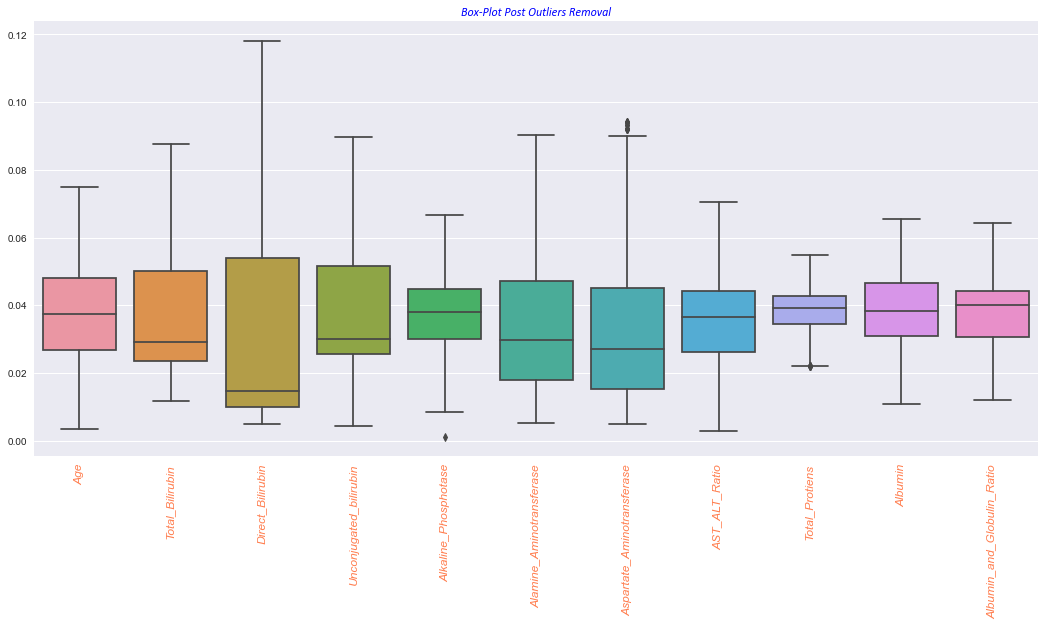

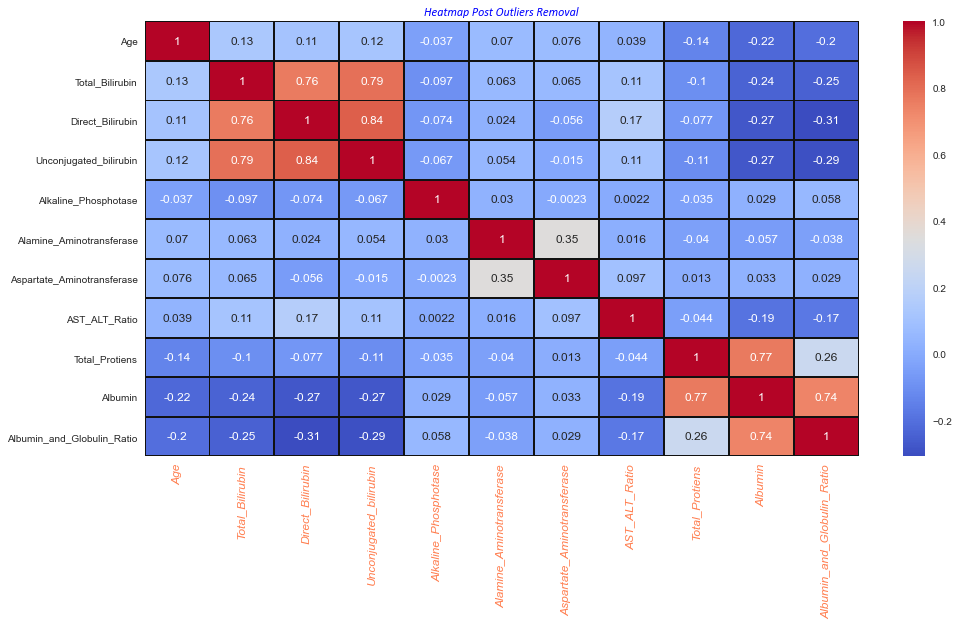

In [114]:
plot_data(patients_df_upsample_scaled.iloc[:,:-2])

In [115]:
patients_df_upsample_scaled.drop(['Direct_Bilirubin','Unconjugated_bilirubin','Albumin'],inplace=True,axis=1)

In [116]:
patients_df_upsample_scaled.to_csv('Cleaned_Trans_Scaled_Features.csv',index=False)

In [155]:
patients_df_upsample_scaled.head()

Age  Total_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0  0.054096         0.020475              0.039034                  0.018981   
1  0.051599         0.050128              0.008349                  0.075923   
2  0.051599         0.050128              0.008349                  0.071178   
3  0.048270         0.029249              0.037990                  0.016608   
4  0.059922         0.041160              0.040704                  0.032030   

   Aspartate_Aminotransferase  AST_ALT_Ratio  Total_Protiens  \
0                    0.019497       0.035227        0.040461   
1                    0.004938       0.048927        0.044626   
2                    0.073656       0.035488        0.041651   
3                    0.021663       0.044733        0.040461   
4                    0.063907       0.068425        0.043436   

   Albumin_and_Globulin_Ratio  Gender  Label  
0                    0.036166       0      1  
1                    0.029737       1      1  
2                    0.035765       1      1  
3                    0.040185       1      1  
4                    0.016074       1      1

#### **``M.1.1 -- Multiple Metric Cross-Validation``**
#### **``1. Random Forest``**

In [117]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier

In [118]:
def train_test_datasets(df,train_size=0.80,test_size=0.20,random_state=0):
    """
    This function is perfroming the dataset split into Train/CV/Test/Unseen datasets.
    
    Parameters
    ----------
    df : DataFrame
        DESCRIPTION.
    train_size : float, optional
        Training or Cross-Validation dataset size. The default is 0.80.
        Range --> [0.0-1.0] 
    test_size : float, optional
        Test or first model evaluation or unseen dataset size. The default is 0.20. 
        Range --> [0.0-1.0]
    random_state : int, optional
        Random state for data reproducibility. The default is 0.

    Returns
    -------
    set1_df : DataFrame 
        Training or Cross-Validation dataset.
    set2_df : DataFrame
        Test or first model evaluation or unseen dataset.
    """
    df_X = df.iloc[:,0:-1]
    df_y = df.iloc[:,-1]
    sss = StratifiedShuffleSplit(n_splits=1,train_size=train_size,test_size=test_size,random_state=random_state)
    set1_idx = []
    set2_idx = []
    for set1 , set2 in sss.split(df_X,df_y):
        set1_idx.append(set1)
        set2_idx.append(set2)
    
    set1_idx = np.array(set1_idx).flatten()
    set2_idx = np.array(set2_idx).flatten()
    
    set1_df = df.iloc[set1_idx].reset_index(drop=True)
    set2_df = df.iloc[set2_idx].reset_index(drop=True)
    return set1_df , set2_df

In [119]:
cv_dataset, unseen_dataset = train_test_datasets(patients_df_upsample_scaled,train_size=0.80,test_size=0.20,random_state=44)

In [120]:
cv_dataset.shape, unseen_dataset.shape

((516, 10), (130, 10))

In [121]:
cvk = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=44)

In [122]:
rfc_model = RandomForestClassifier(n_estimators=25,random_state=11,
                                    max_depth=16,
                                    min_samples_split=2,
#                                     class_weight={0:0.66,1:0.37},
                                    min_samples_leaf=2,
                                    max_features='auto')

In [123]:
print(cross_val_score(estimator=rfc_model,X=cv_dataset.iloc[:,0:-1],y=cv_dataset.iloc[:,-1],scoring='f1',cv=cvk))

print(cross_val_score(estimator=rfc_model,X=cv_dataset.iloc[:,0:-1],y=cv_dataset.iloc[:,-1],scoring='precision',cv=cvk))
    
print(cross_val_score(estimator=rfc_model,X=cv_dataset.iloc[:,0:-1],y=cv_dataset.iloc[:,-1],scoring='recall',cv=cvk))

[0.82170543 0.82014388 0.83076923 0.83823529 0.84671533 0.85714286
 0.83783784 0.84444444 0.88888889 0.83969466]
[0.85483871 0.79166667 0.85714286 0.82608696 0.82857143 0.86363636
 0.7654321  0.83823529 0.88235294 0.859375  ]
[0.79104478 0.85074627 0.80597015 0.85074627 0.86567164 0.85074627
 0.92537313 0.85074627 0.89552239 0.82089552]


In [124]:
print(cross_val_score(estimator=rfc_model,X=cv_dataset.iloc[:,0:-1],y=cv_dataset.iloc[:,-1],scoring='f1',cv=cvk).mean())

print(cross_val_score(estimator=rfc_model,X=cv_dataset.iloc[:,0:-1],y=cv_dataset.iloc[:,-1],scoring='precision',cv=cvk).mean())
    
print(cross_val_score(estimator=rfc_model,X=cv_dataset.iloc[:,0:-1],y=cv_dataset.iloc[:,-1],scoring='recall',cv=cvk).mean())

0.8425577849405285
0.8367338316276024
0.8507462686567164


In [125]:
X = cv_dataset.iloc[:,0:-1]
y = np.array(cv_dataset.iloc[:,-1])

In [126]:
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [127]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=2, n_estimators=25,
                       random_state=11)

In [128]:
y_pred = rfc_model.predict(X_test)

In [129]:
from yellowbrick.classifier import confusion_matrix as conf_matrix

## Model Metrics evaluation packages
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from yellowbrick import ROCAUC

In [130]:
print(accuracy_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

print(precision_score(y_test,y_pred))

print(recall_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

0.7884615384615384
0.8472222222222222
0.8356164383561644
0.8591549295774648
[[21 12]
 [10 61]]


In [131]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([33, 71], dtype=int64))

In [132]:
unique, counts = np.unique(y_pred,return_counts=True)
unique, counts

(array([0, 1], dtype=int64), array([31, 73], dtype=int64))

##### **``Feature_Importance``**

In [133]:
pd.concat([pd.DataFrame(X_test.columns), pd.DataFrame(rfc_model.feature_importances_)],axis=1)

0         0
0                         Age  0.138764
1             Total_Bilirubin  0.130370
2        Alkaline_Phosphotase  0.154953
3    Alamine_Aminotransferase  0.131096
4  Aspartate_Aminotransferase  0.122460
5               AST_ALT_Ratio  0.119173
6              Total_Protiens  0.101775
7  Albumin_and_Globulin_Ratio  0.088575
8                      Gender  0.012833

#### **``Confusion_Matrix``**

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


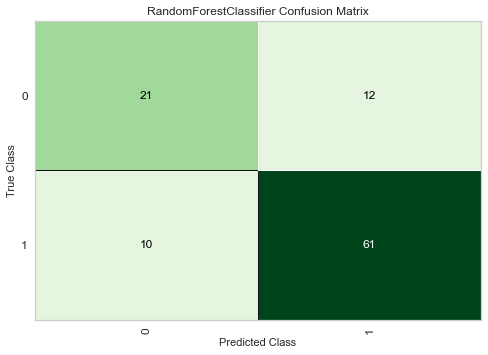

In [134]:
from yellowbrick.classifier import confusion_matrix as conf_matrix

visualizer = conf_matrix(rfc_model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, cmap="Greens")

In [135]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([33, 71], dtype=int64))

In [136]:
unique, counts = np.unique(y_pred,return_counts=True)
unique, counts

(array([0, 1], dtype=int64), array([31, 73], dtype=int64))

#### **``Precision_Recall Curve``**

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


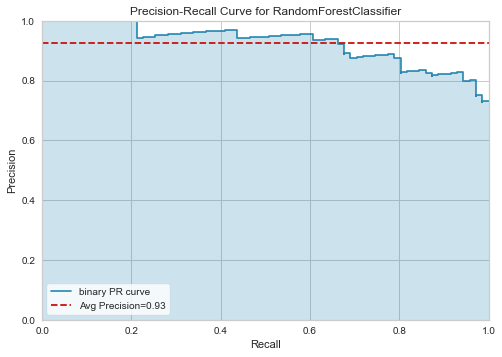

In [137]:
from yellowbrick.classifier import precision_recall_curve

visualizer = precision_recall_curve(rfc_model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, cmap="Greens")

#### **``ROC Curve``**
##### **It should follow the y-axis to x-axis**

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


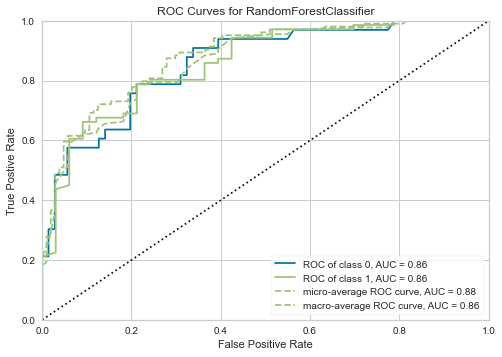

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [138]:
roc_auc = ROCAUC(rfc_model)
roc_auc.fit(X_train,y_train)
roc_auc.score(X_test,y_test)
roc_auc.show()

### **``Running Model on Unseen Dataset``**

In [139]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import os

In [140]:
rfc_model = RandomForestClassifier(n_estimators=25,random_state=34,
                                    max_depth=16,
                                    min_samples_split=2,
                                    min_samples_leaf=2,
                                    max_features='auto')

In [141]:
pre_proc_df = pd.read_csv(os.path.join('Cleaned_Trans_Scaled_Features.csv'))

In [142]:
cv_dataset, unseen_dataset = train_test_datasets(pre_proc_df,train_size=0.80,test_size=0.20,random_state=91)

In [143]:
rfc_model.fit(cv_dataset.iloc[:,0:-1],cv_dataset.iloc[:,-1])

y_pred = rfc_model.predict(unseen_dataset.iloc[:,0:-1])
 
print(f1_score(unseen_dataset.iloc[:,-1],y_pred))

print(precision_score(unseen_dataset.iloc[:,-1],y_pred))

print(recall_score(unseen_dataset.iloc[:,-1],y_pred))

print(confusion_matrix(unseen_dataset.iloc[:,-1],y_pred))

0.9132947976878611
0.8876404494382022
0.9404761904761905
[[36 10]
 [ 5 79]]


#### **``Confusion_Matrix``**

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


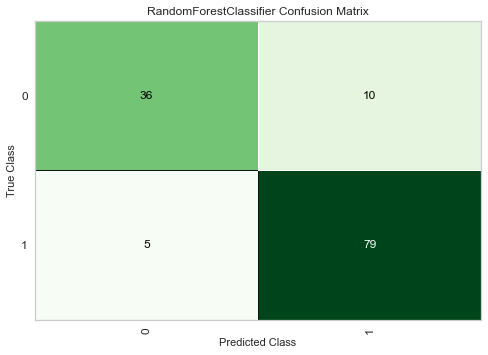

In [144]:
from yellowbrick.classifier import confusion_matrix as conf_matrix

visualizer = conf_matrix(rfc_model, X_train=cv_dataset.iloc[:,0:-1],y_train=cv_dataset.iloc[:,-1], X_test=unseen_dataset.iloc[:,0:-1], y_test=unseen_dataset.iloc[:,-1], cmap="Greens")

In [145]:
np.unique(unseen_dataset.iloc[:,-1],return_counts=True)

(array([0, 1], dtype=int64), array([46, 84], dtype=int64))

In [146]:
unique, counts = np.unique(y_pred,return_counts=True)
unique, counts

(array([0, 1], dtype=int64), array([41, 89], dtype=int64))

#### **``Precision_Recall Curve``**

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


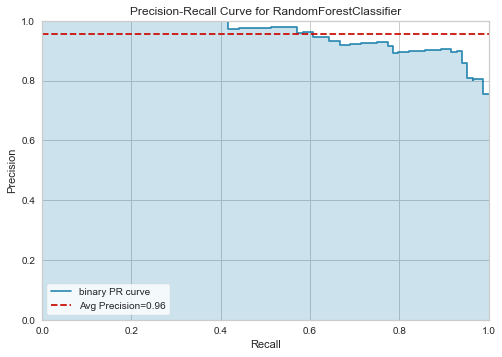

In [147]:
from yellowbrick.classifier import precision_recall_curve

visualizer = precision_recall_curve(rfc_model, X_train=cv_dataset.iloc[:,0:-1],y_train=cv_dataset.iloc[:,-1], X_test=unseen_dataset.iloc[:,0:-1], y_test=unseen_dataset.iloc[:,-1], cmap="Greens")

#### **``ROC Curve``**
##### **It should follow the y-axis to x-axis**

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


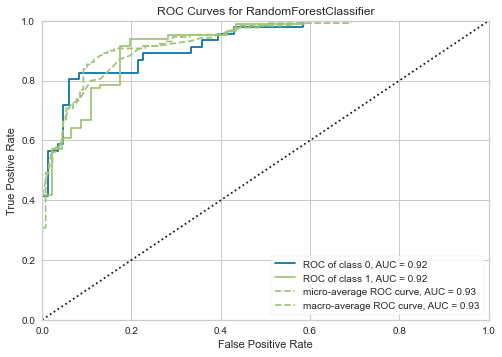

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [148]:
roc_auc = ROCAUC(rfc_model)
roc_auc.fit(X=cv_dataset.iloc[:,0:-1],y=cv_dataset.iloc[:,-1])
roc_auc.score(X=unseen_dataset.iloc[:,0:-1], y=unseen_dataset.iloc[:,-1])
roc_auc.show()